In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
traindf = pd.read_csv("train.csv")
traindf

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

C:\Users\jenni\AppData\Local\Temp\ipykernel_19324\367152470.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,8))


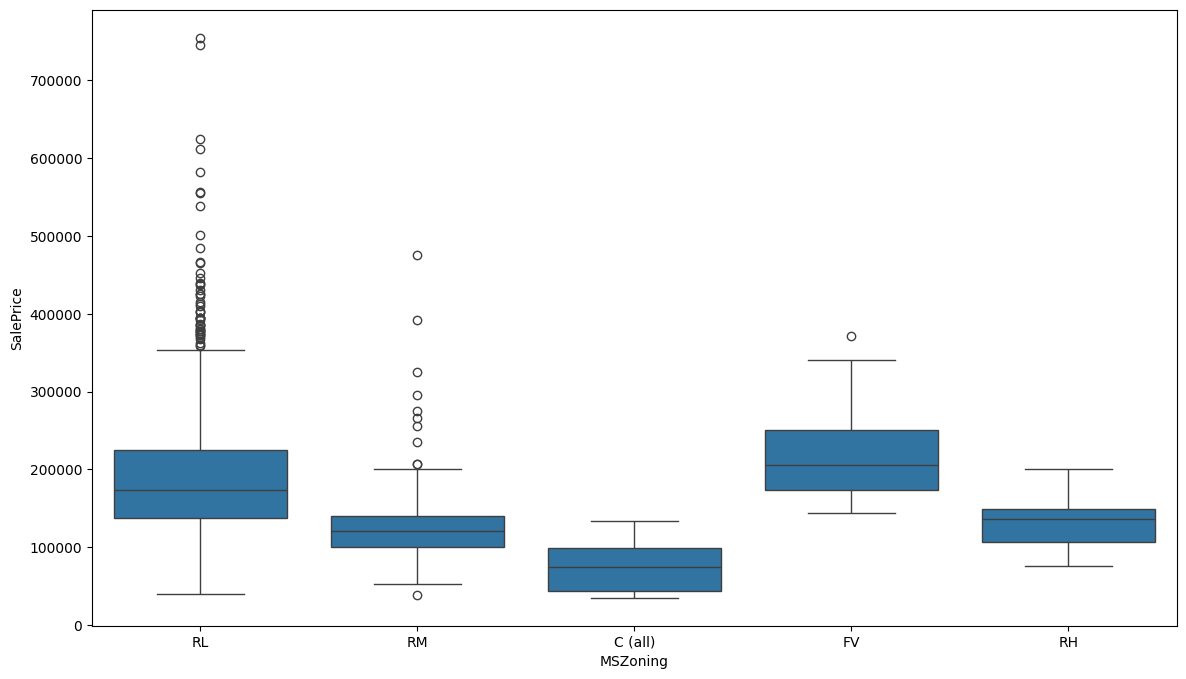

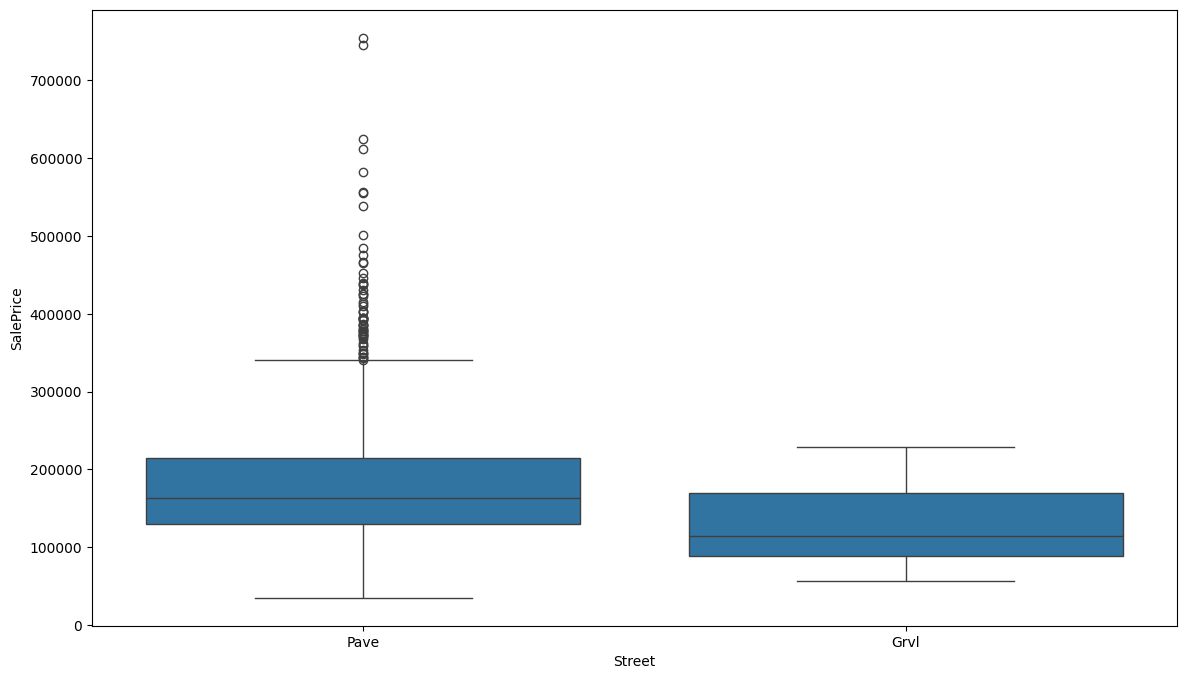

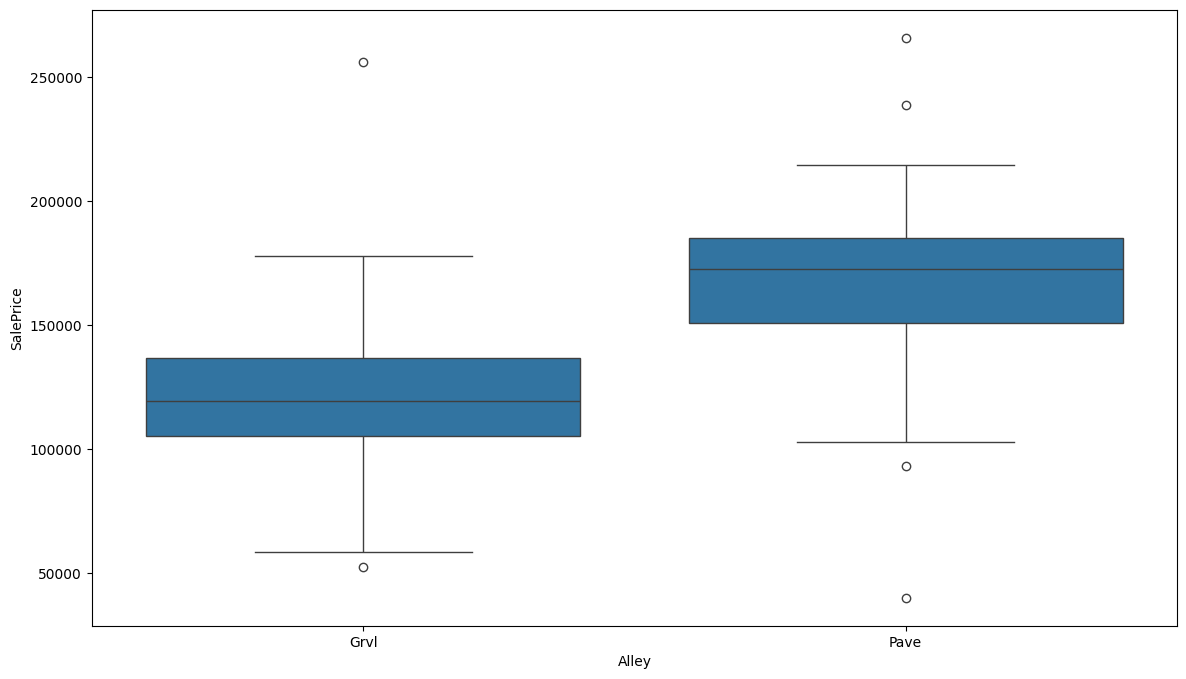

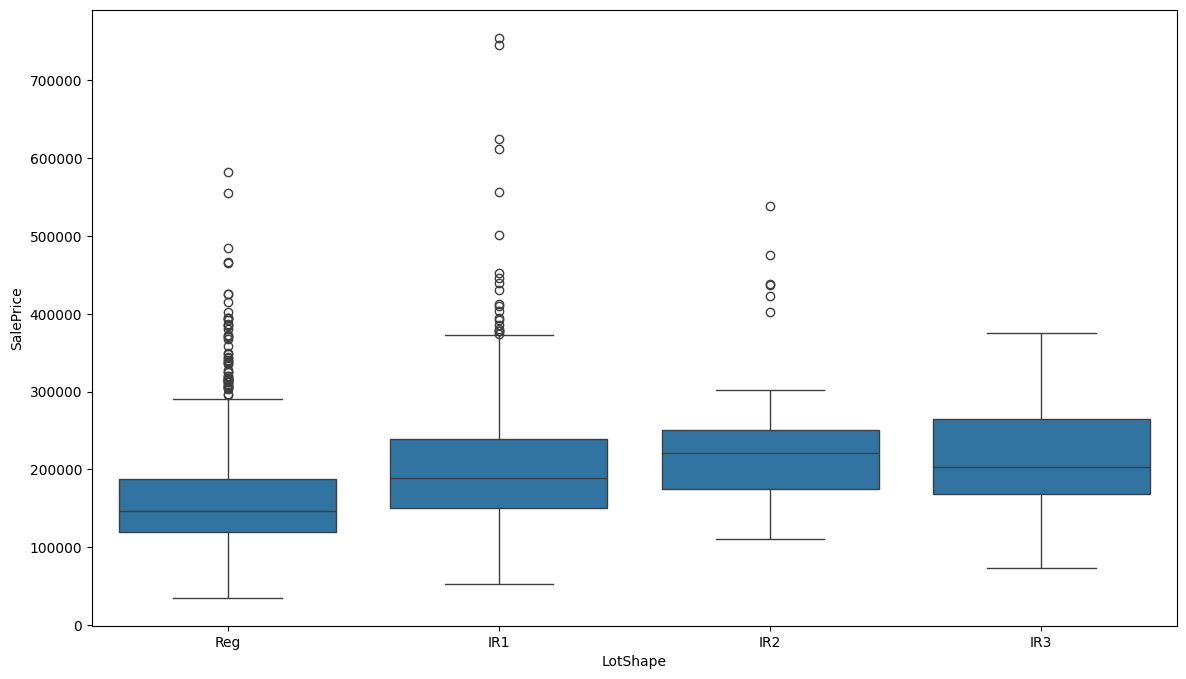

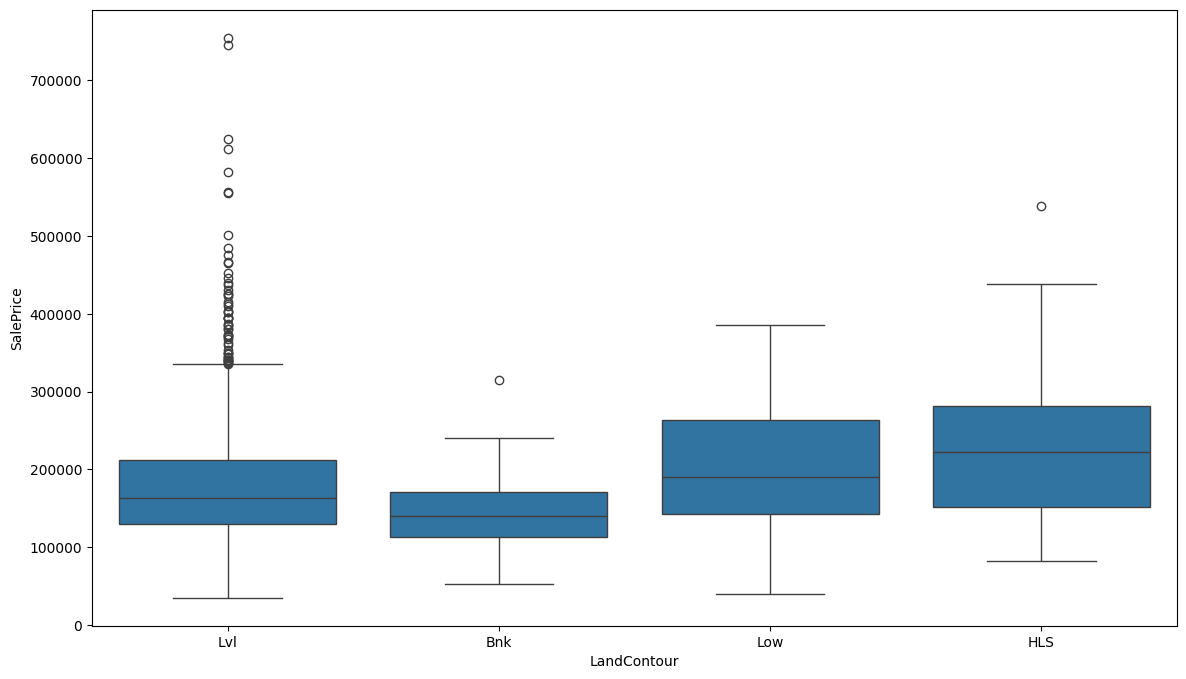

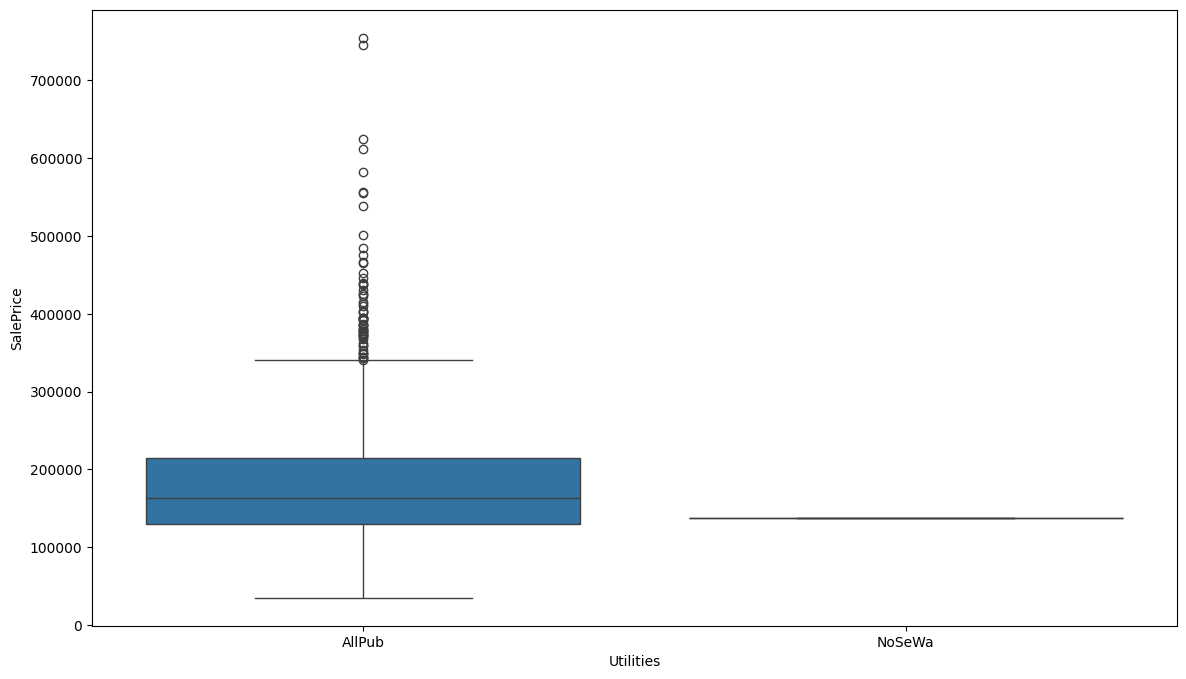

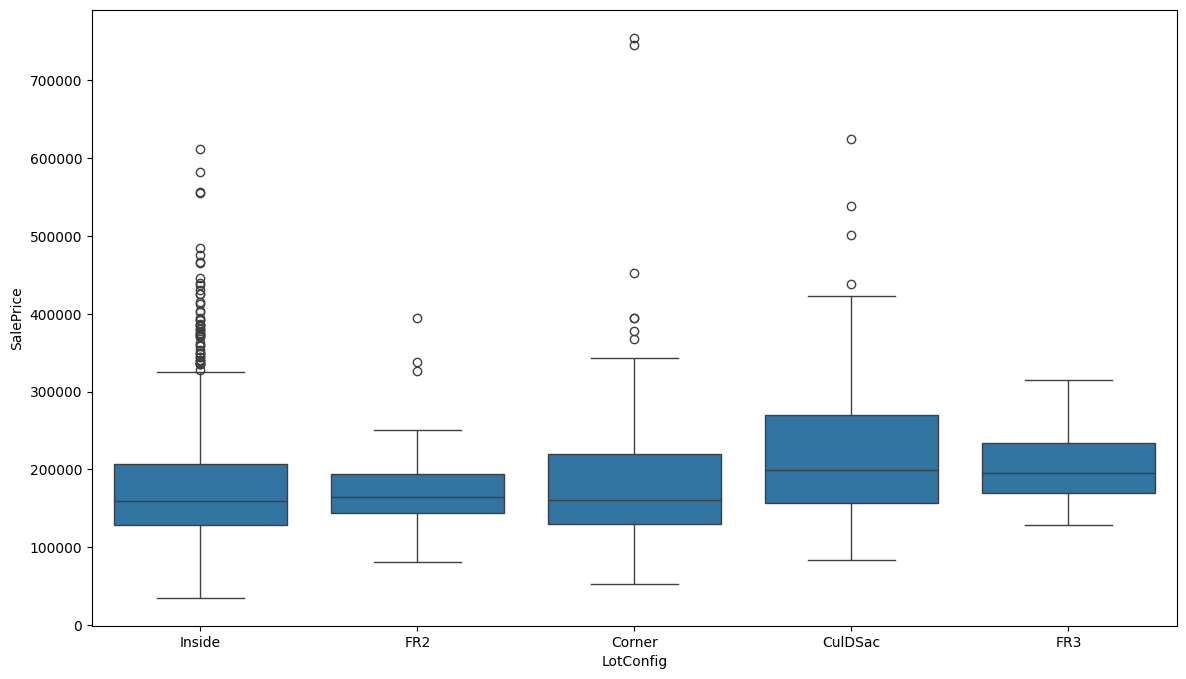

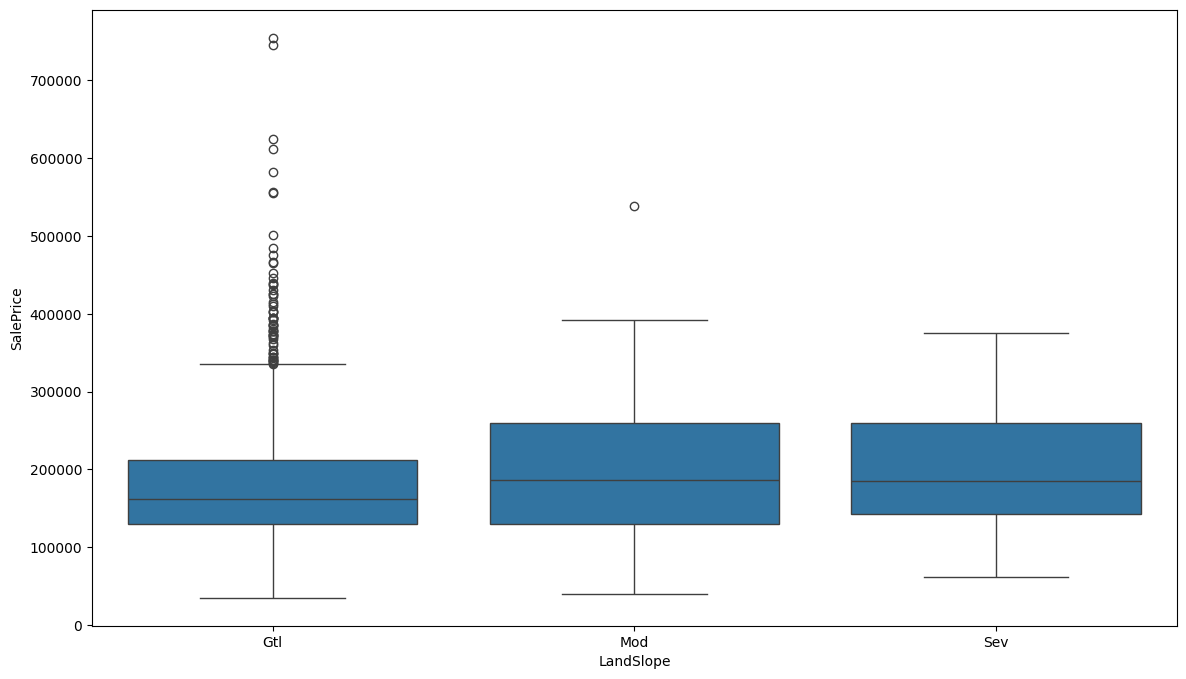

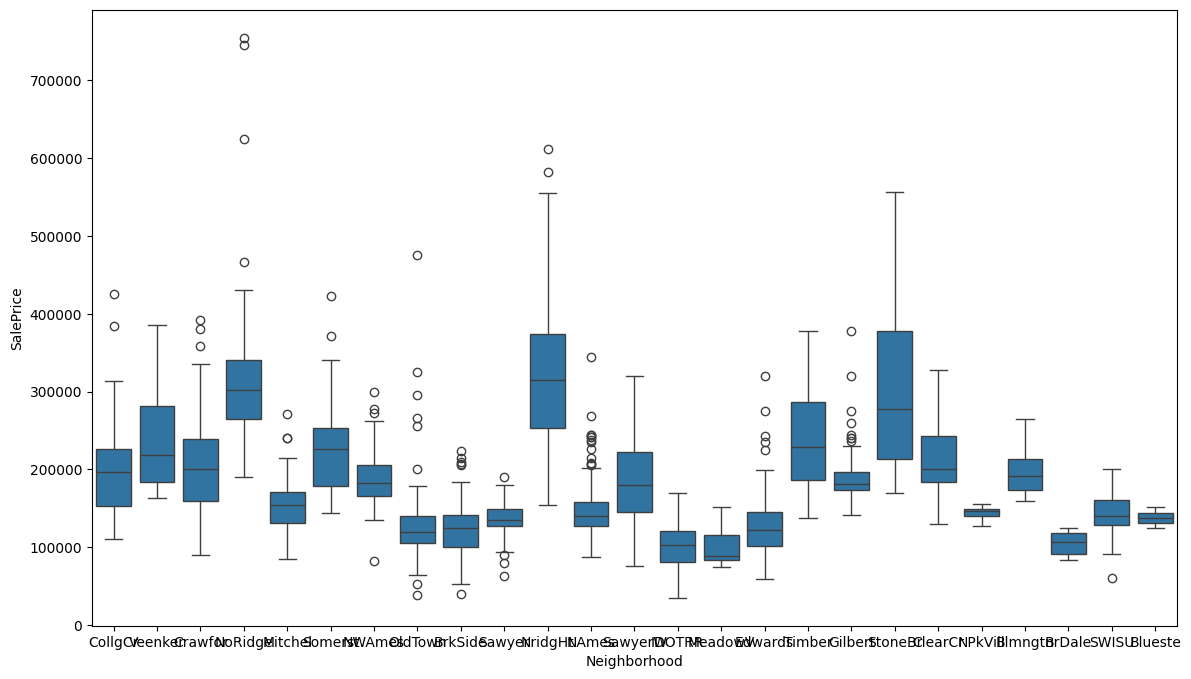

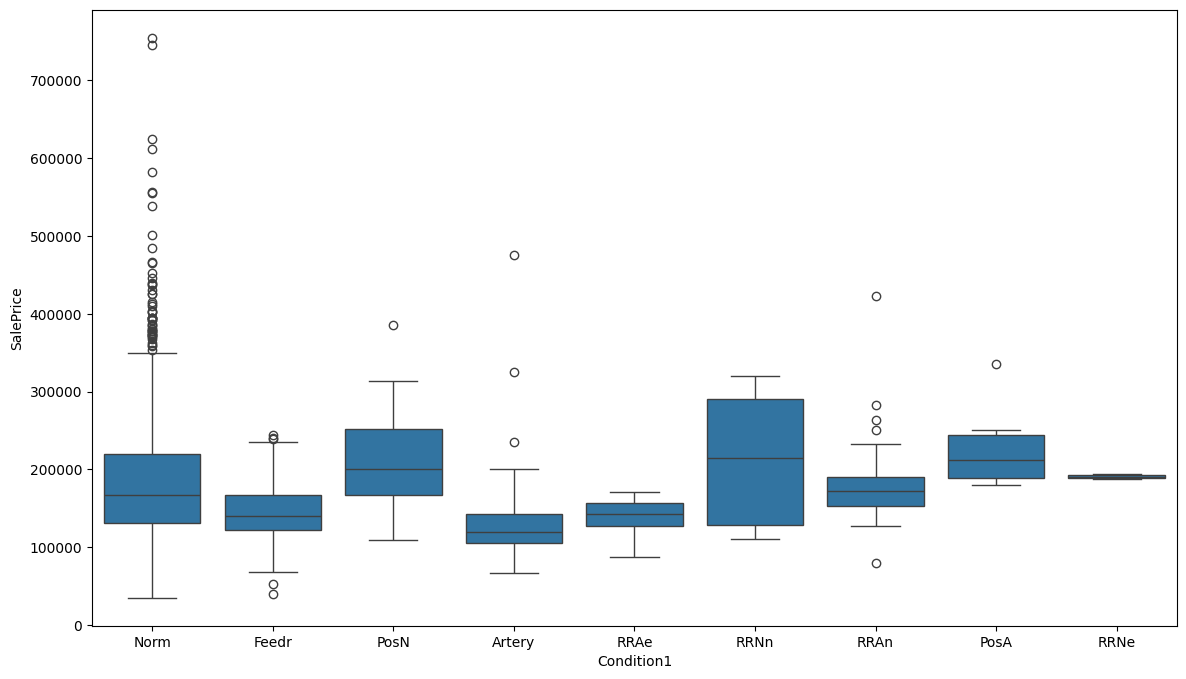

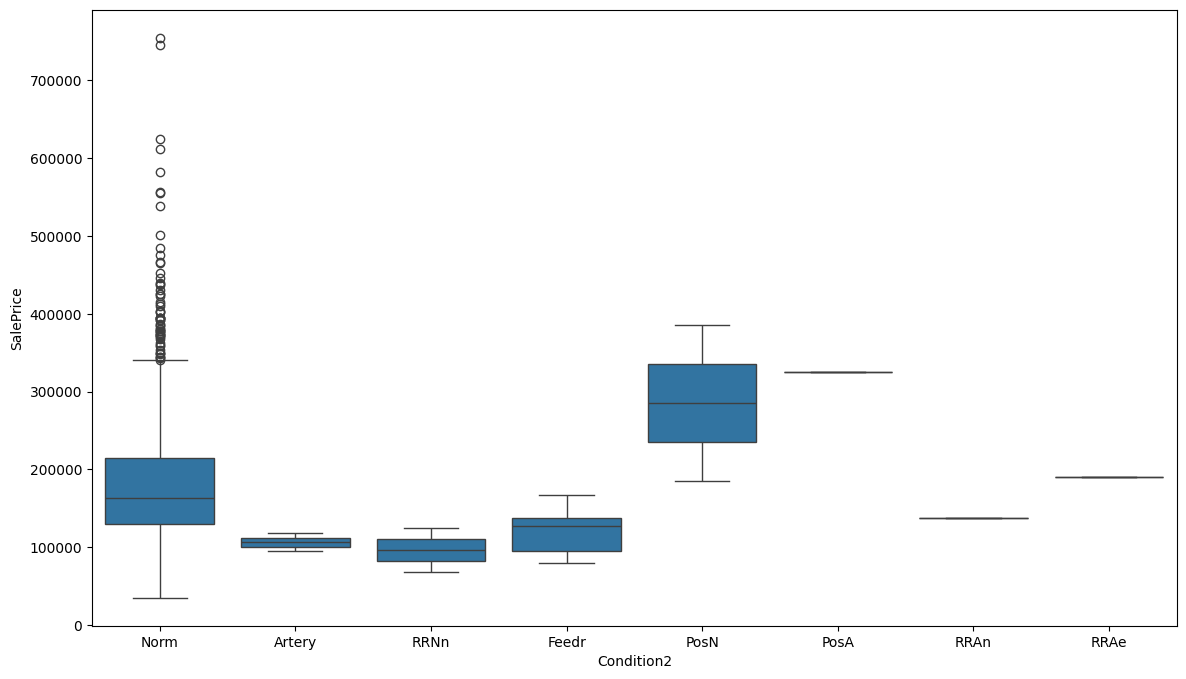

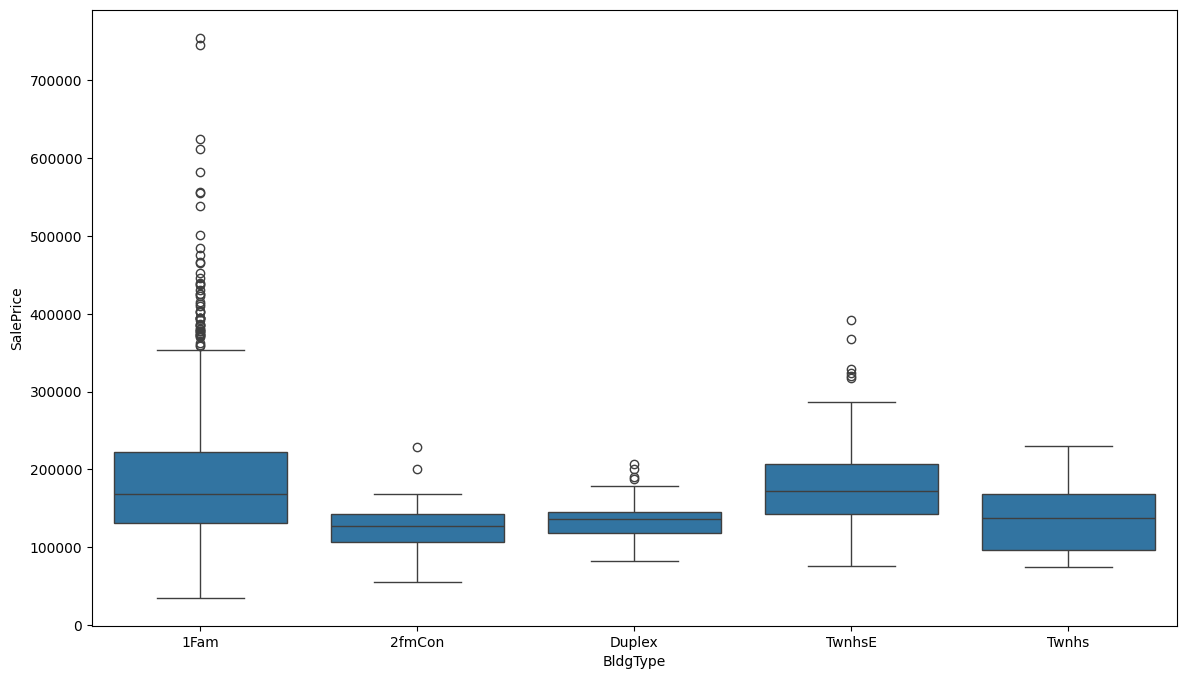

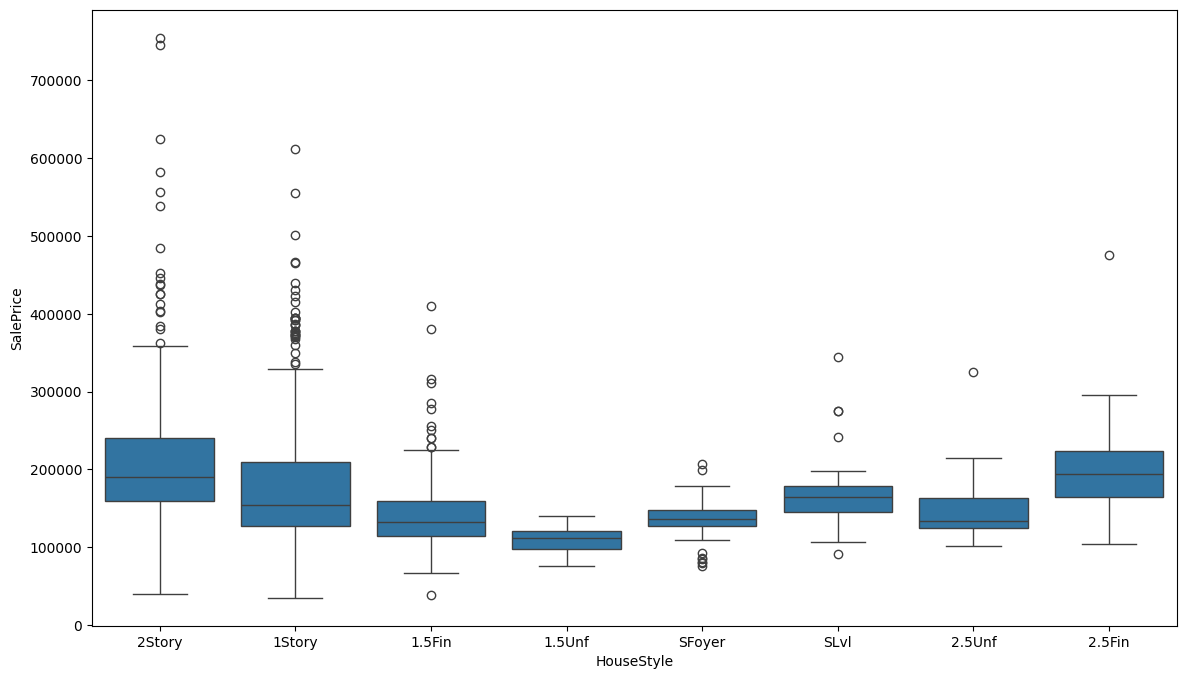

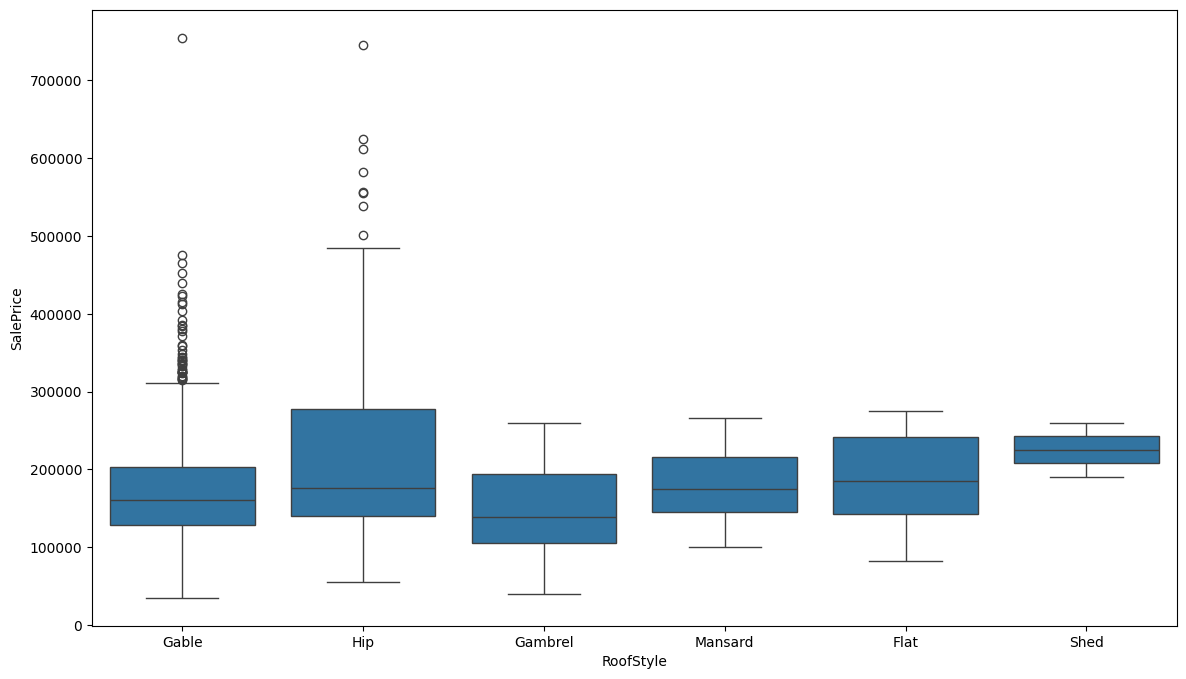

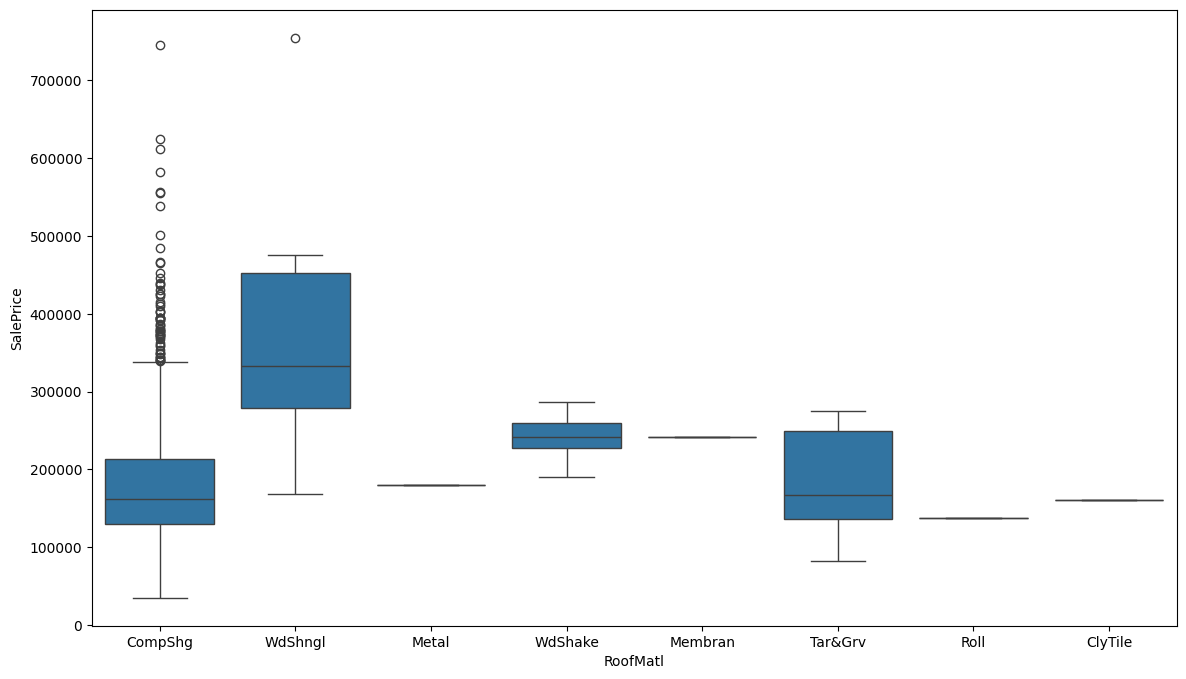

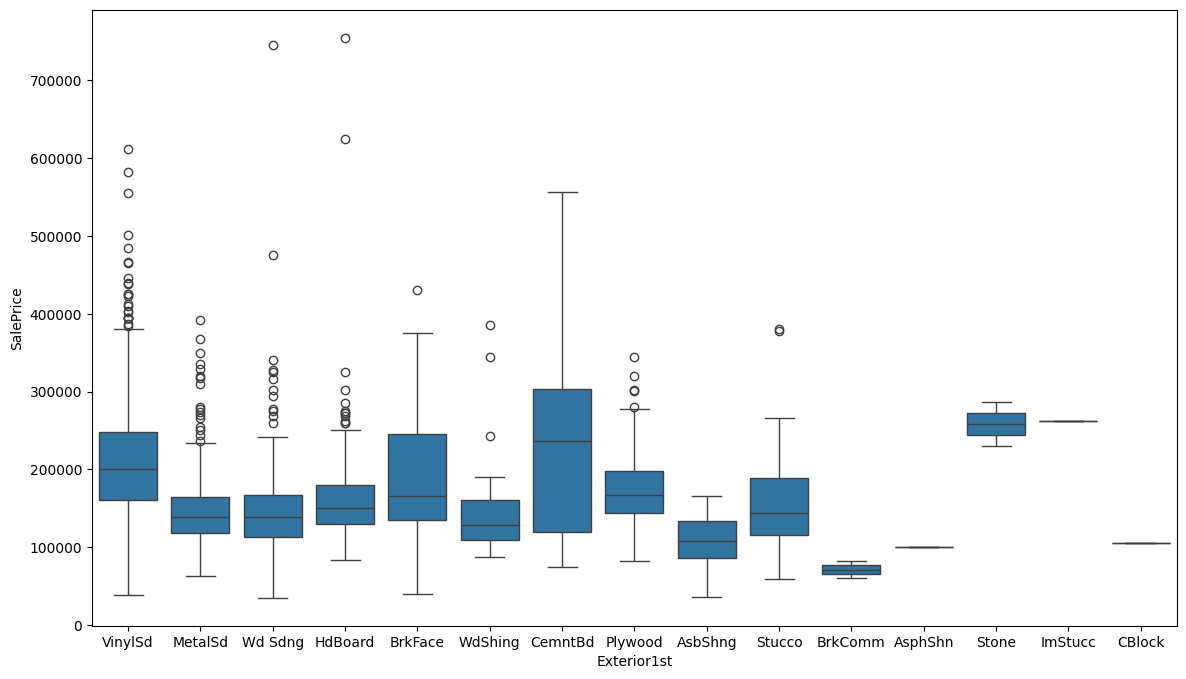

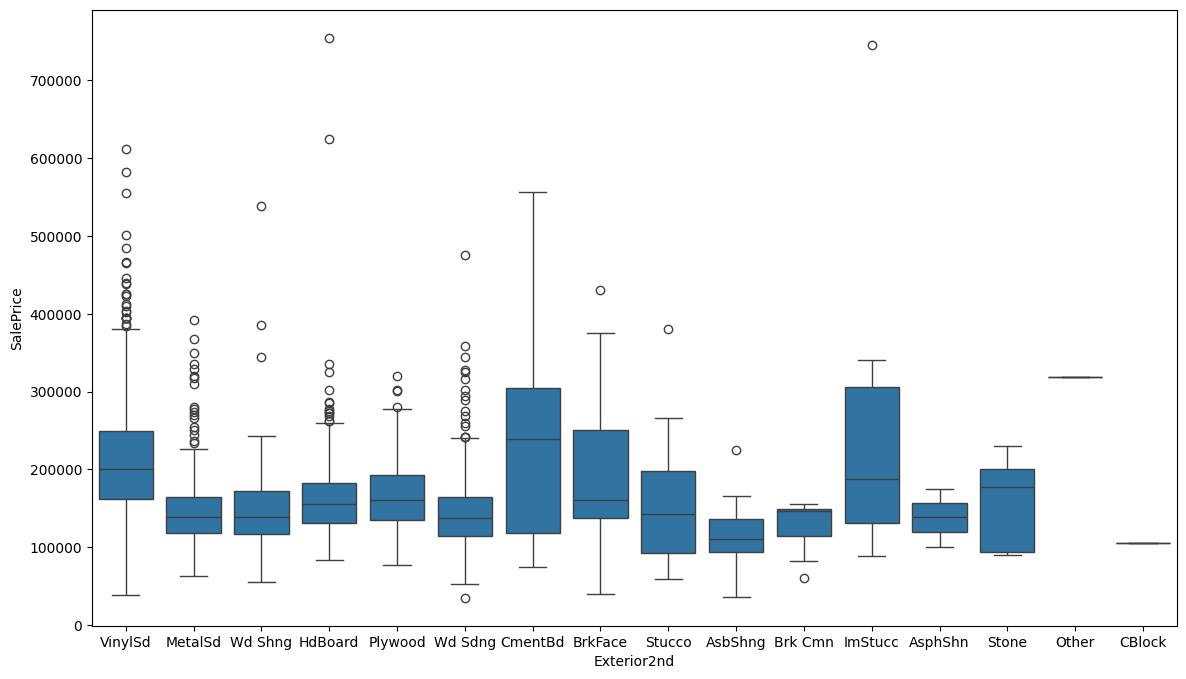

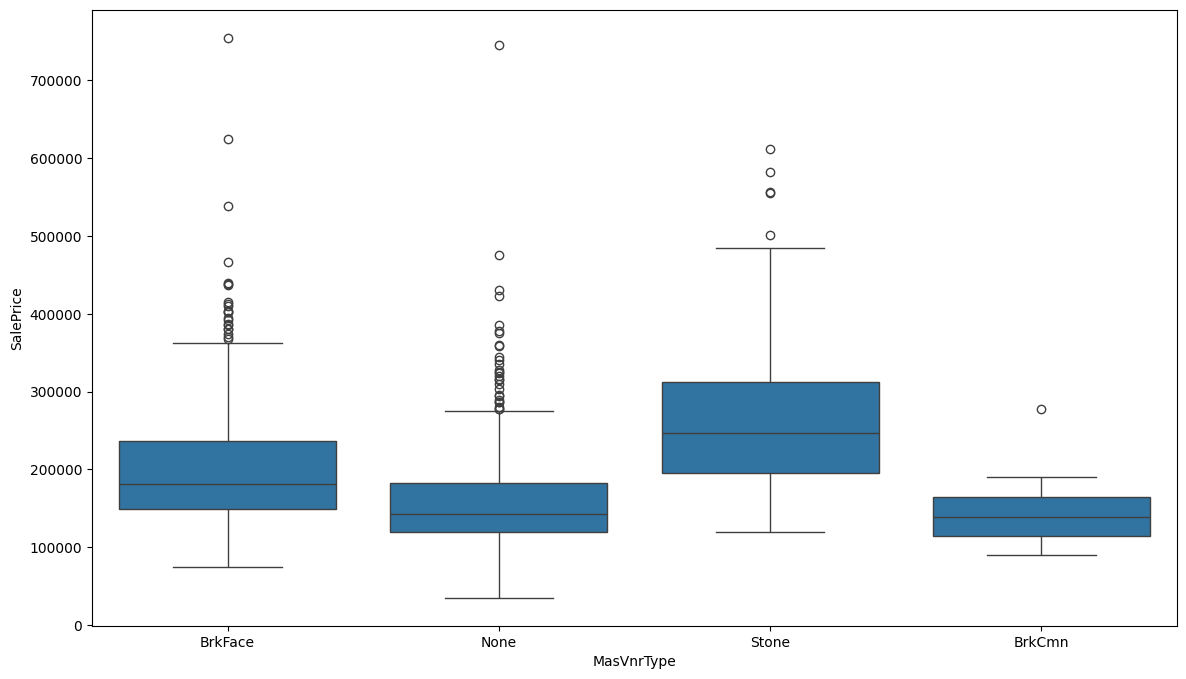

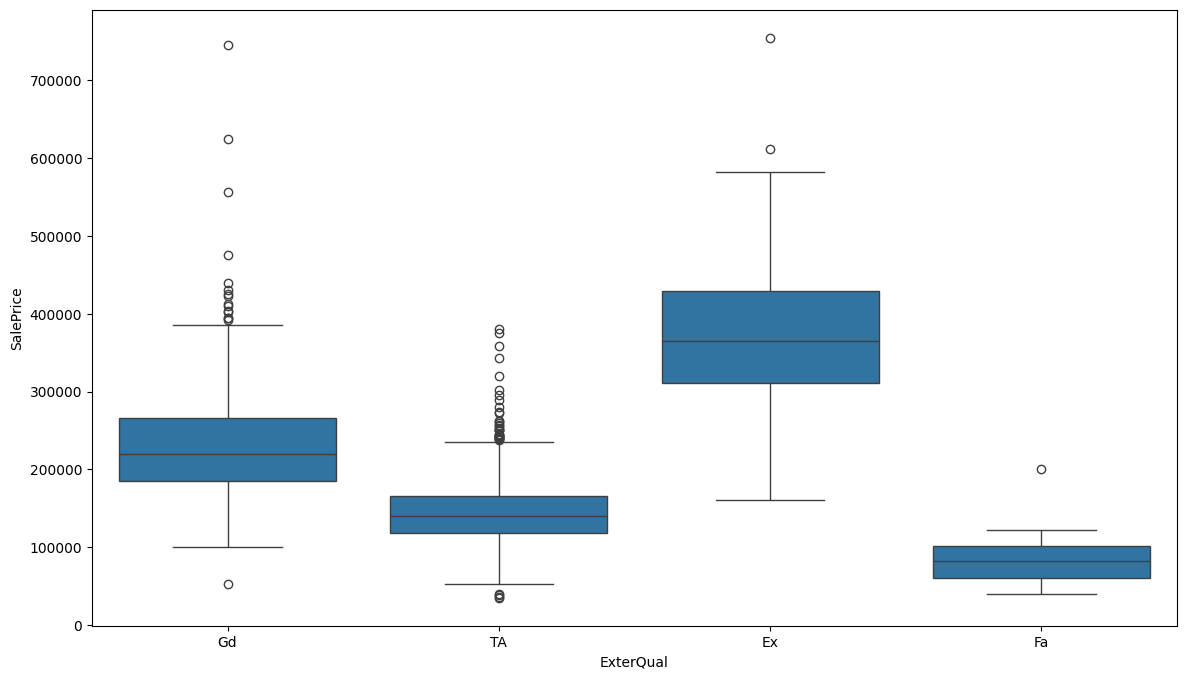

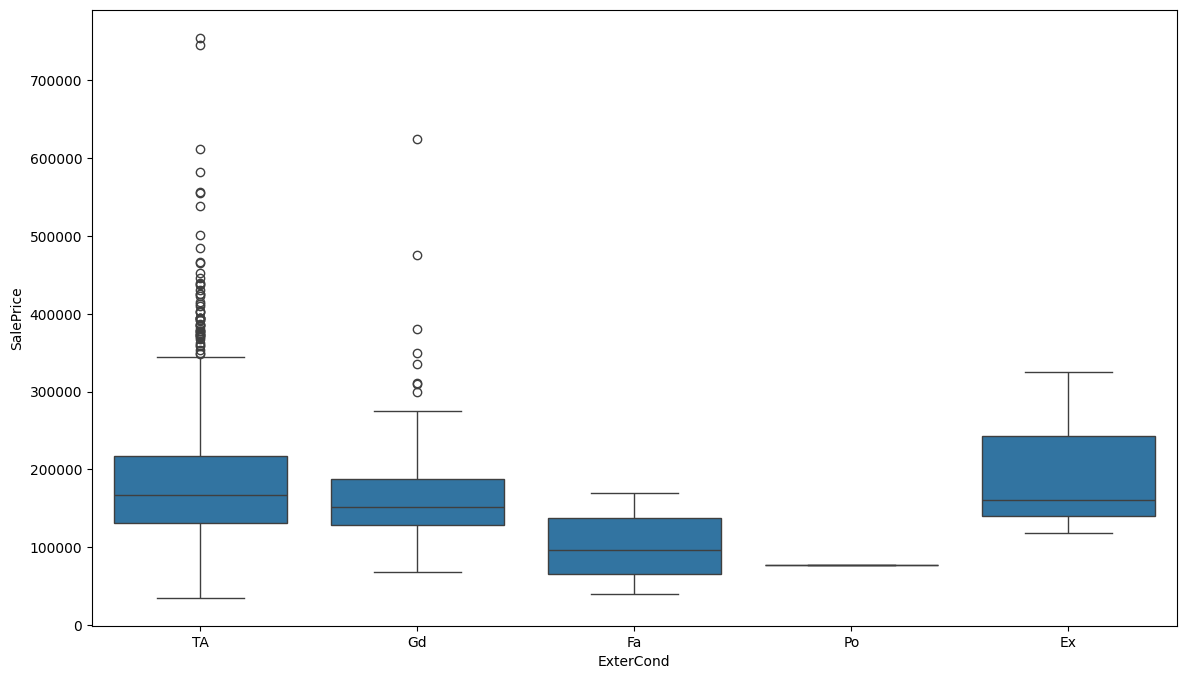

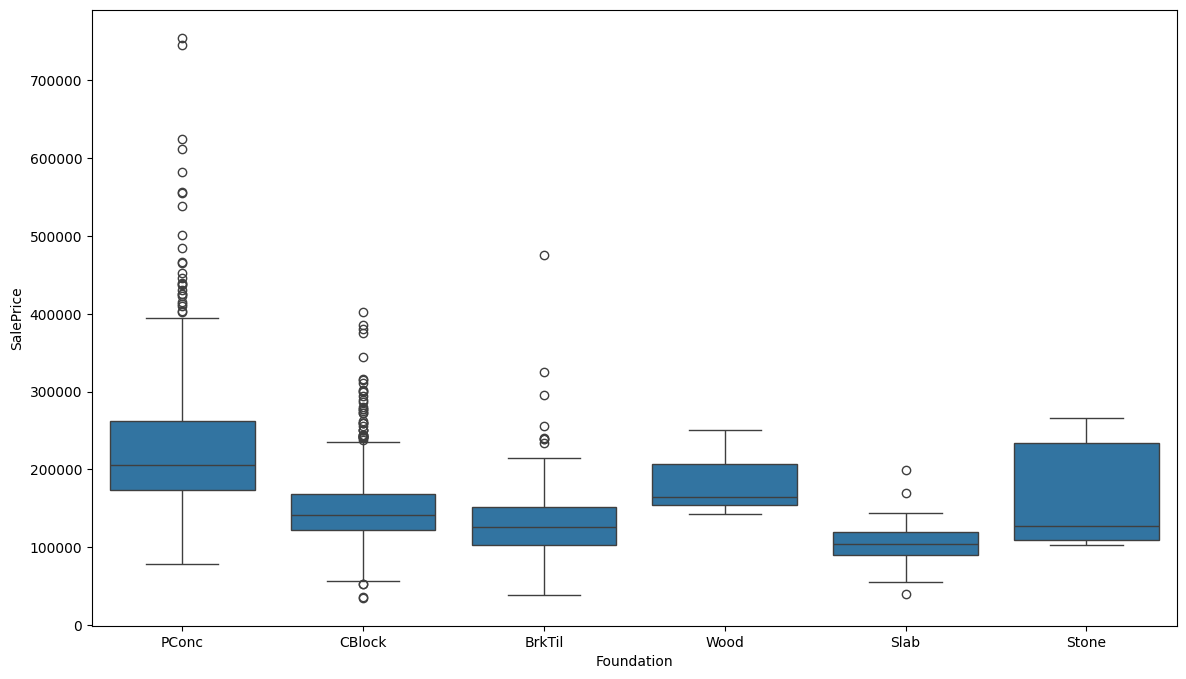

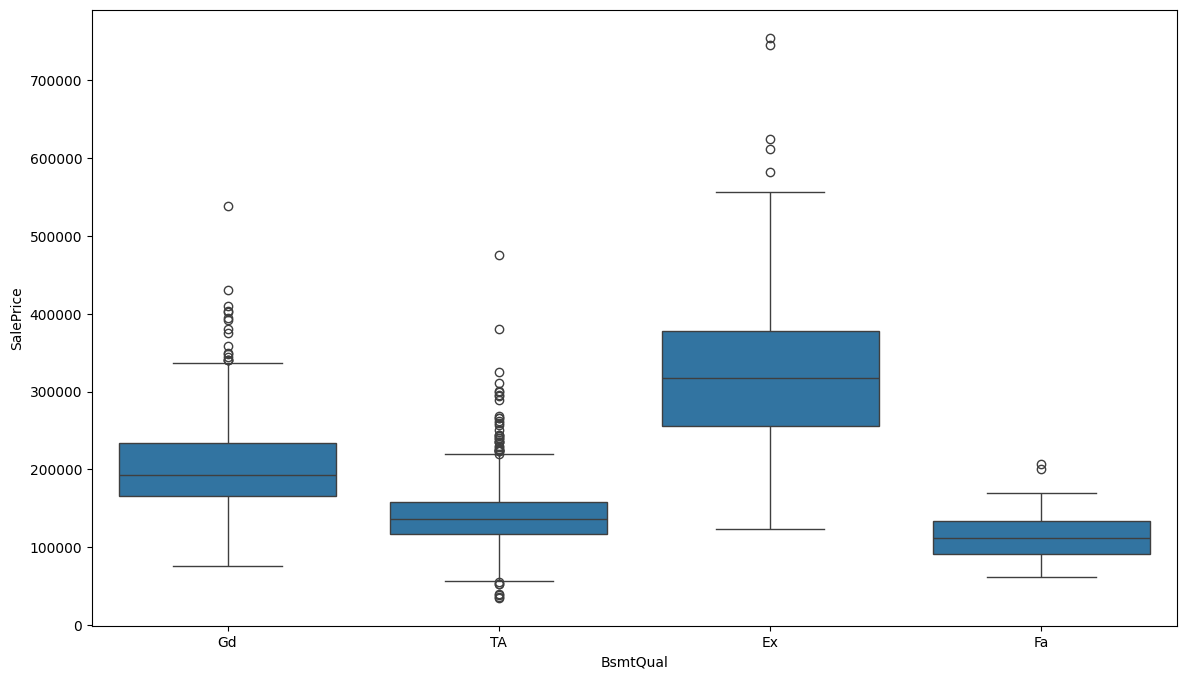

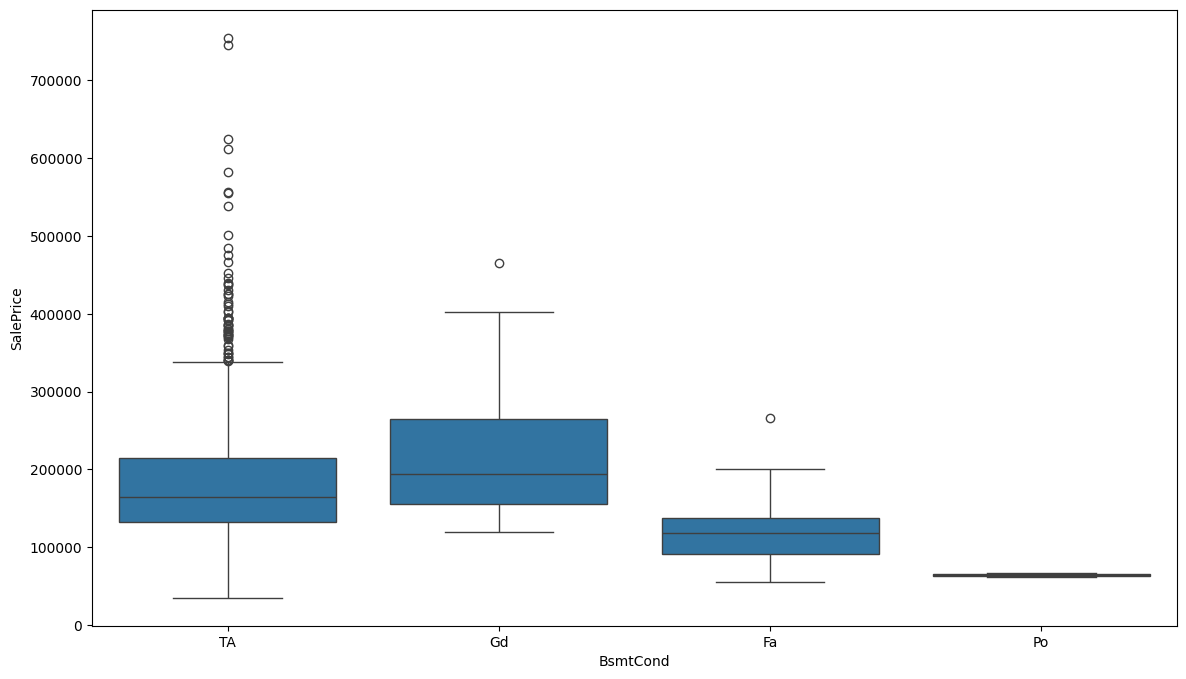

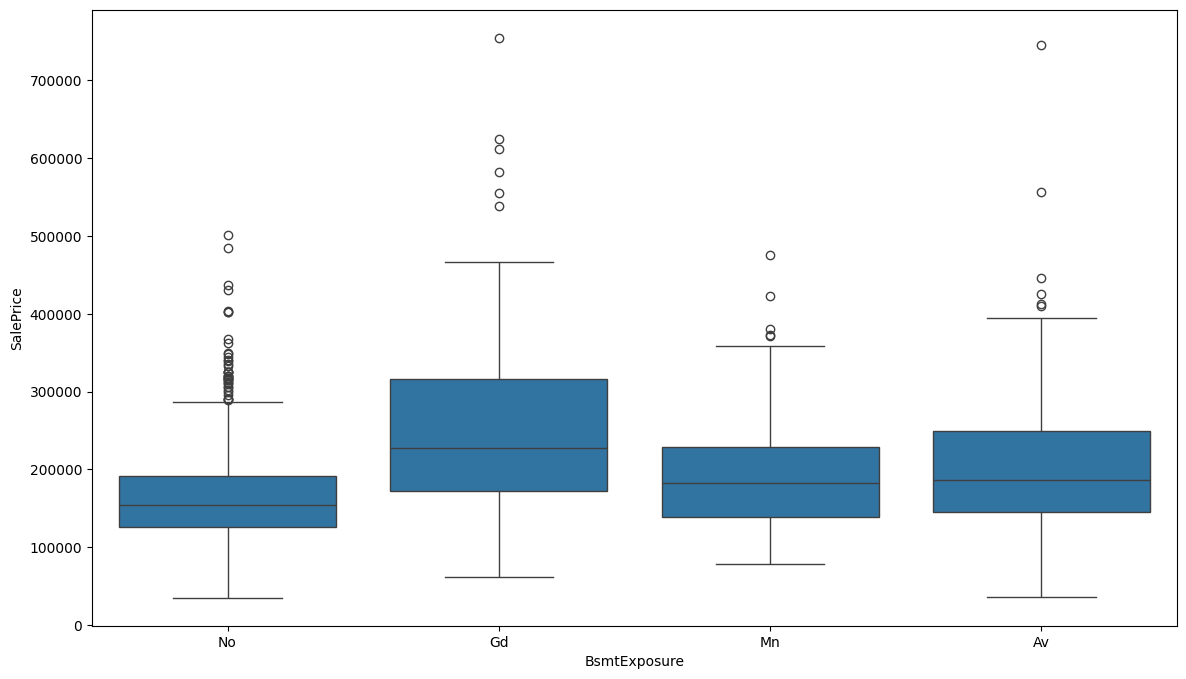

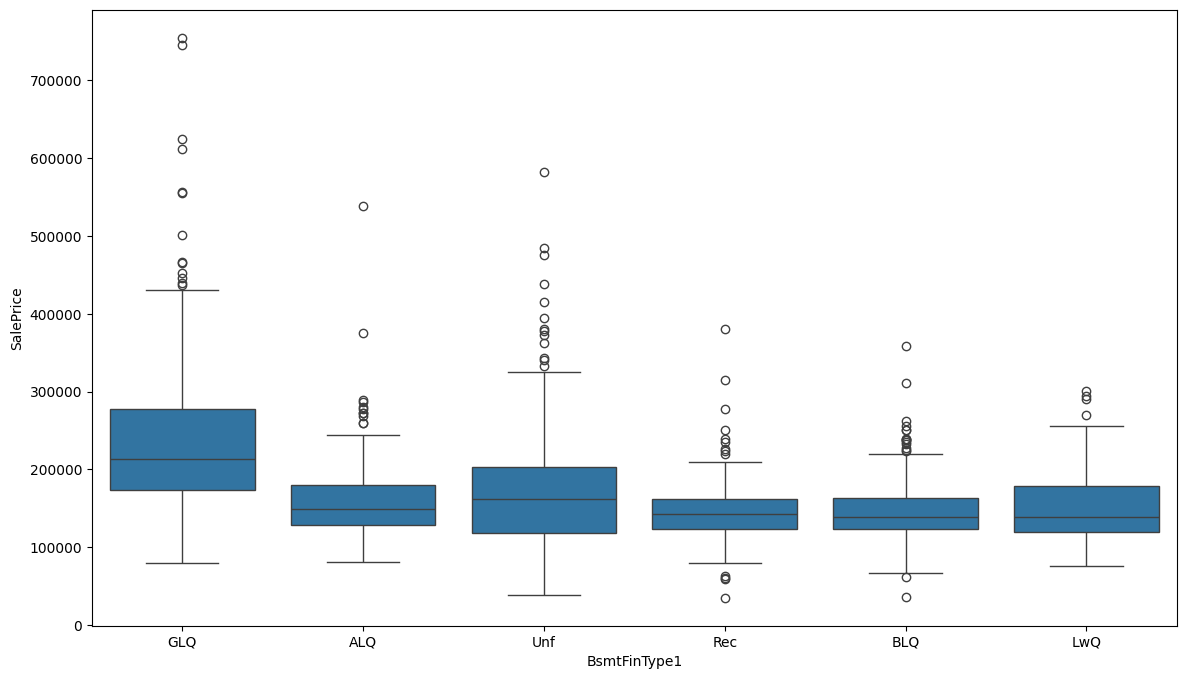

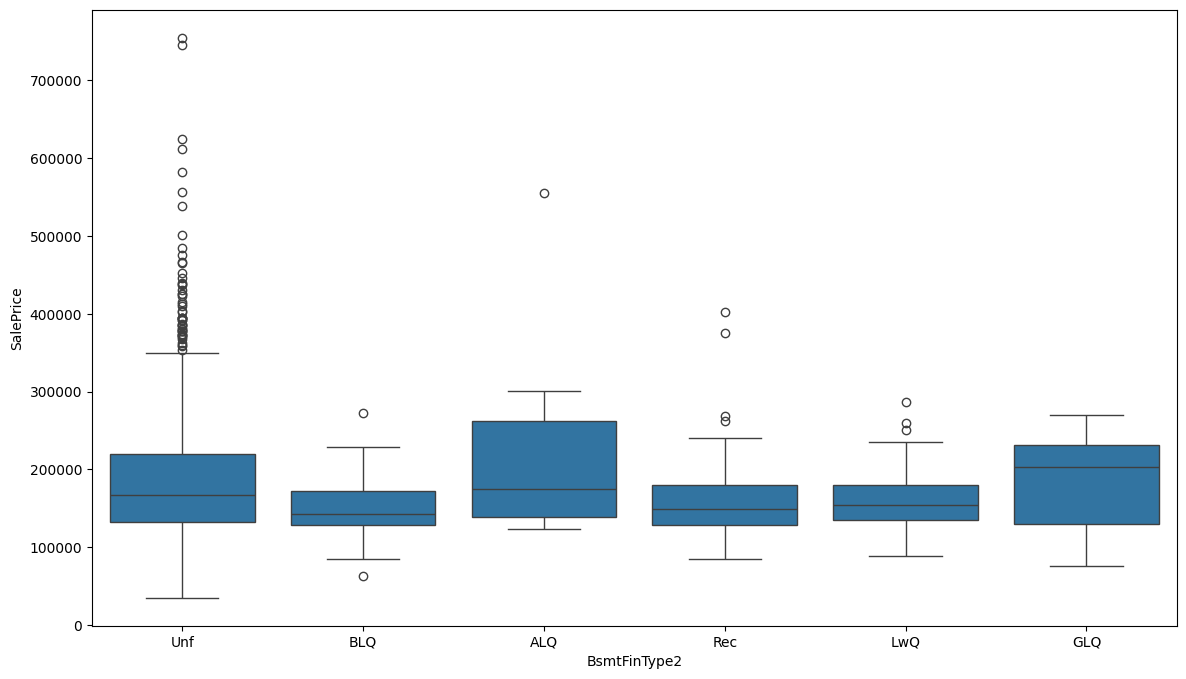

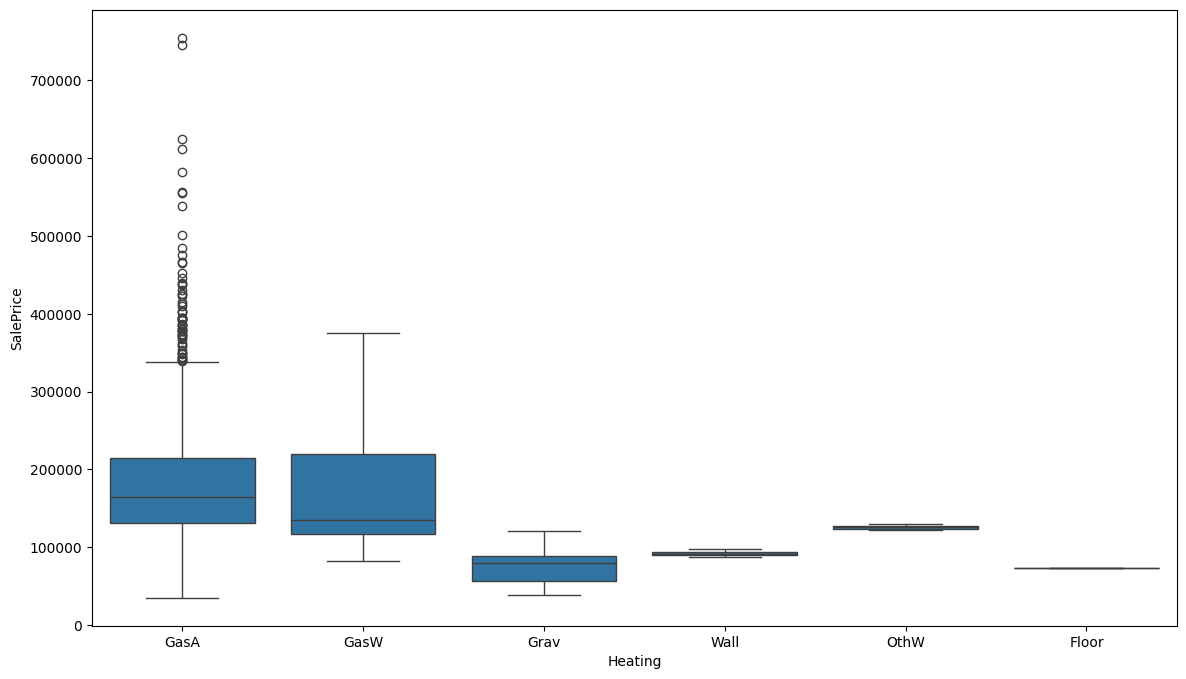

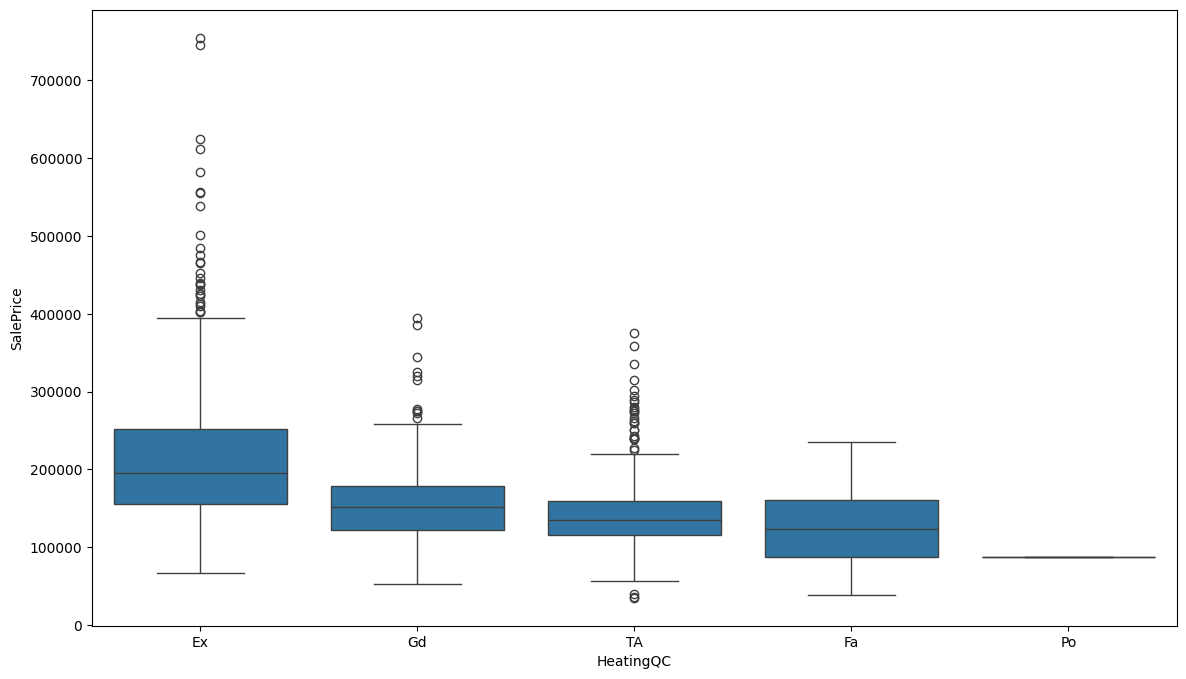

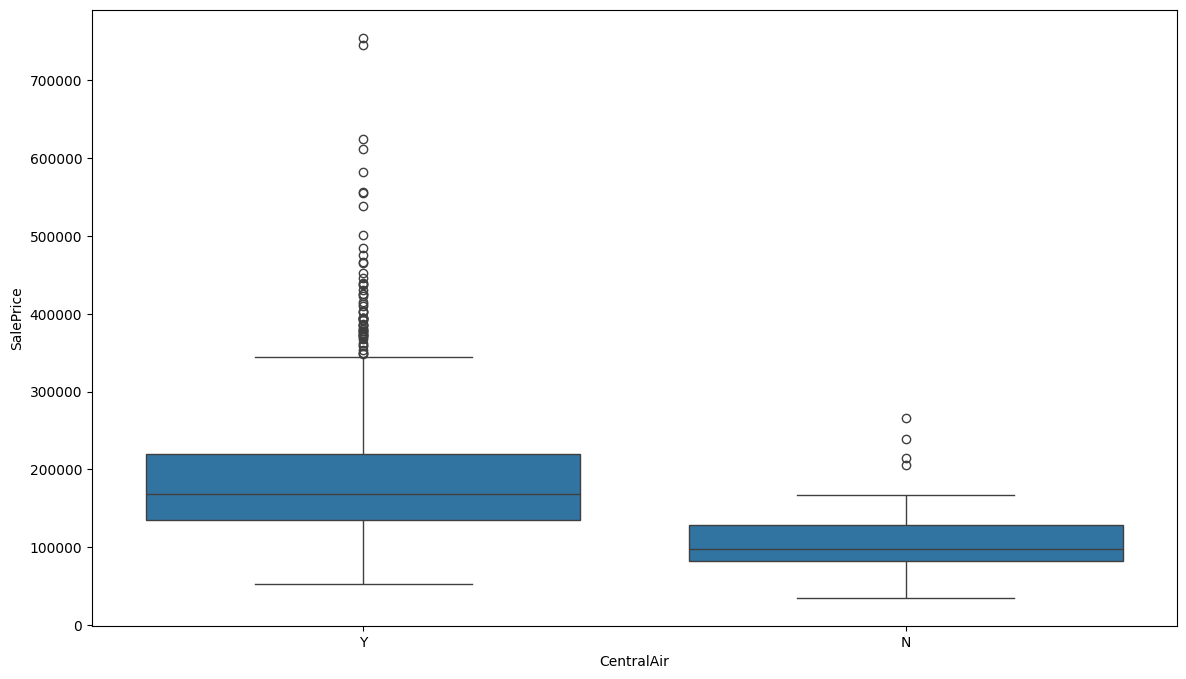

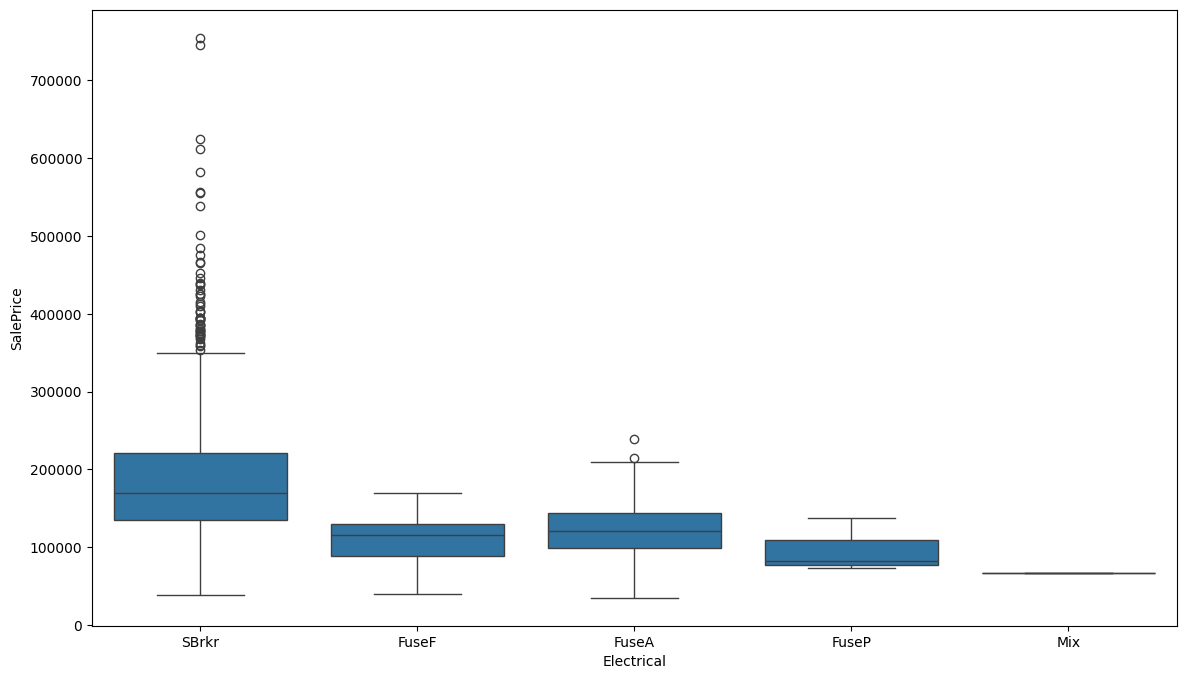

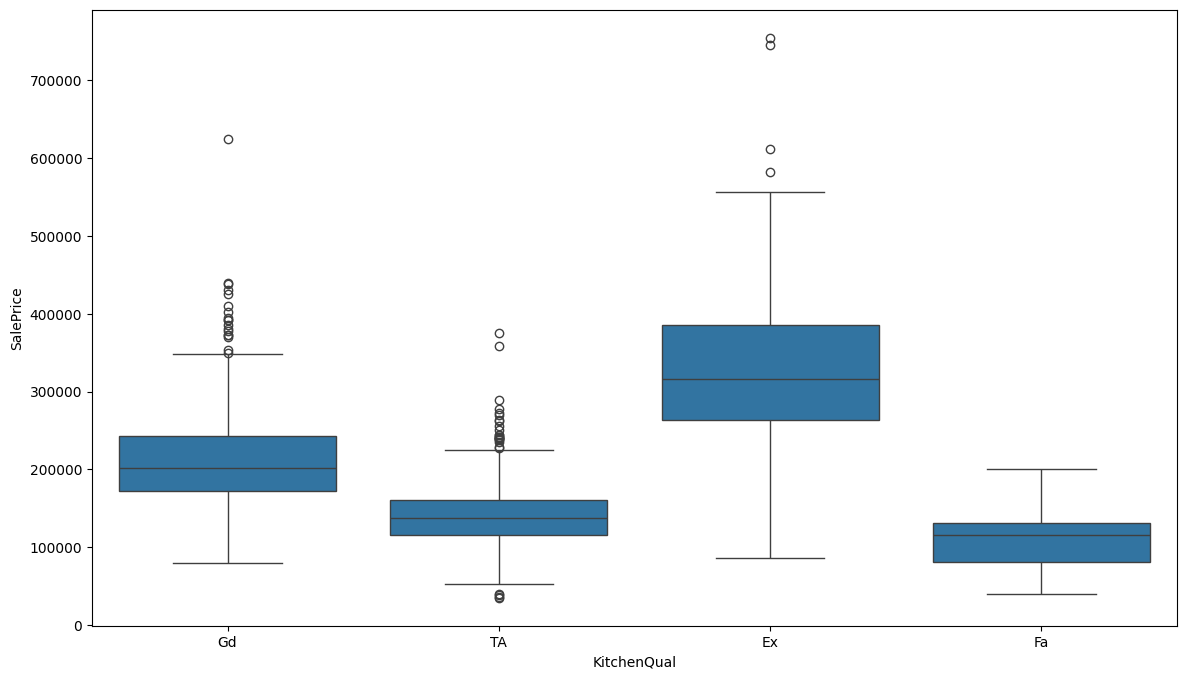

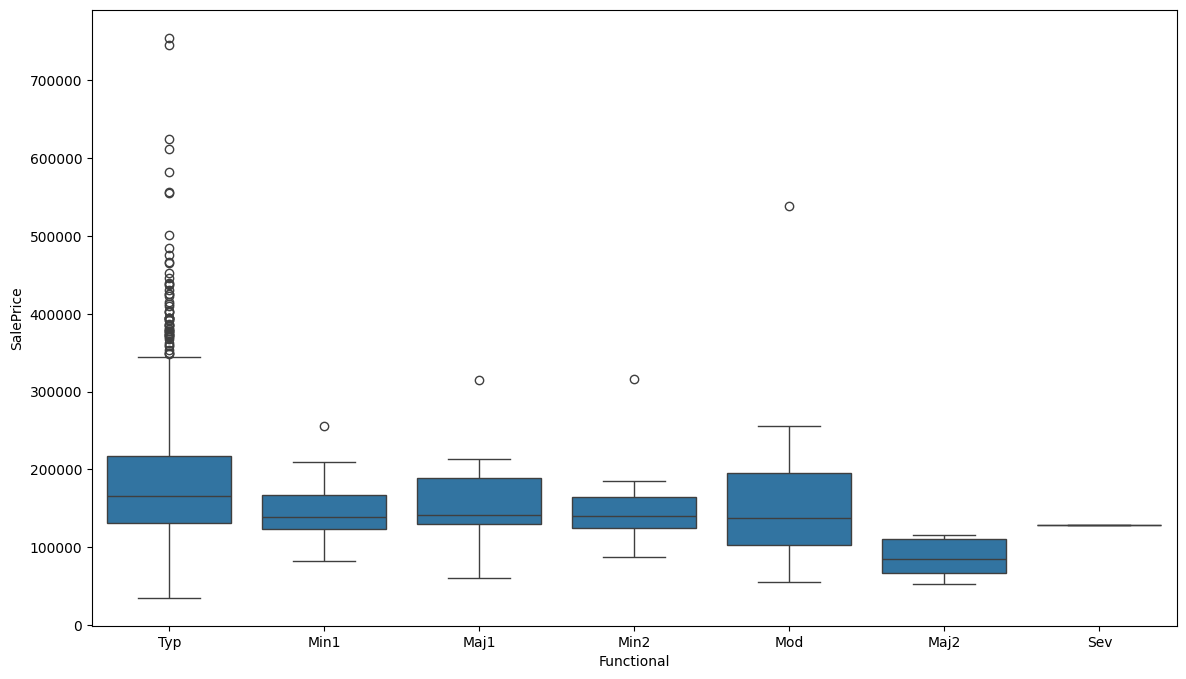

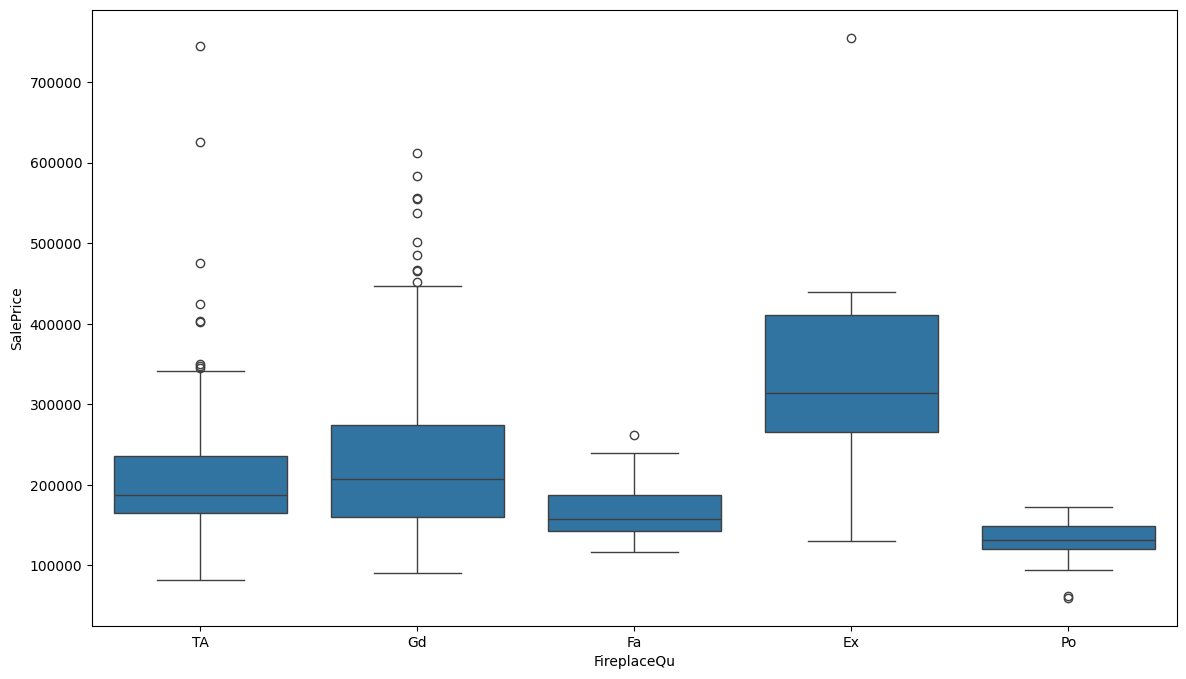

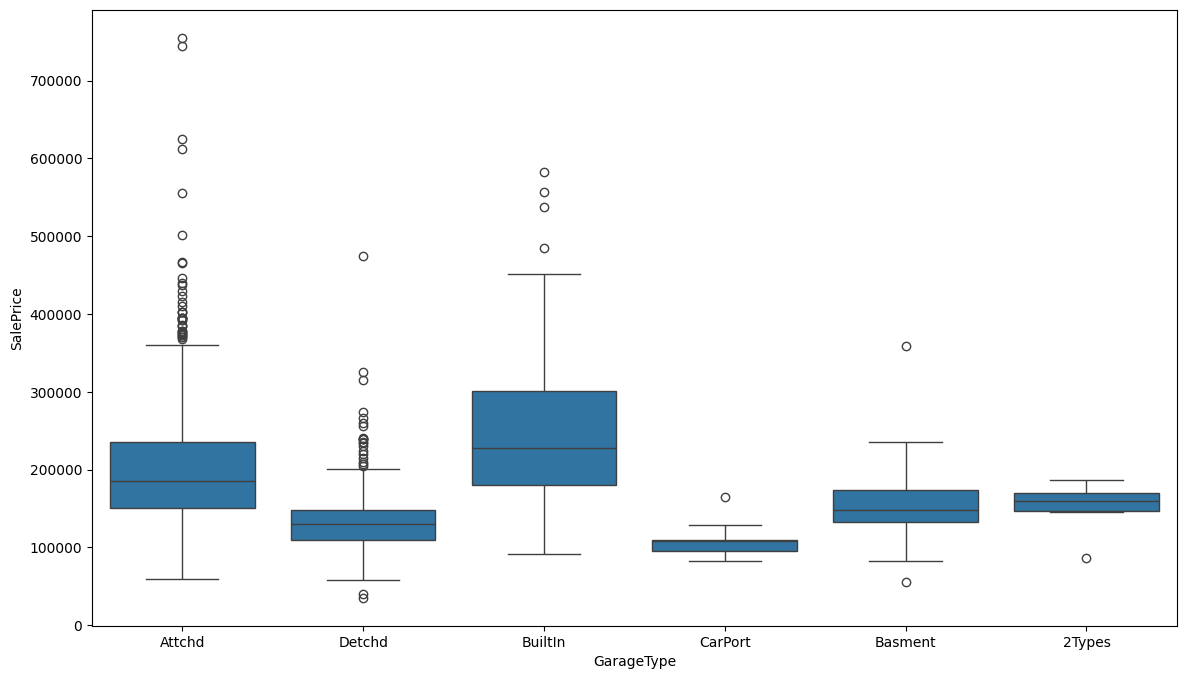

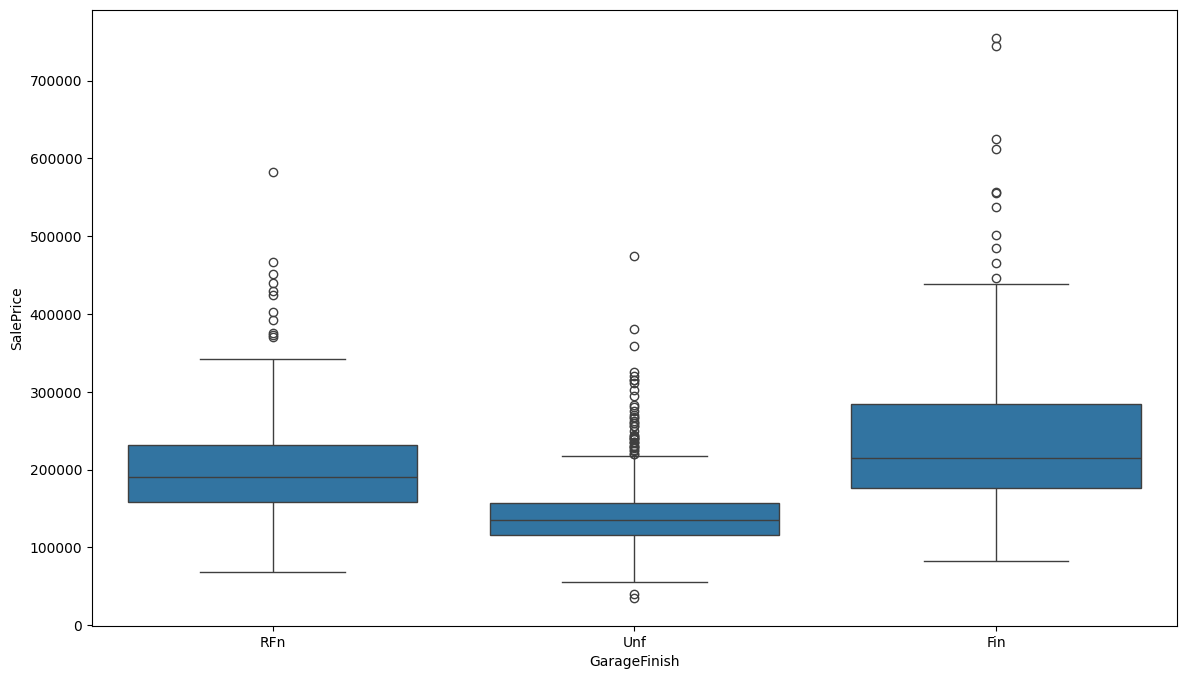

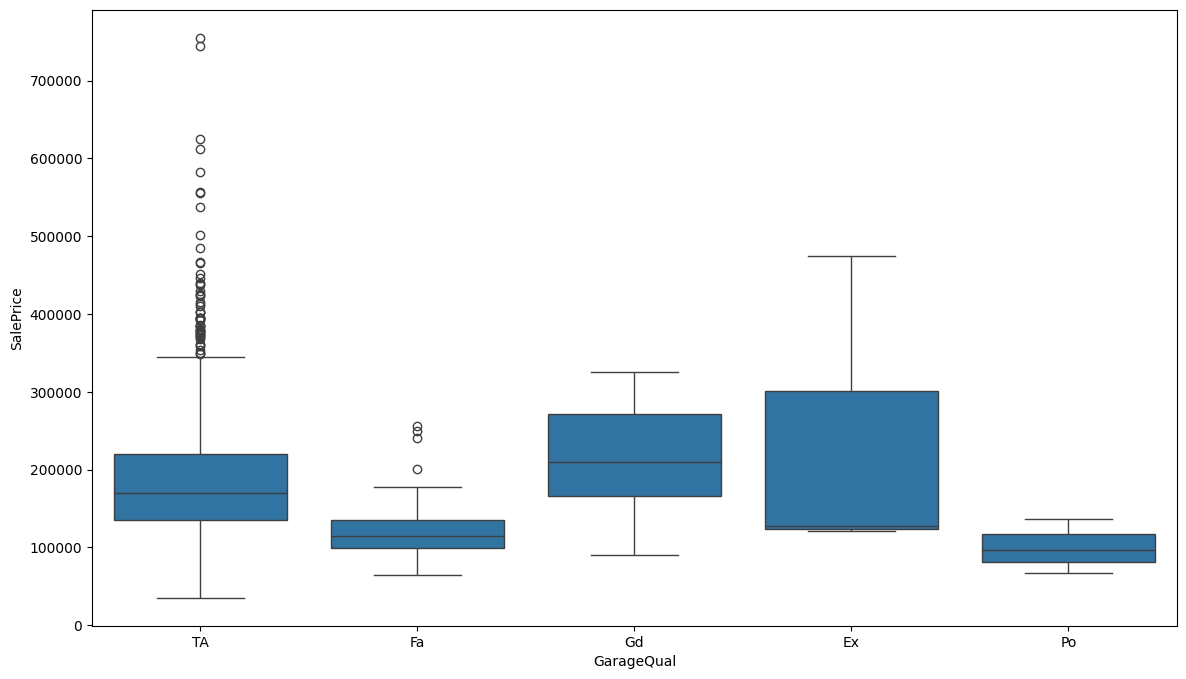

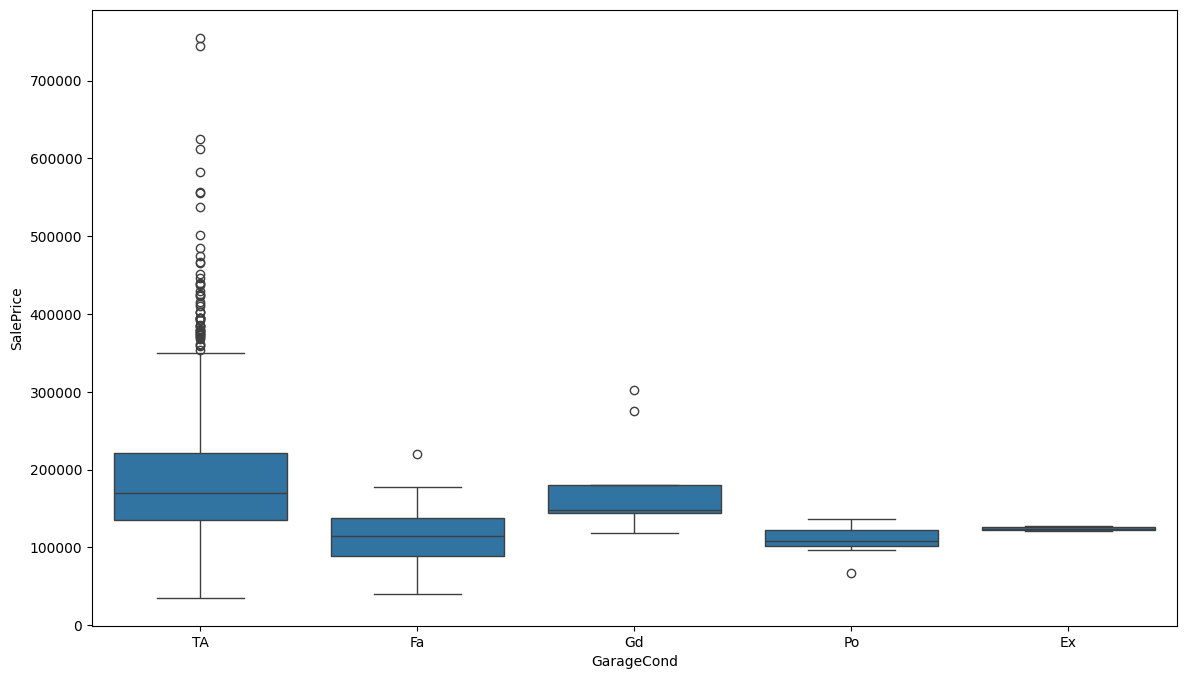

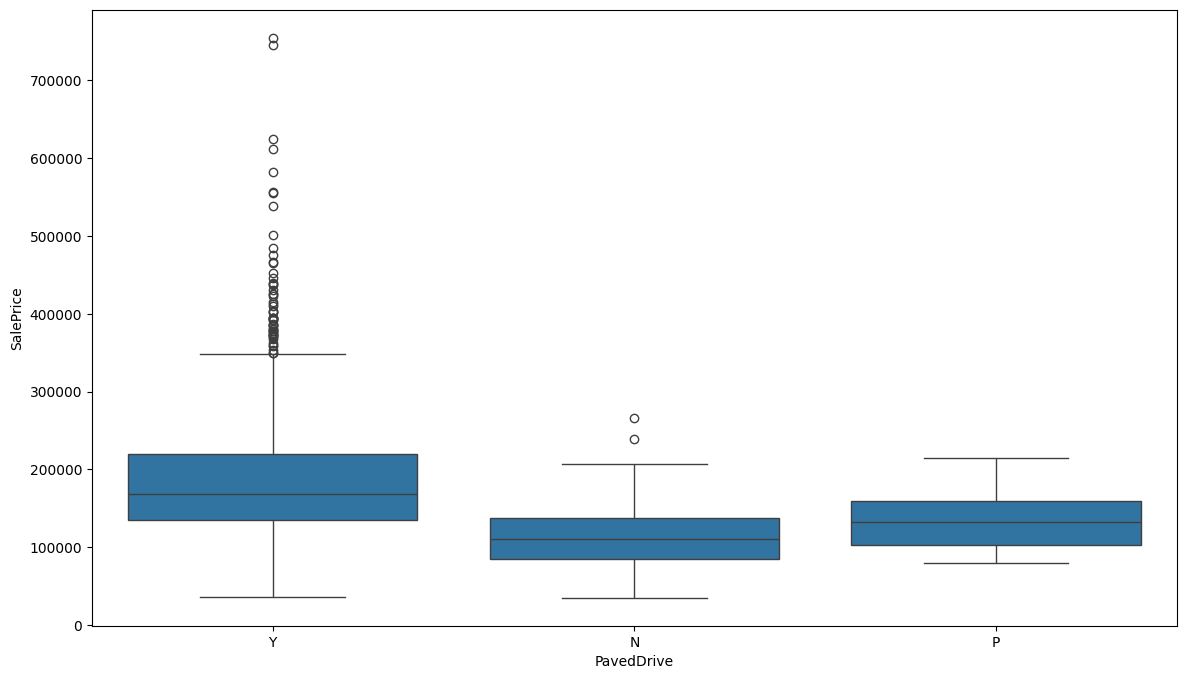

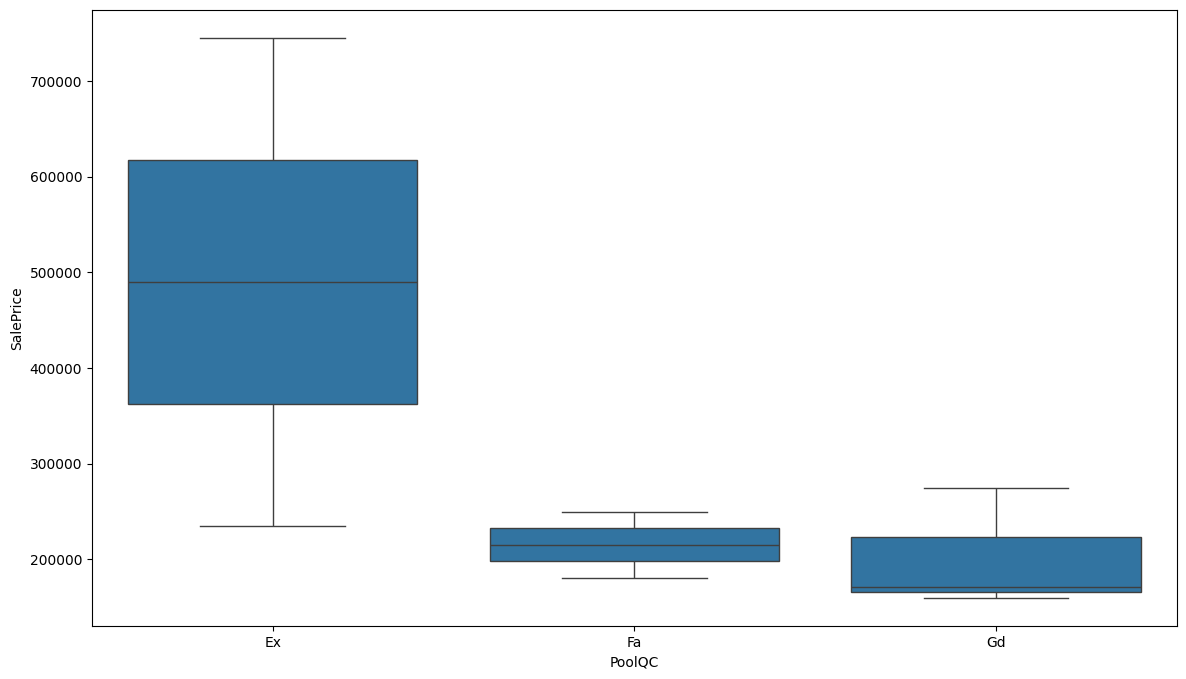

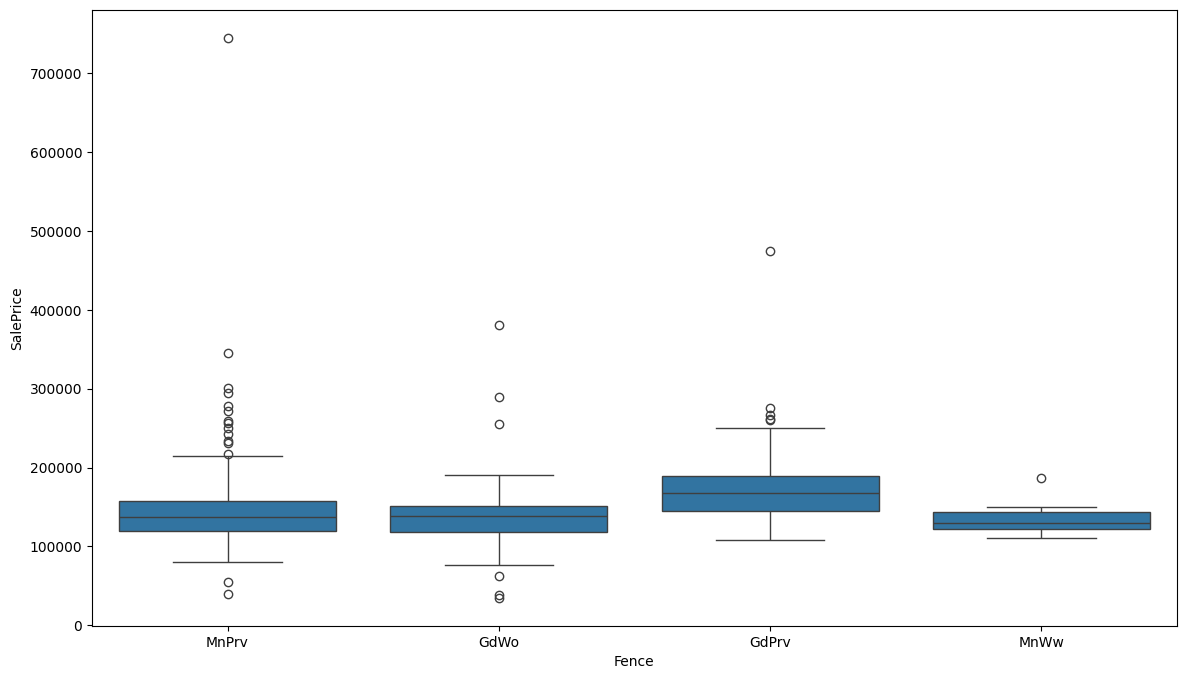

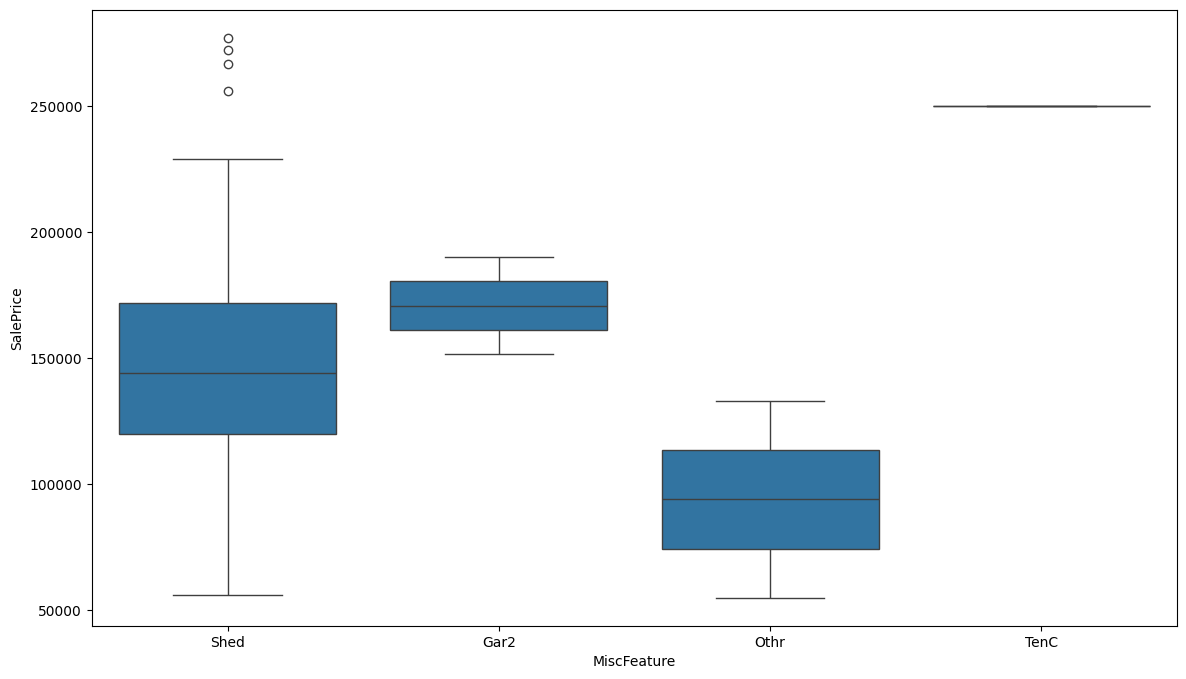

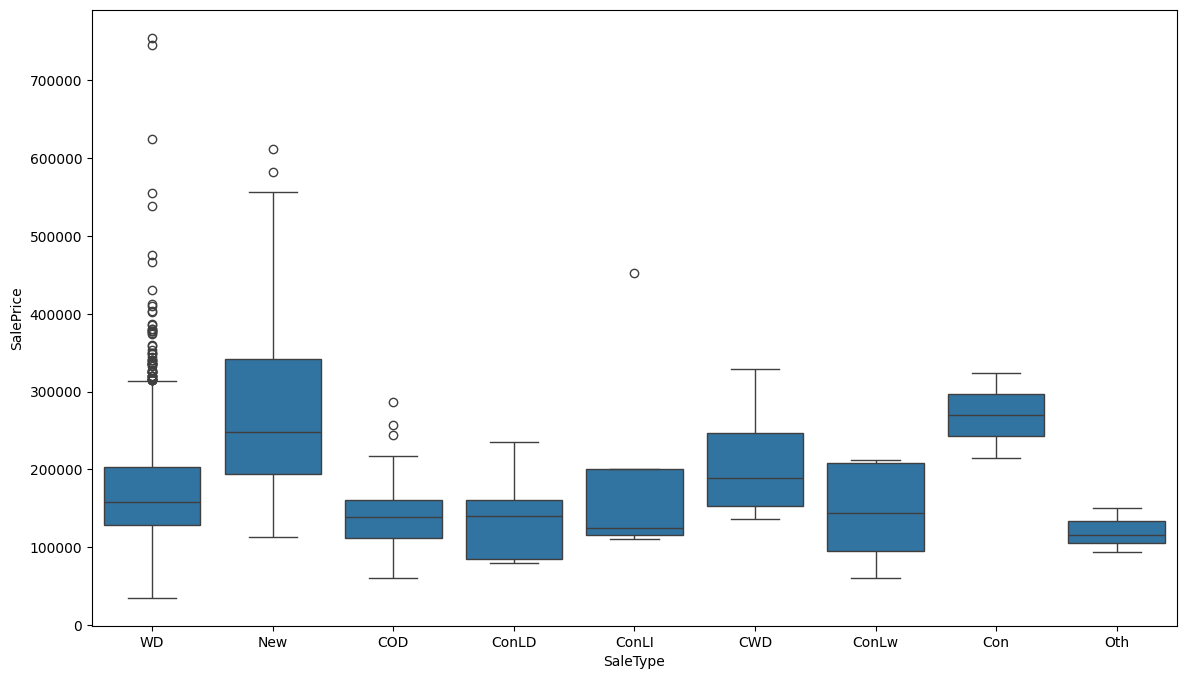

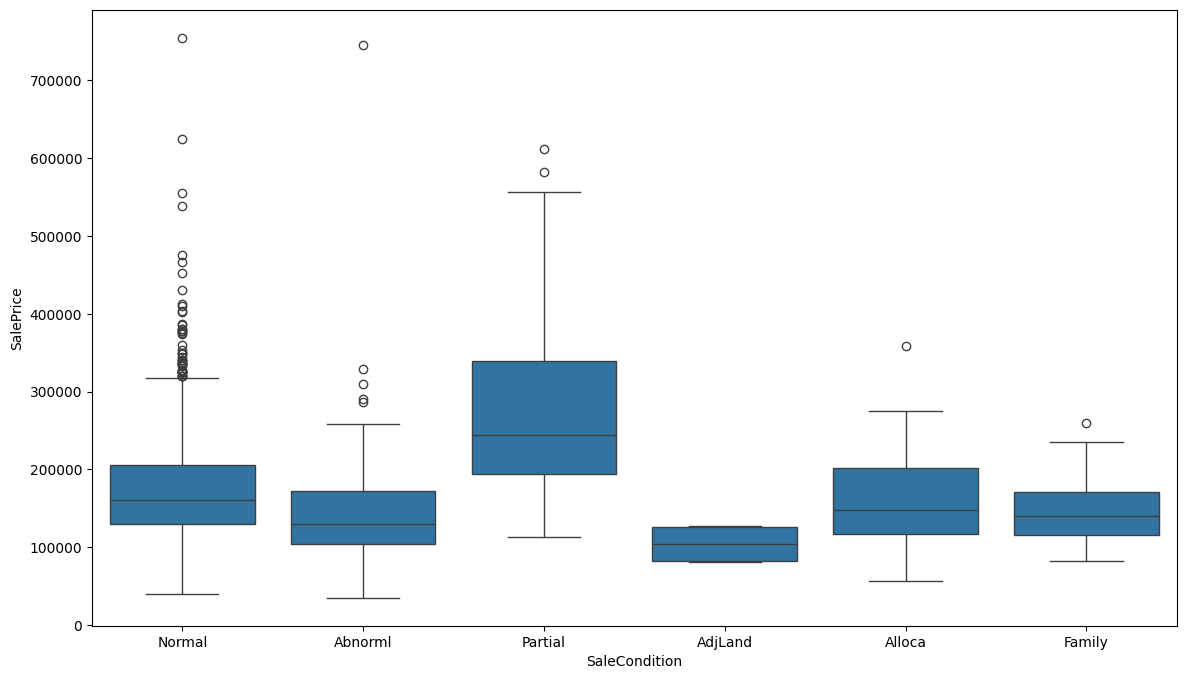

In [7]:
import seaborn as sns
for i in traindf.columns:
    if traindf[i].dtype == "object":
        plt.figure(figsize=(14,8))
        sns.boxplot(x=traindf[i],y=traindf["SalePrice"])
        

<Axes: xlabel='YrSold', ylabel='SalePrice'>

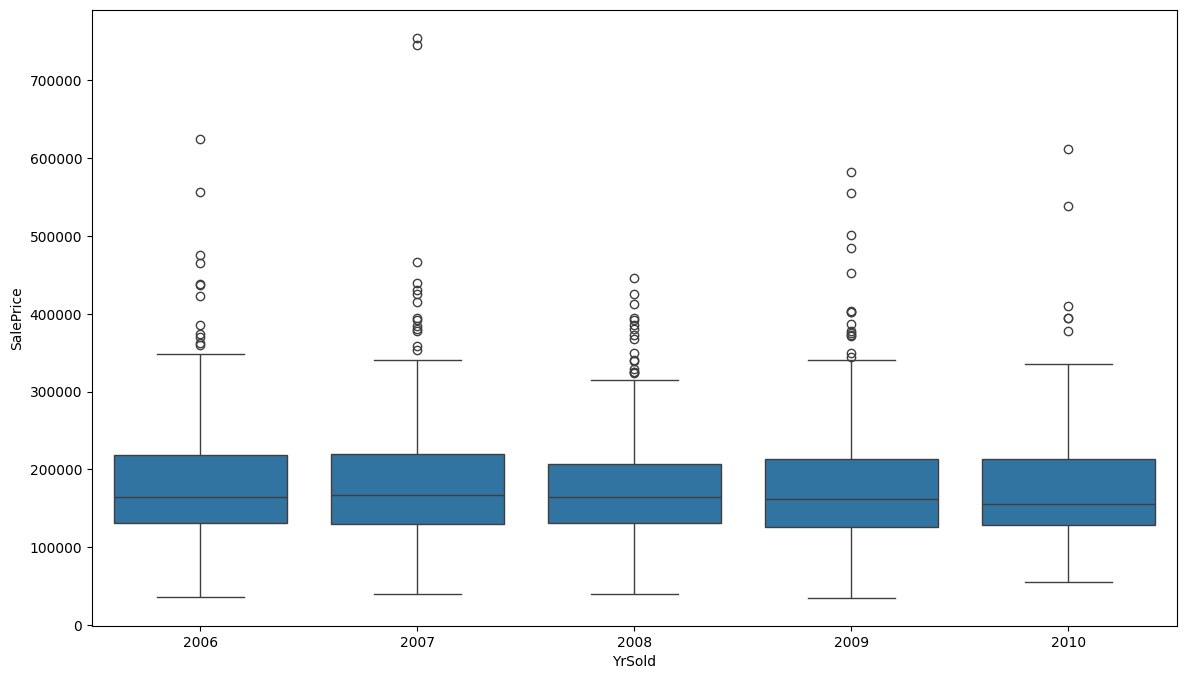

In [8]:
plt.figure(figsize=(14,8))
sns.boxplot(y=traindf["SalePrice"],x=traindf["YrSold"])

In [9]:
testdf = pd.read_csv("test.csv")
testdf

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

C:\Users\jenni\AppData\Local\Temp\ipykernel_19324\2316629299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d = traindf.corr()


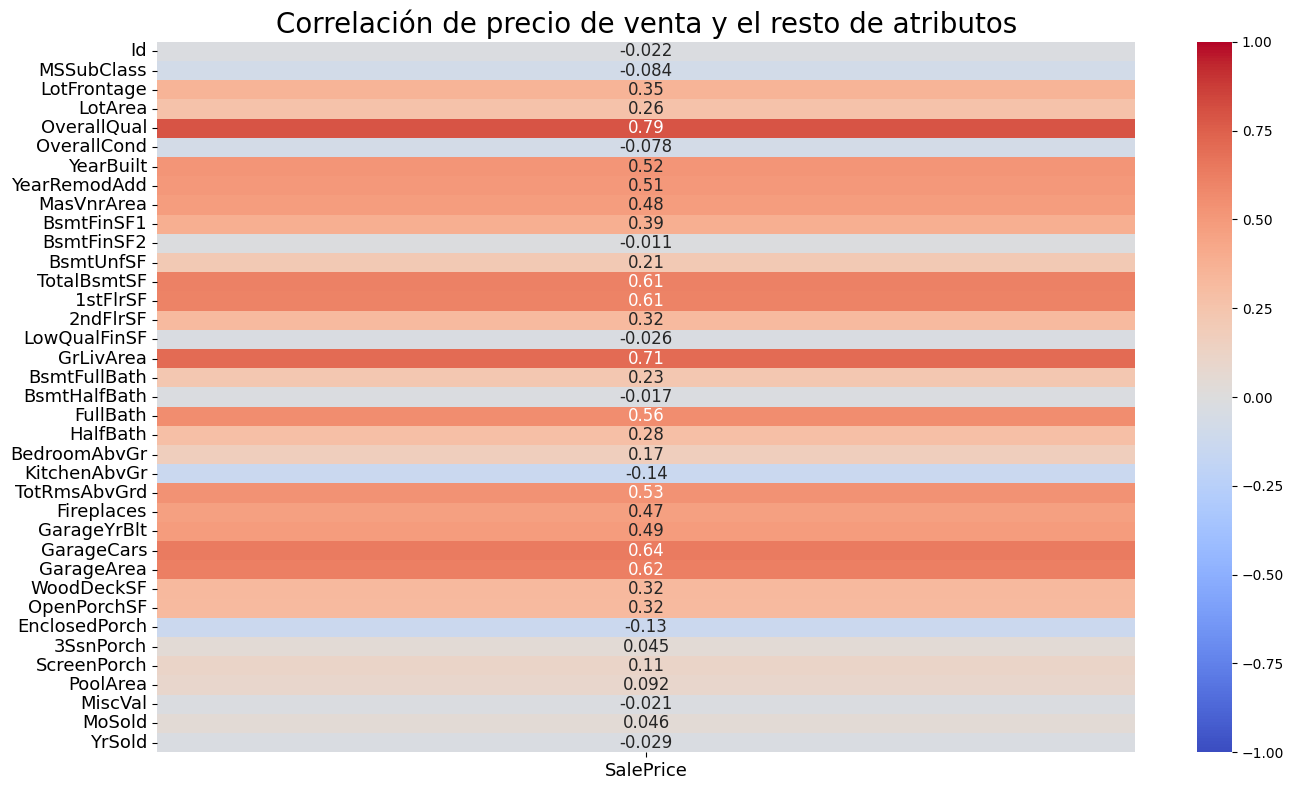

In [10]:
import seaborn as sns
d = traindf.corr()
specific_corr = d[['SalePrice']].drop(index='SalePrice') 


plt.figure(figsize=(14, 8))  
sns.heatmap(specific_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            cbar=True, cbar_kws={'shrink': 1}, 
            annot_kws={'size': 12},  
            xticklabels=True, yticklabels=True)


plt.xticks(fontsize=13)  
plt.yticks(fontsize=13)  
plt.title('Correlación de precio de venta y el resto de atributos', fontsize=20)  
plt.tight_layout()

C:\Users\jenni\AppData\Local\Temp\ipykernel_19324\1911428583.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,8))


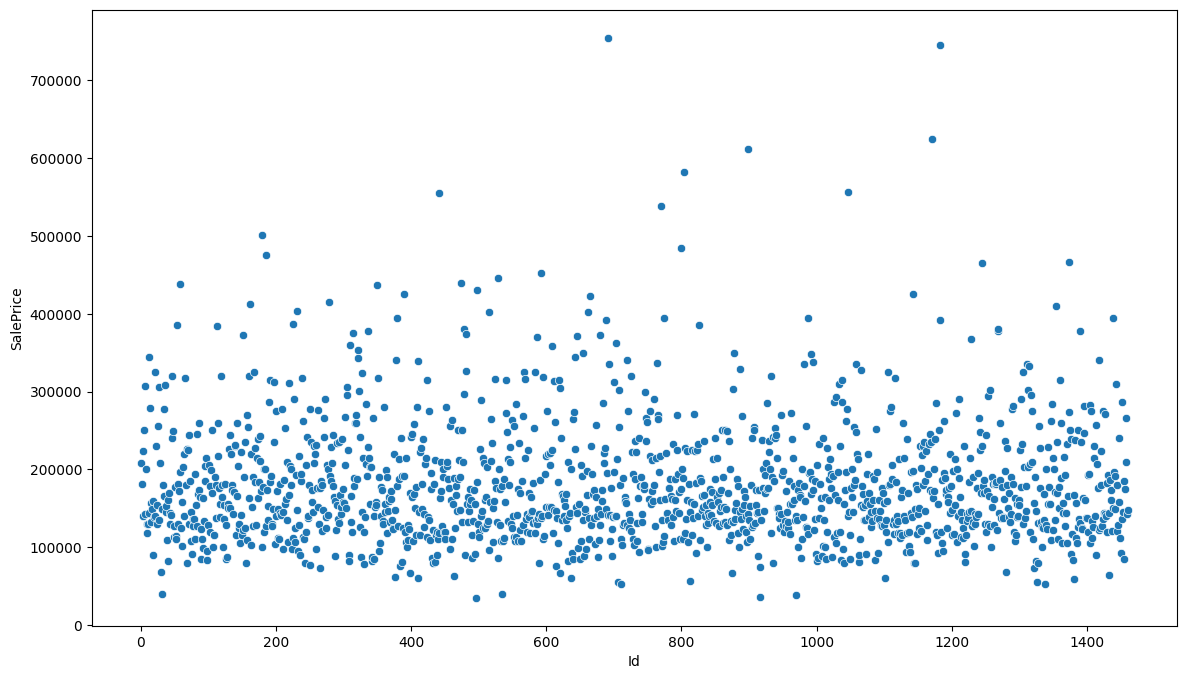

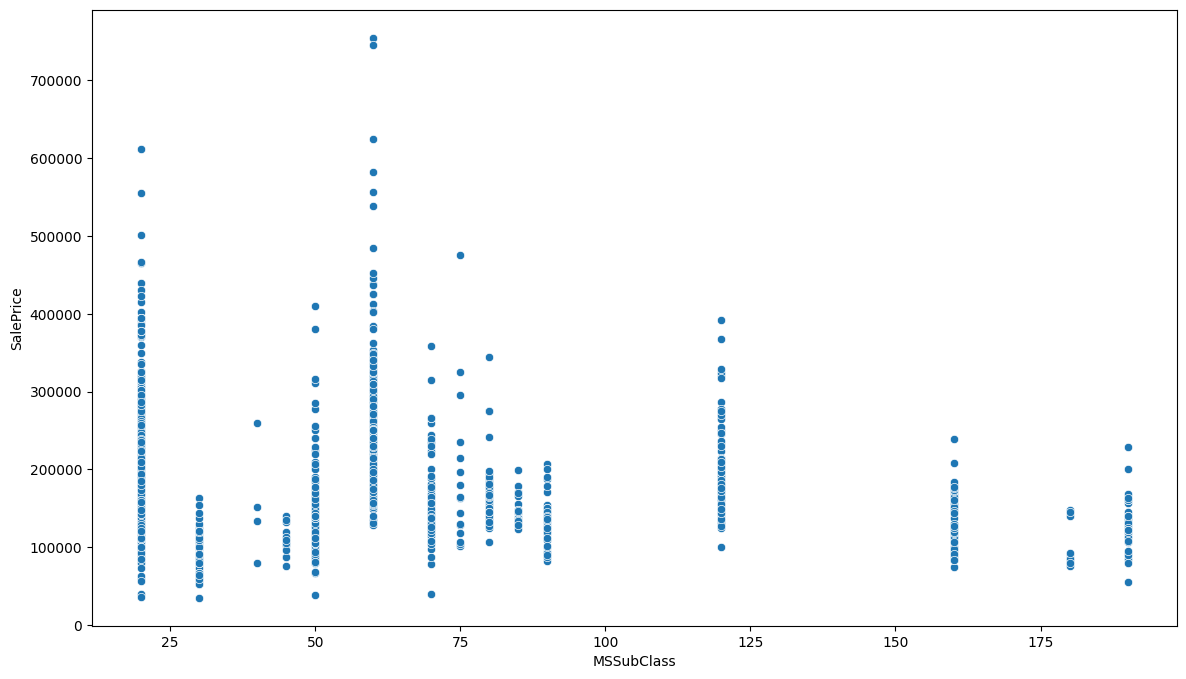

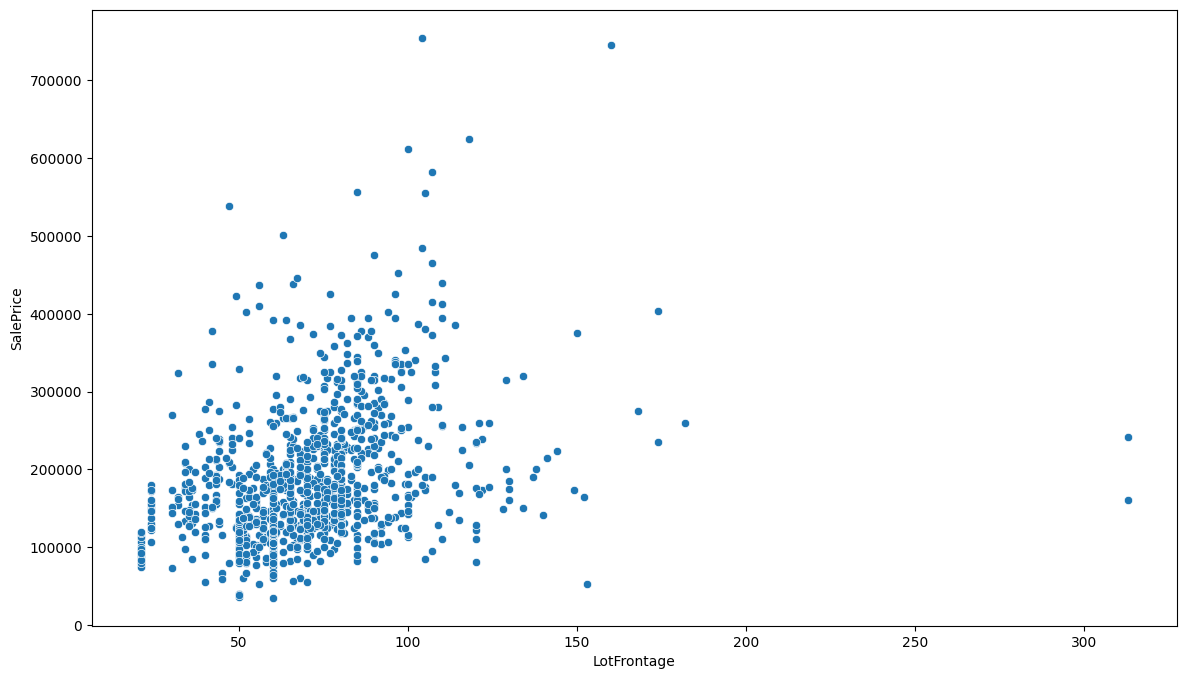

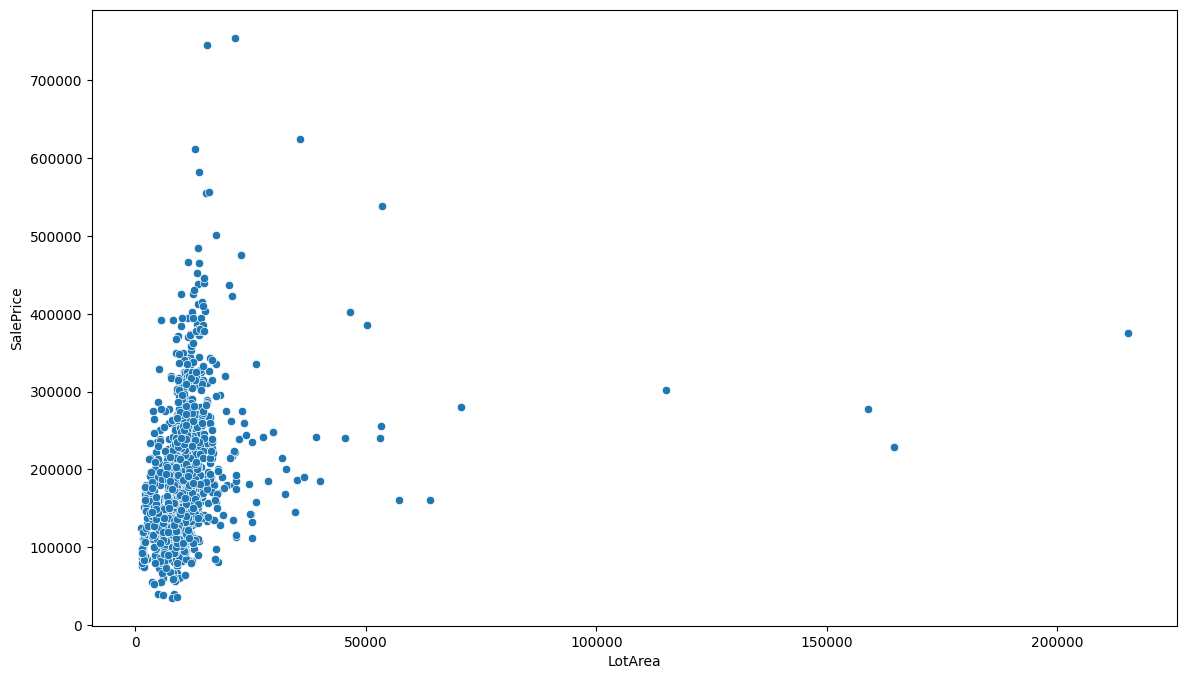

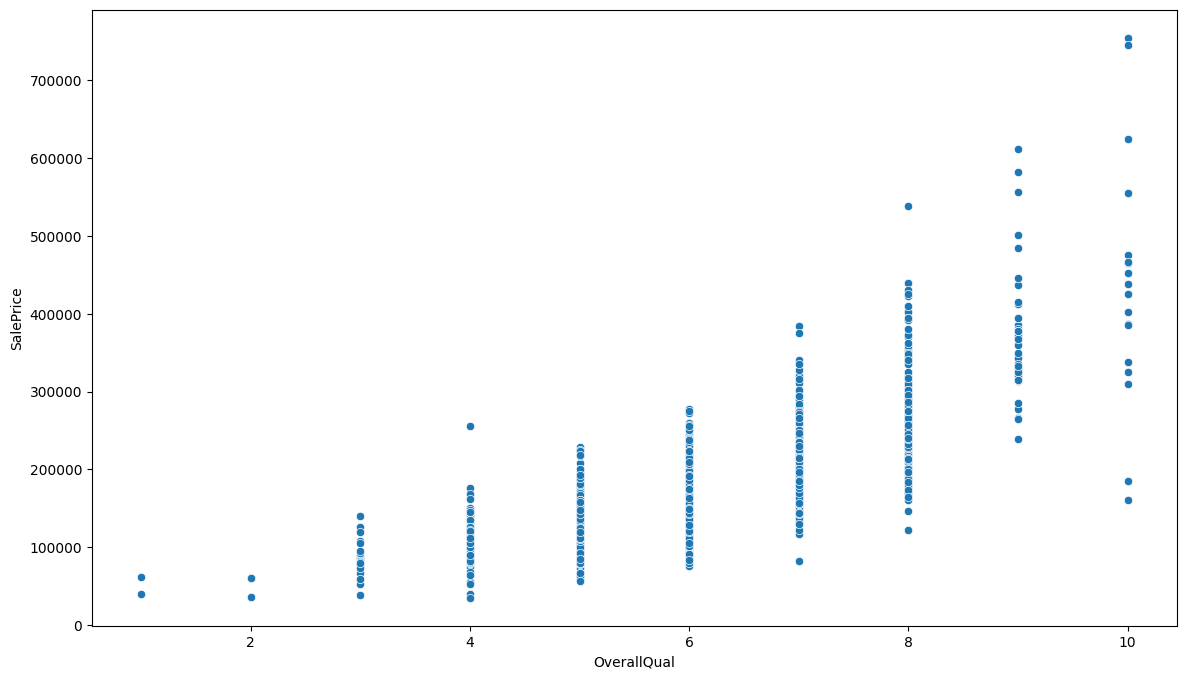

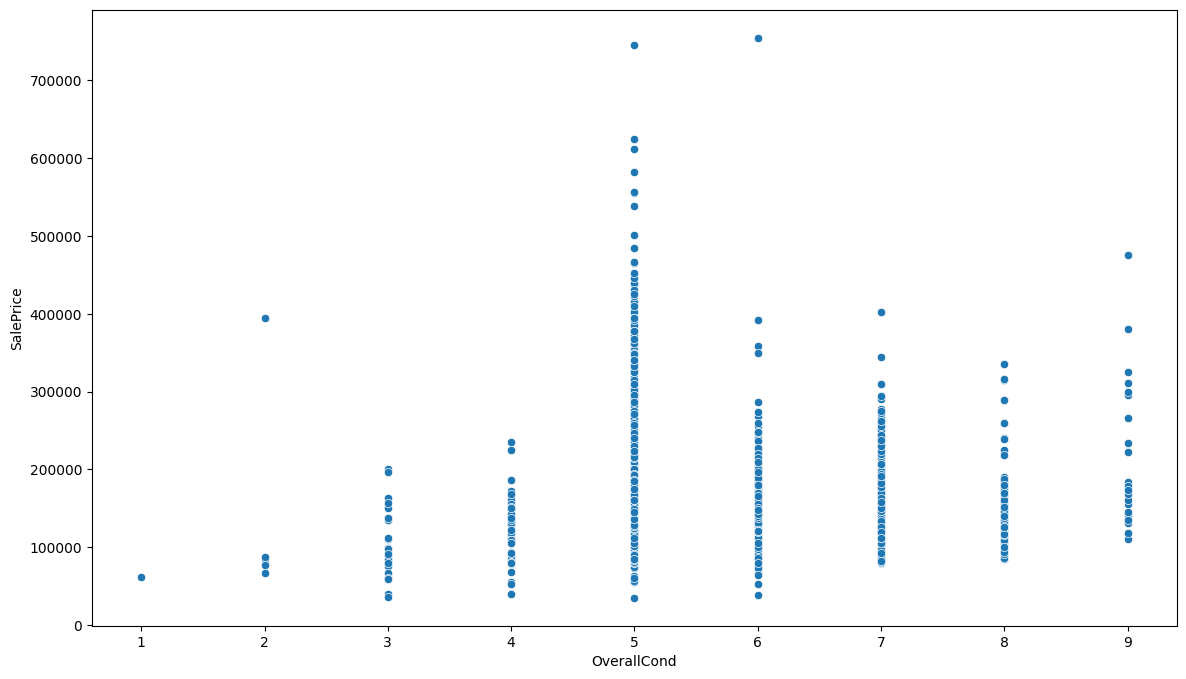

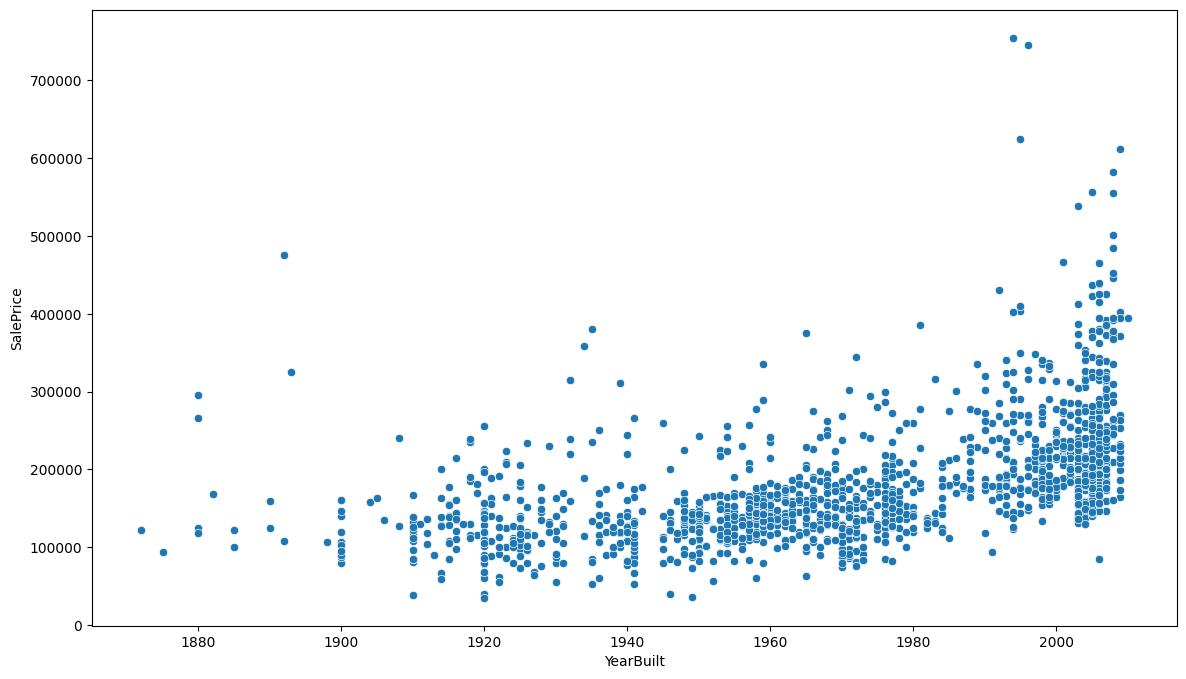

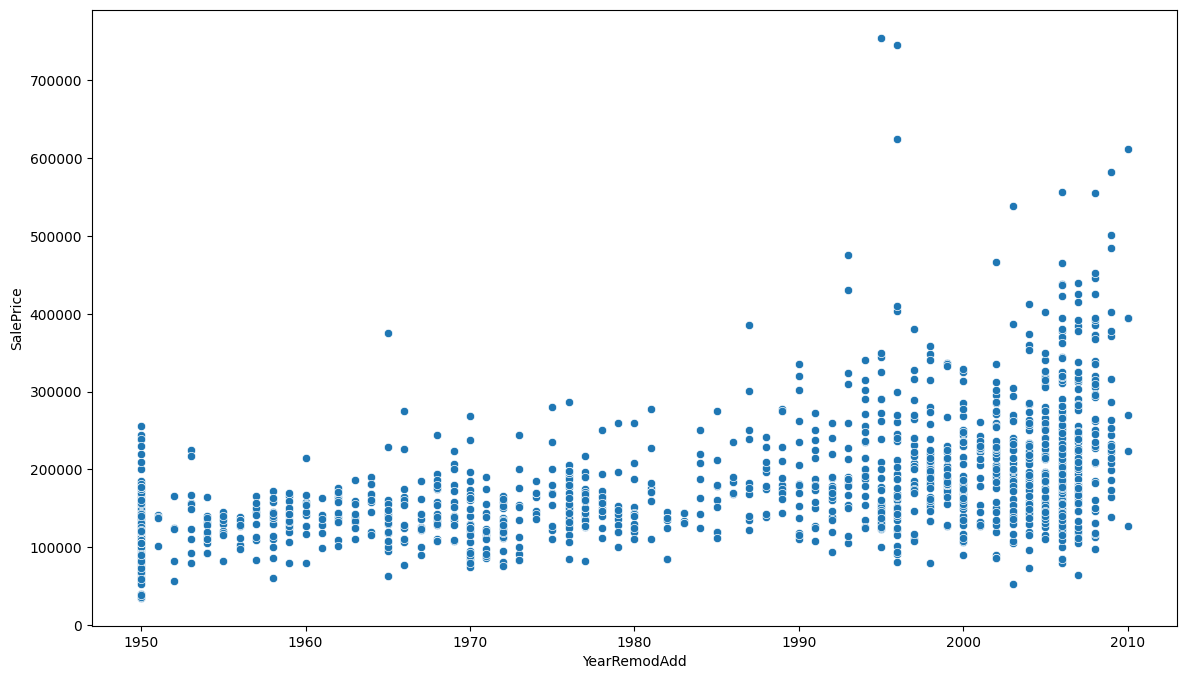

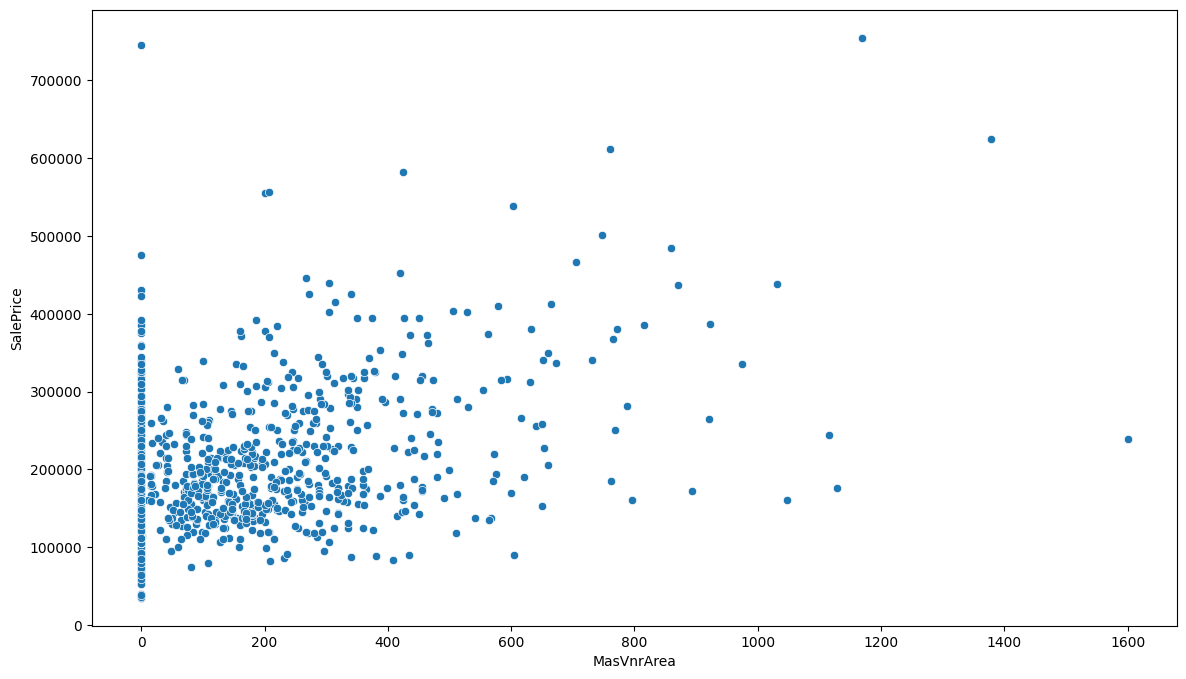

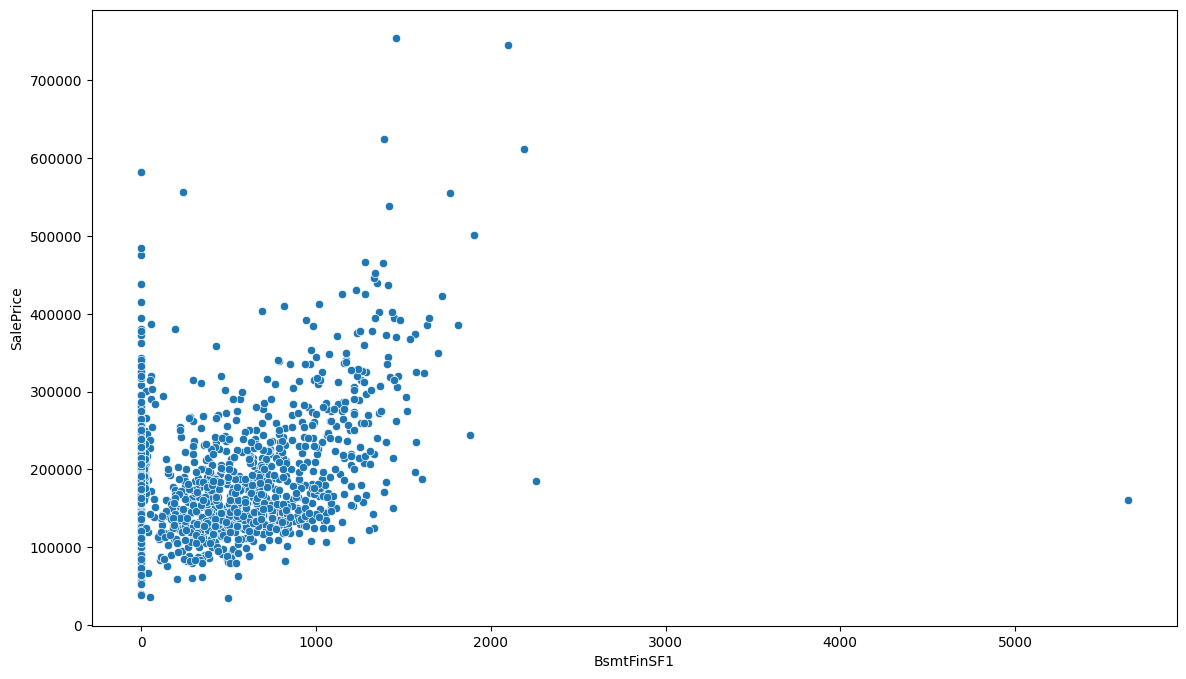

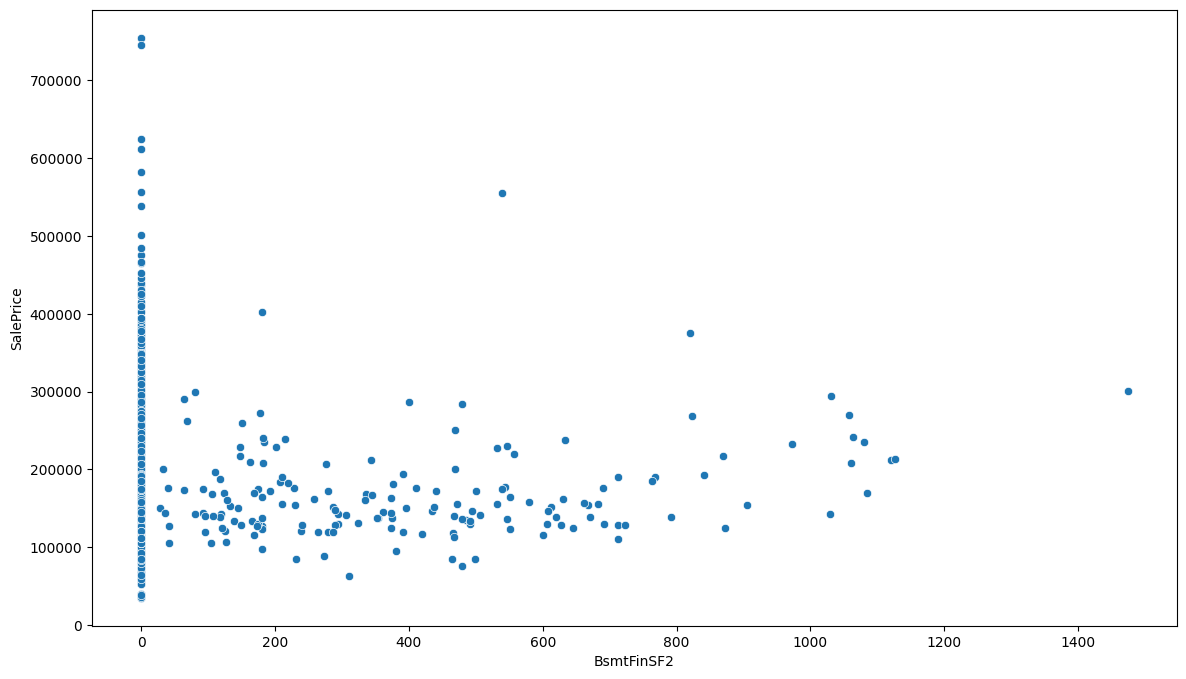

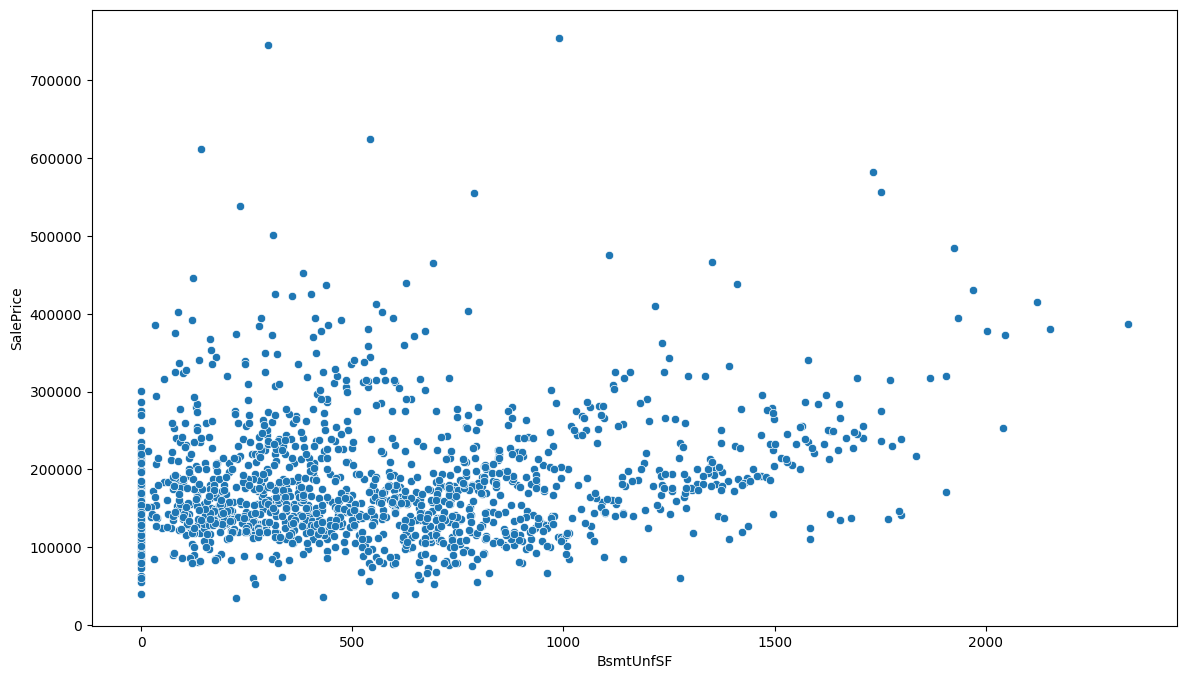

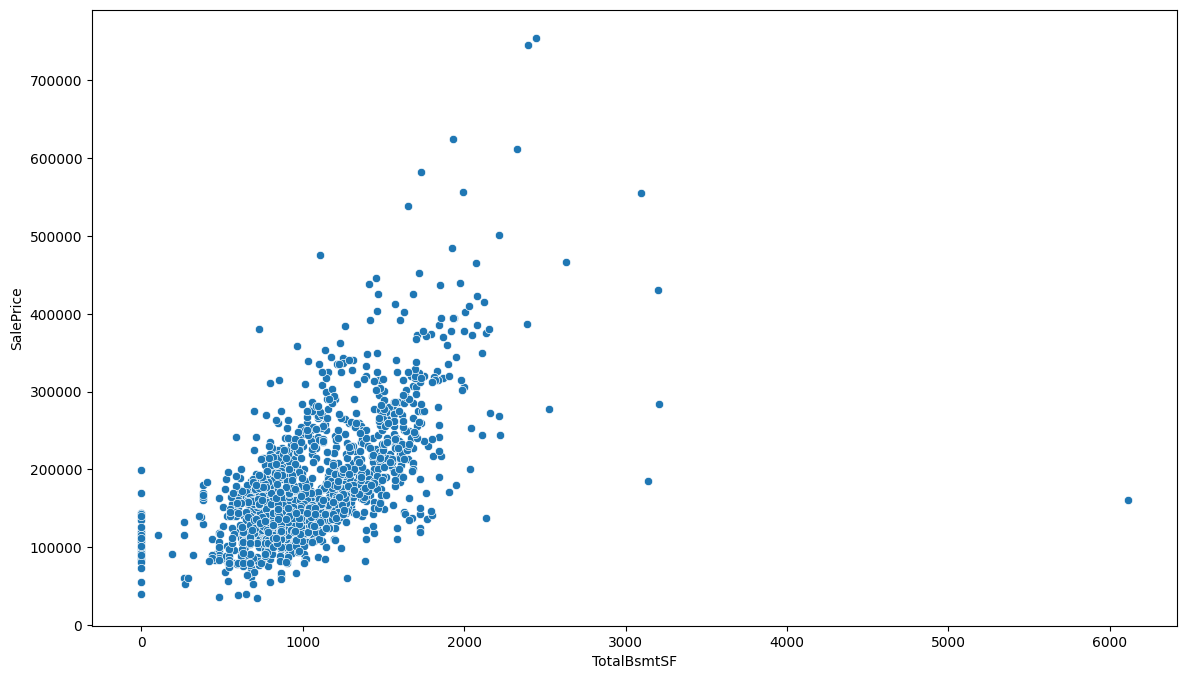

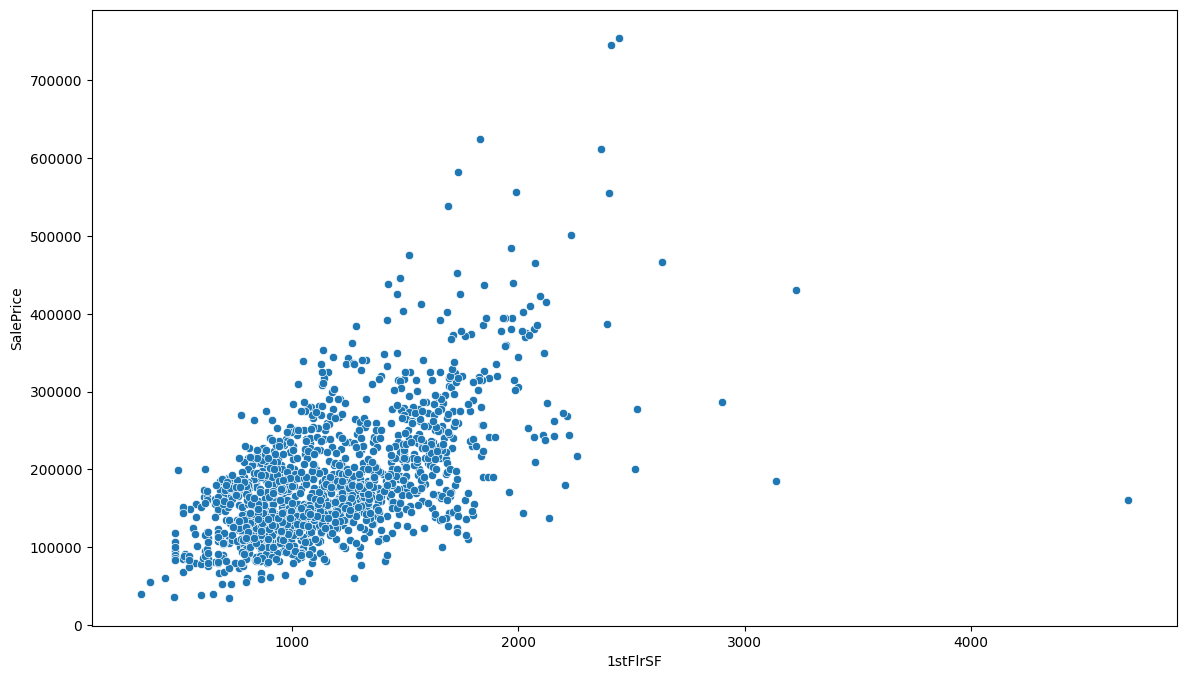

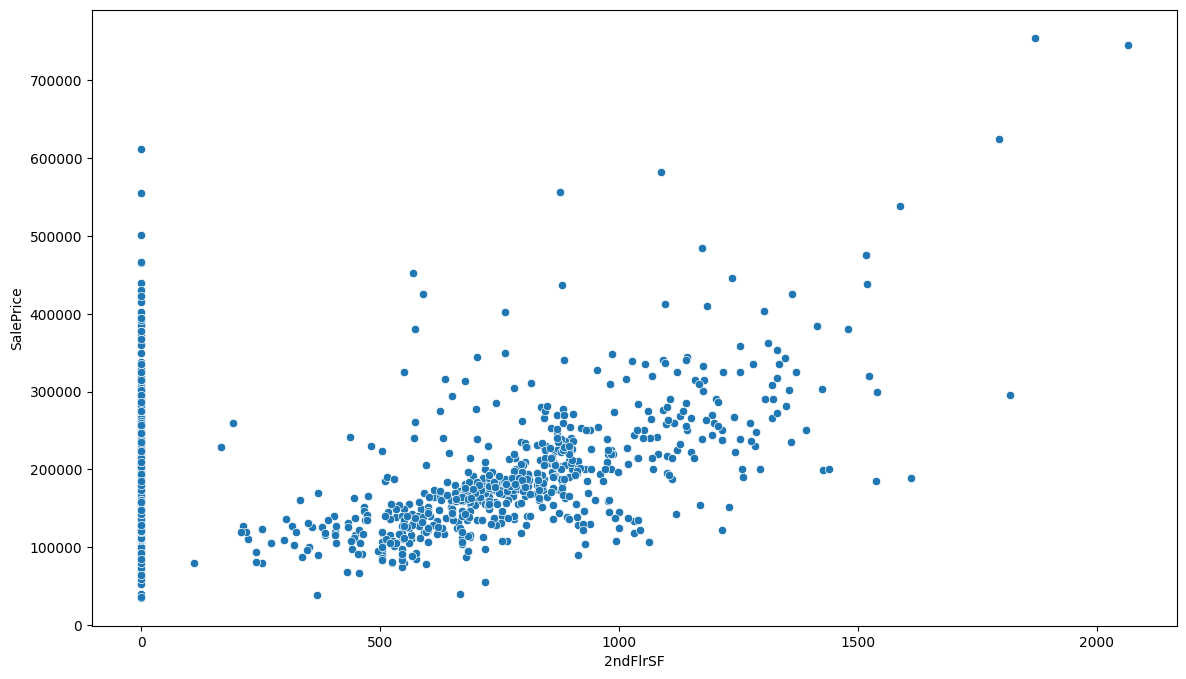

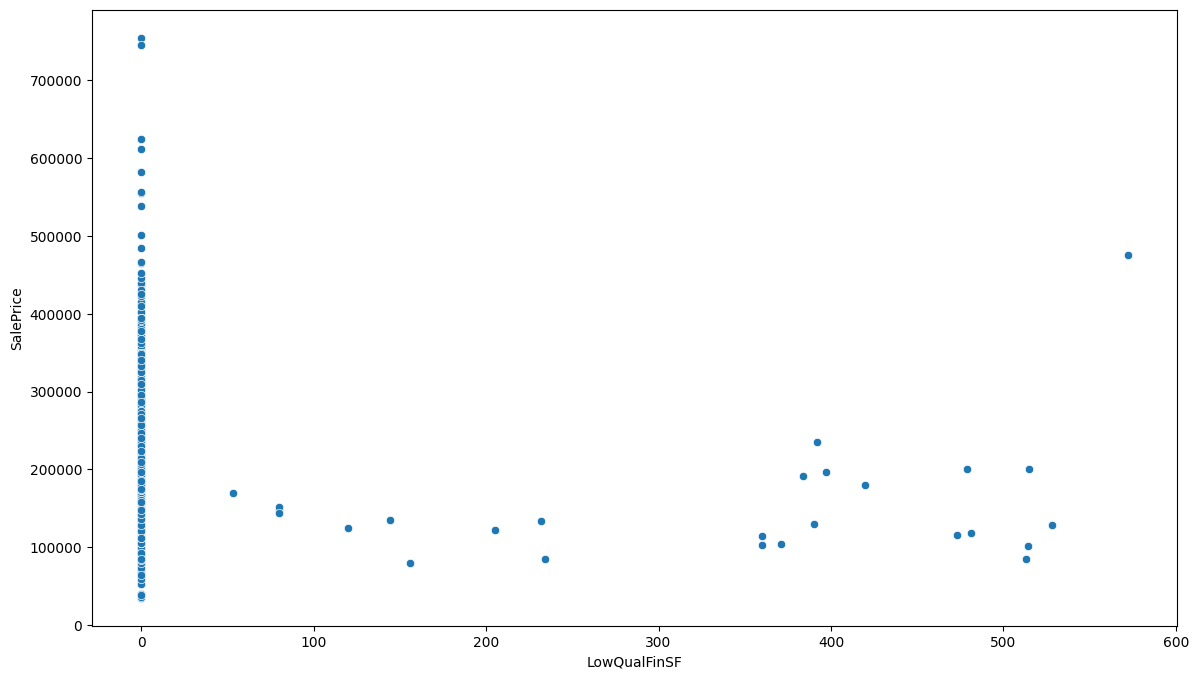

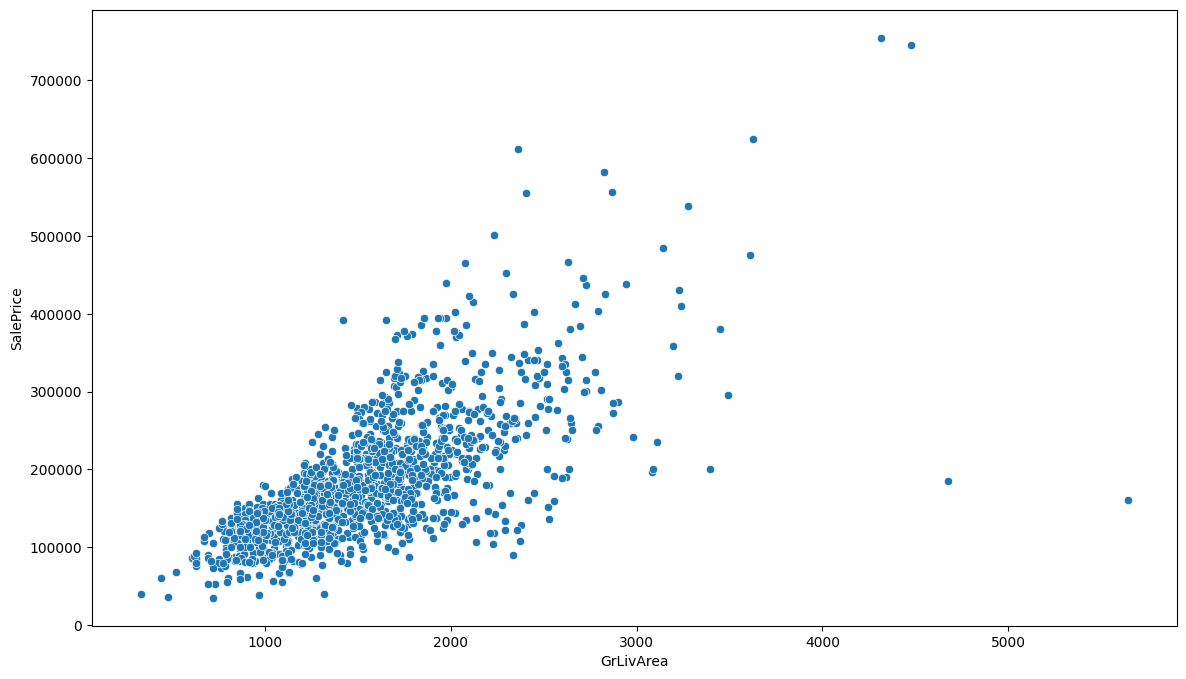

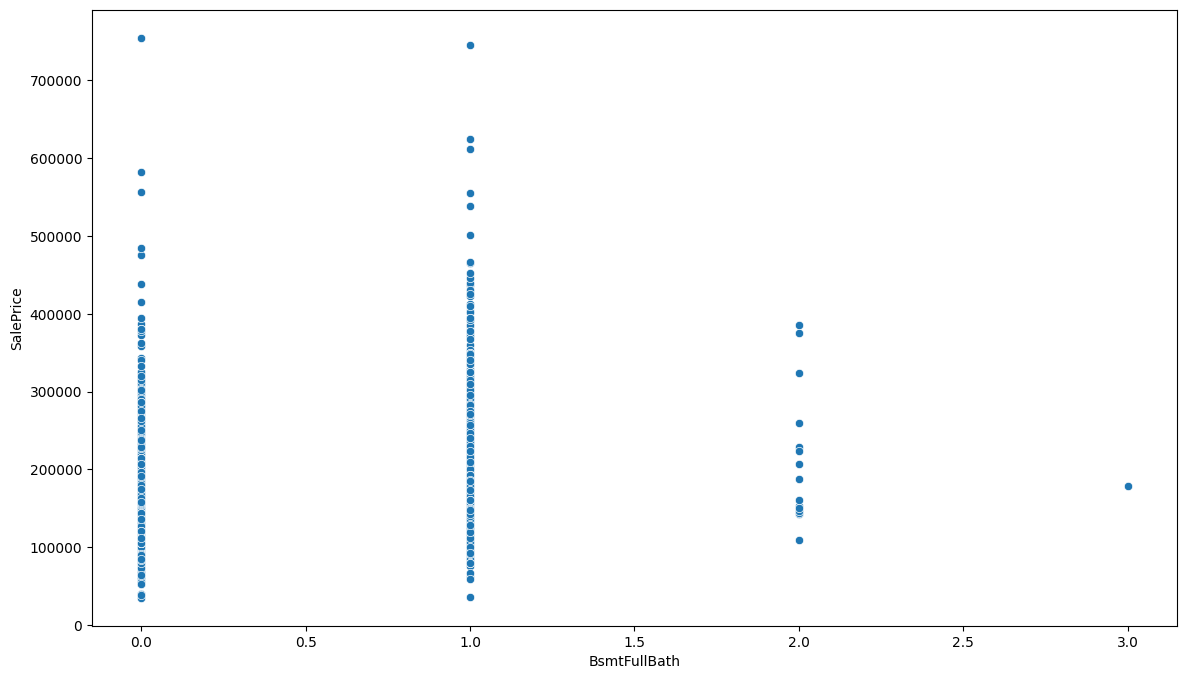

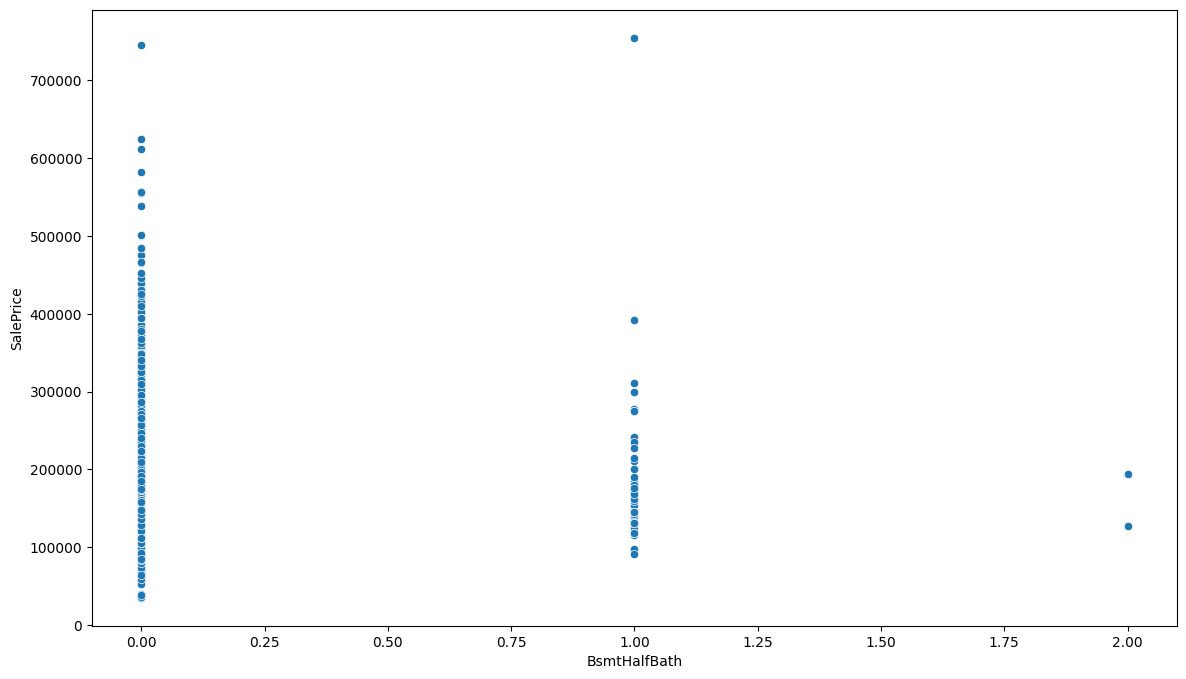

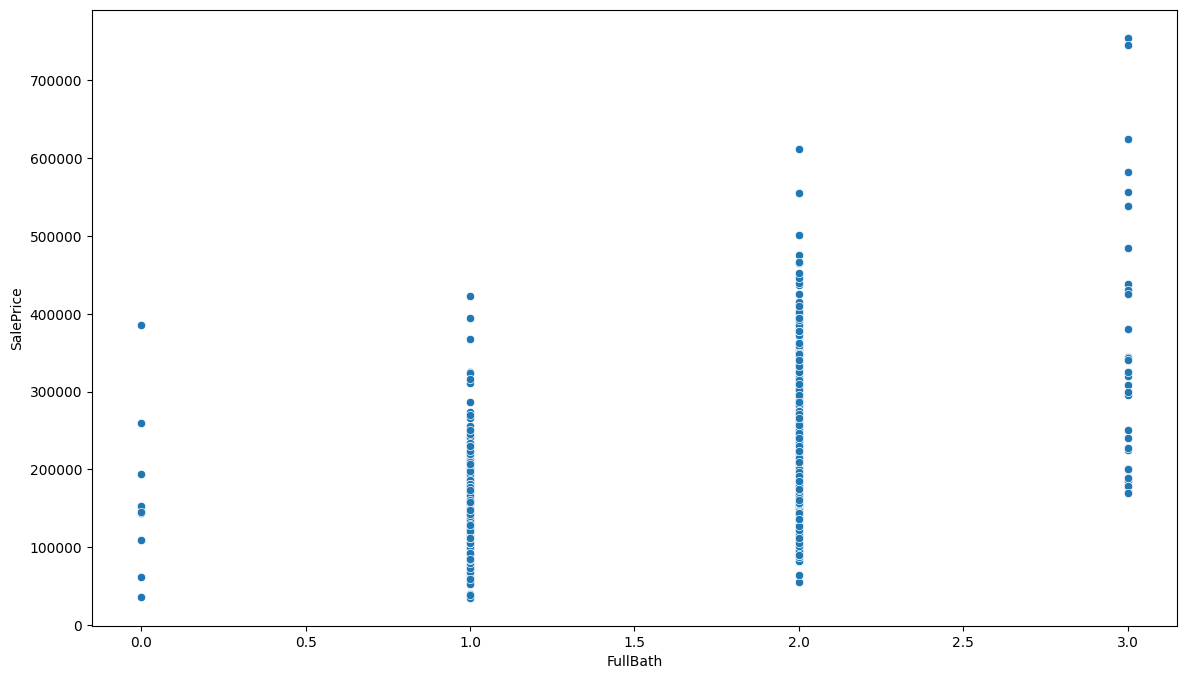

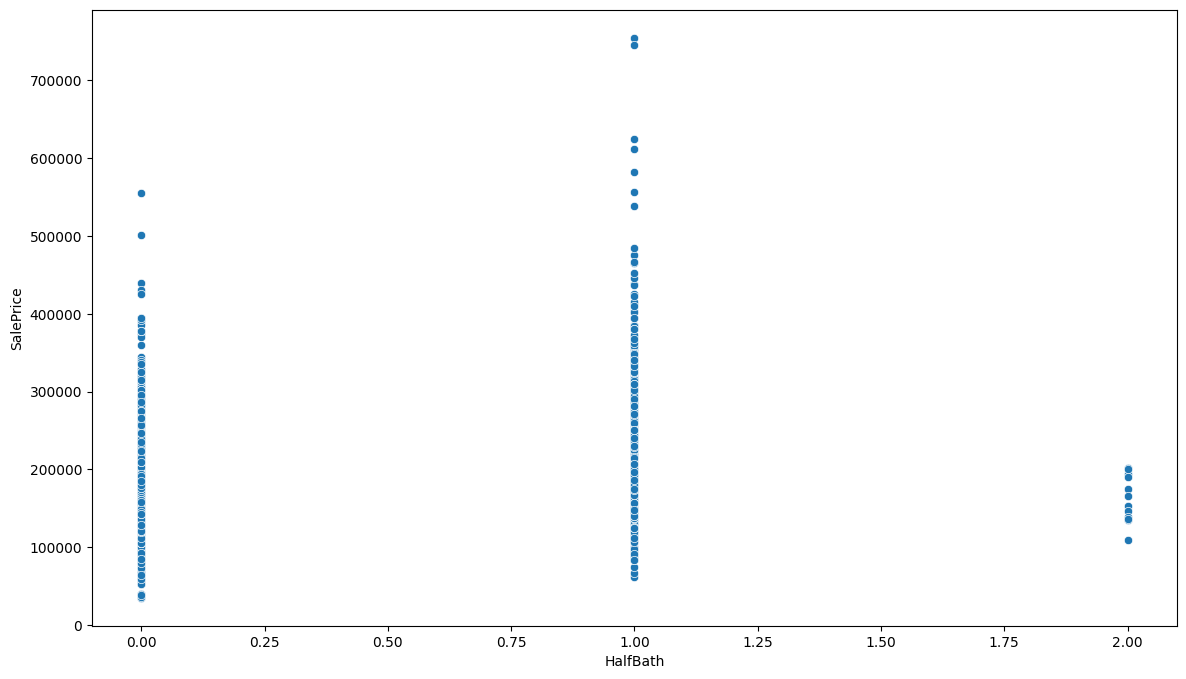

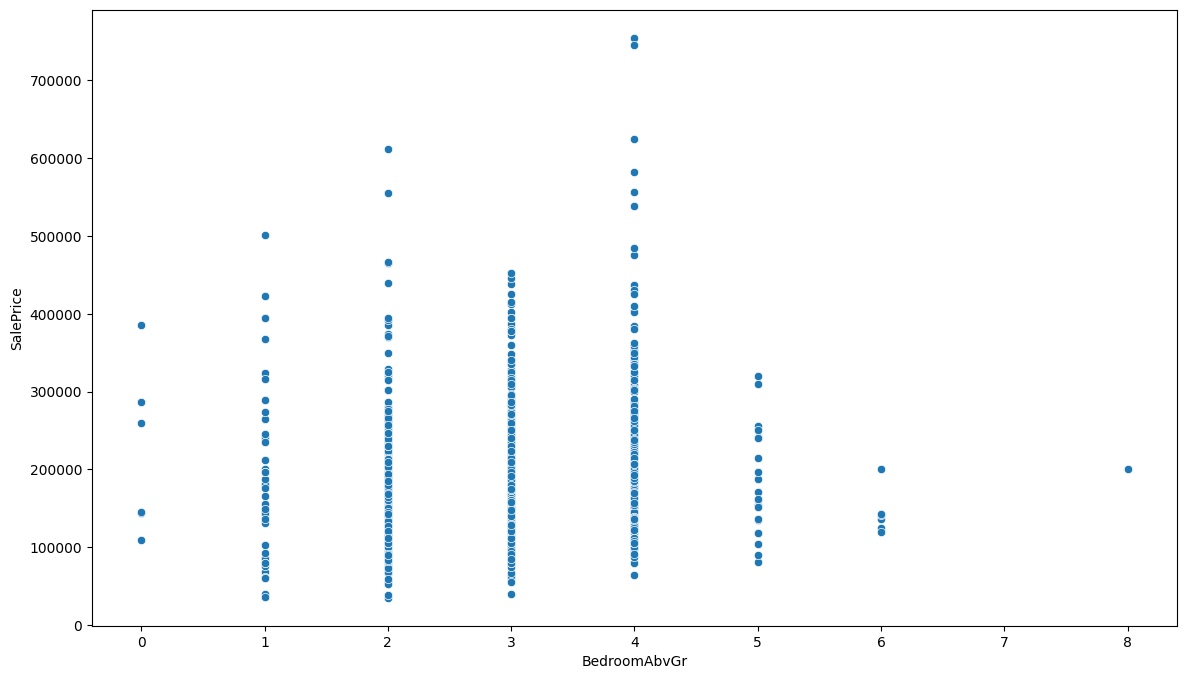

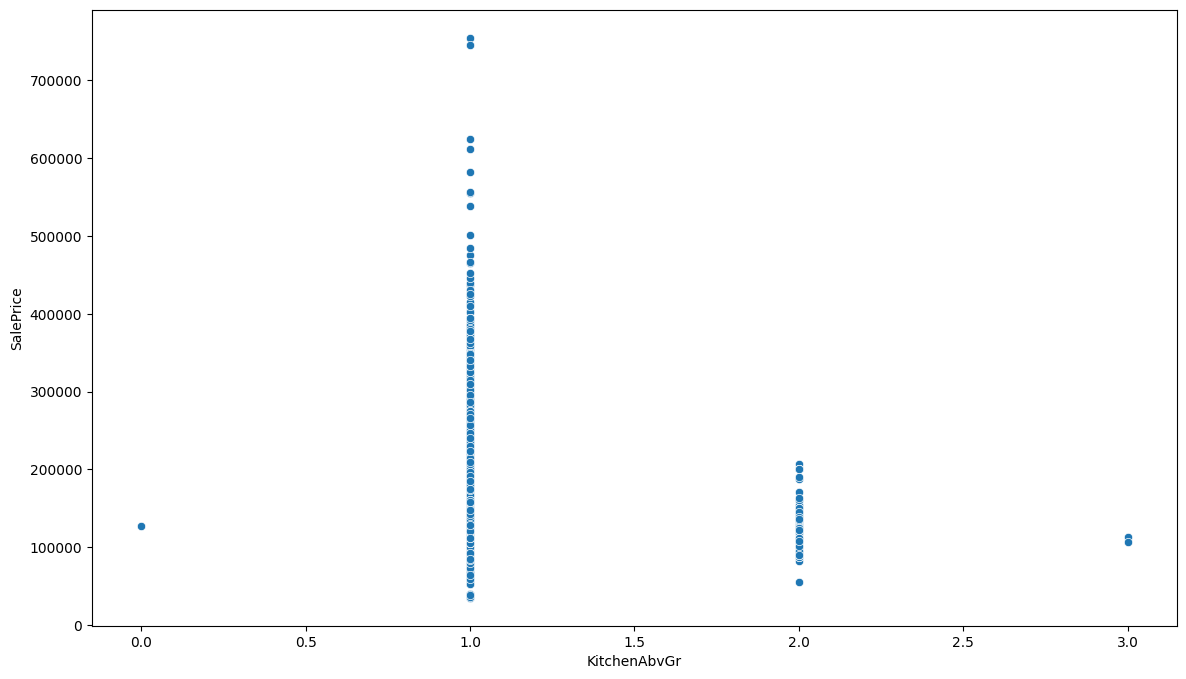

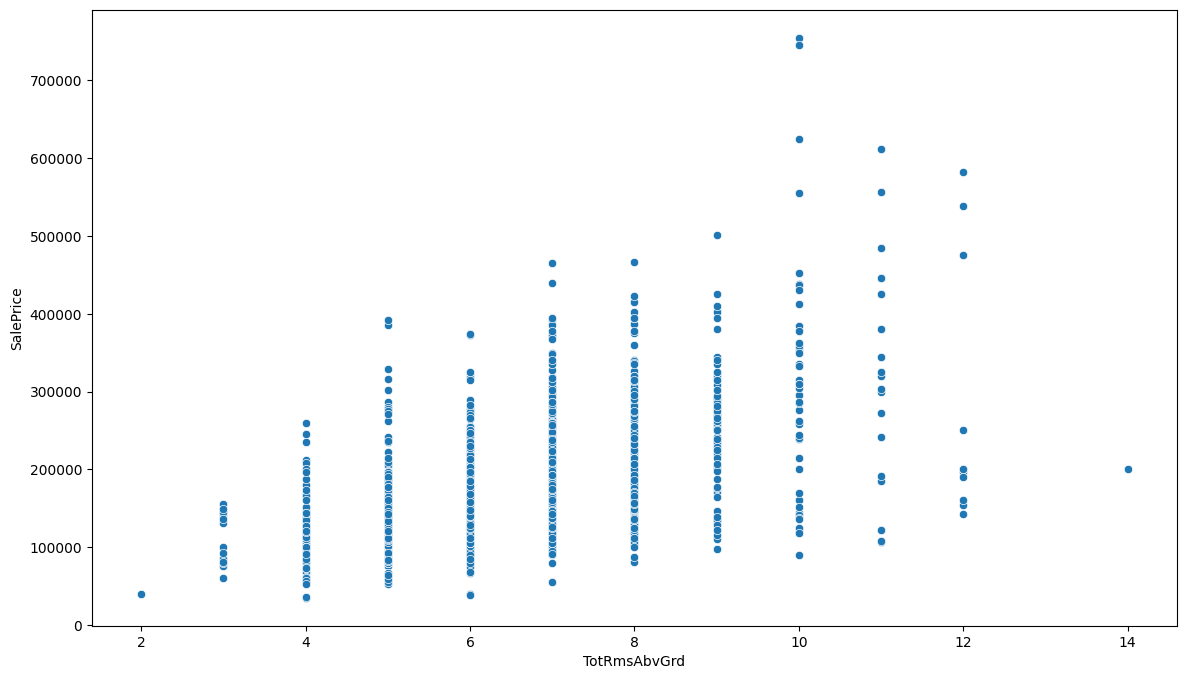

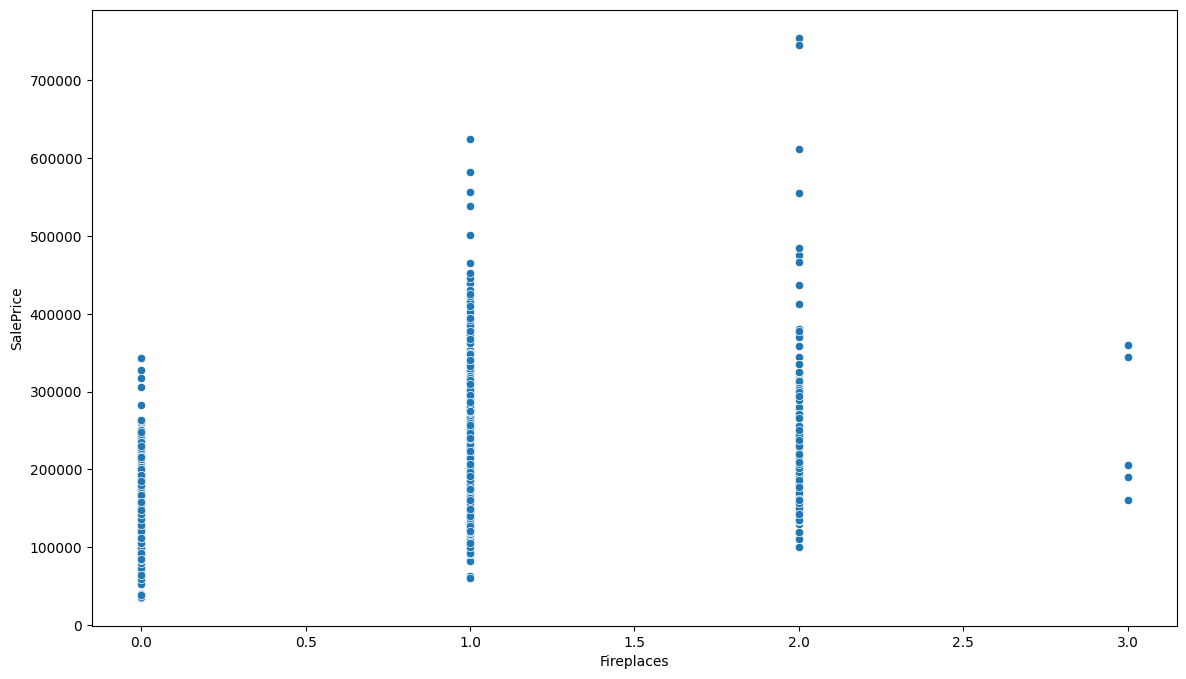

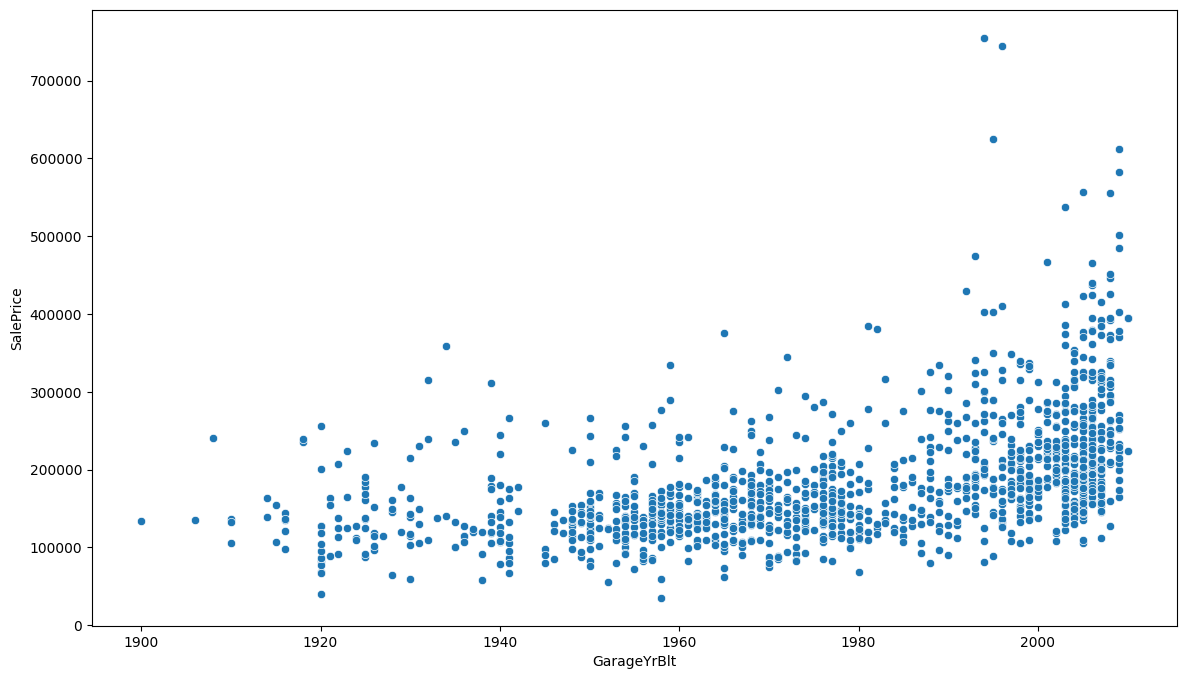

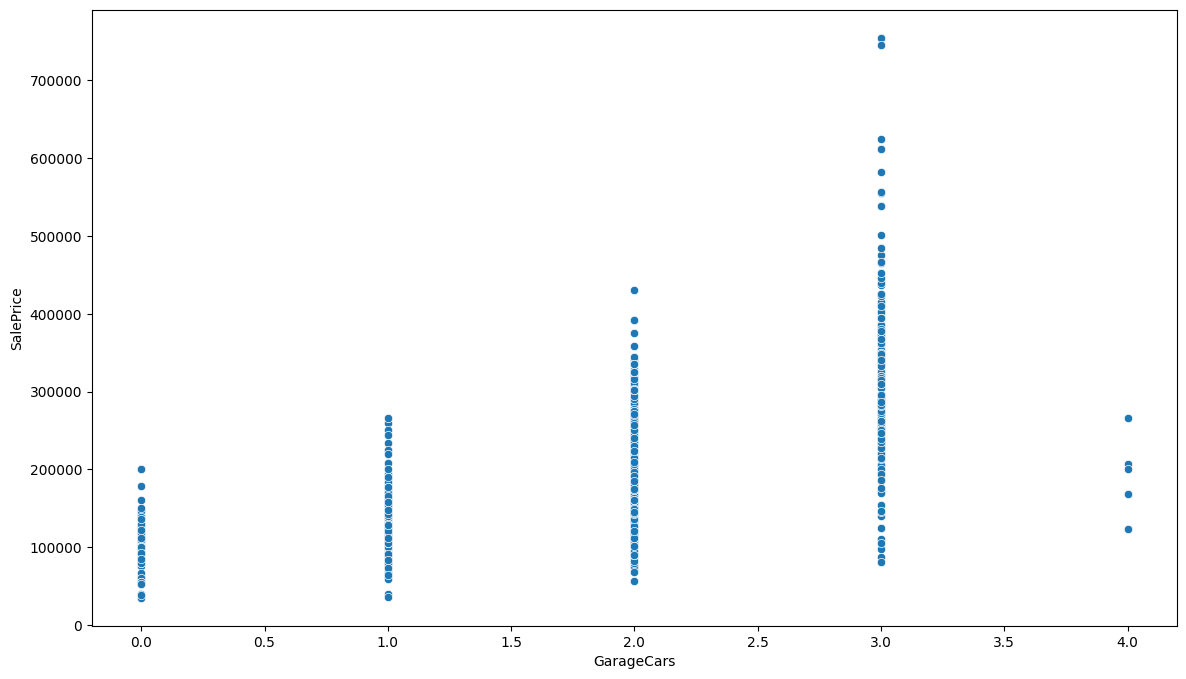

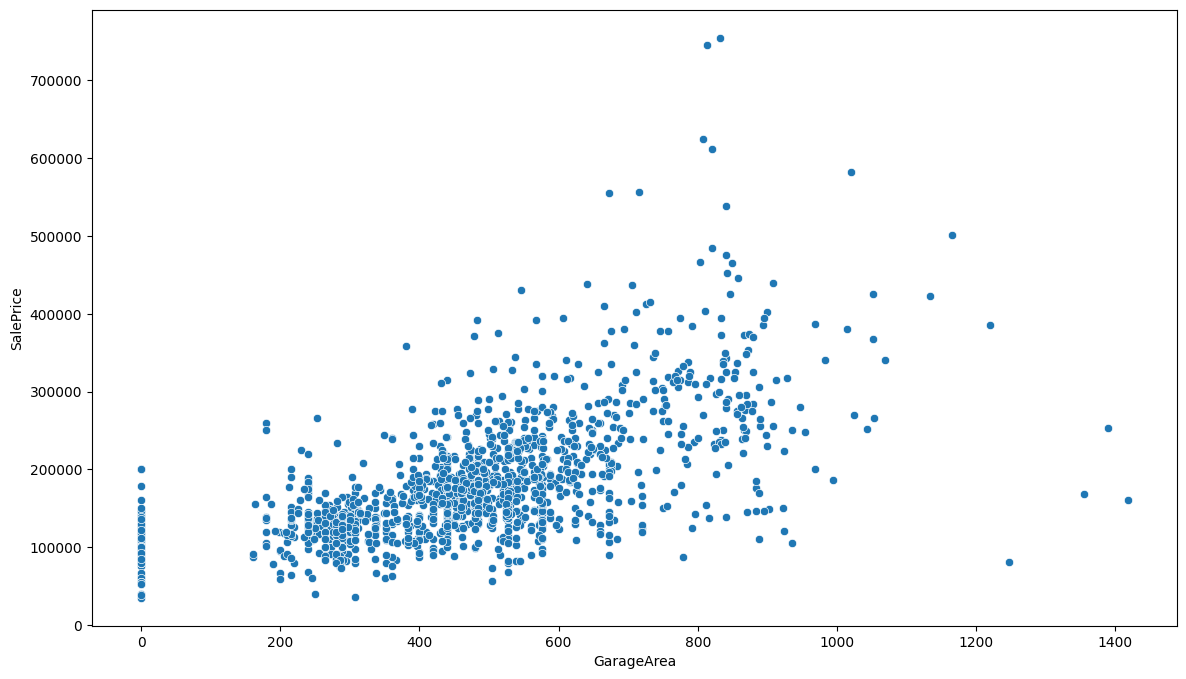

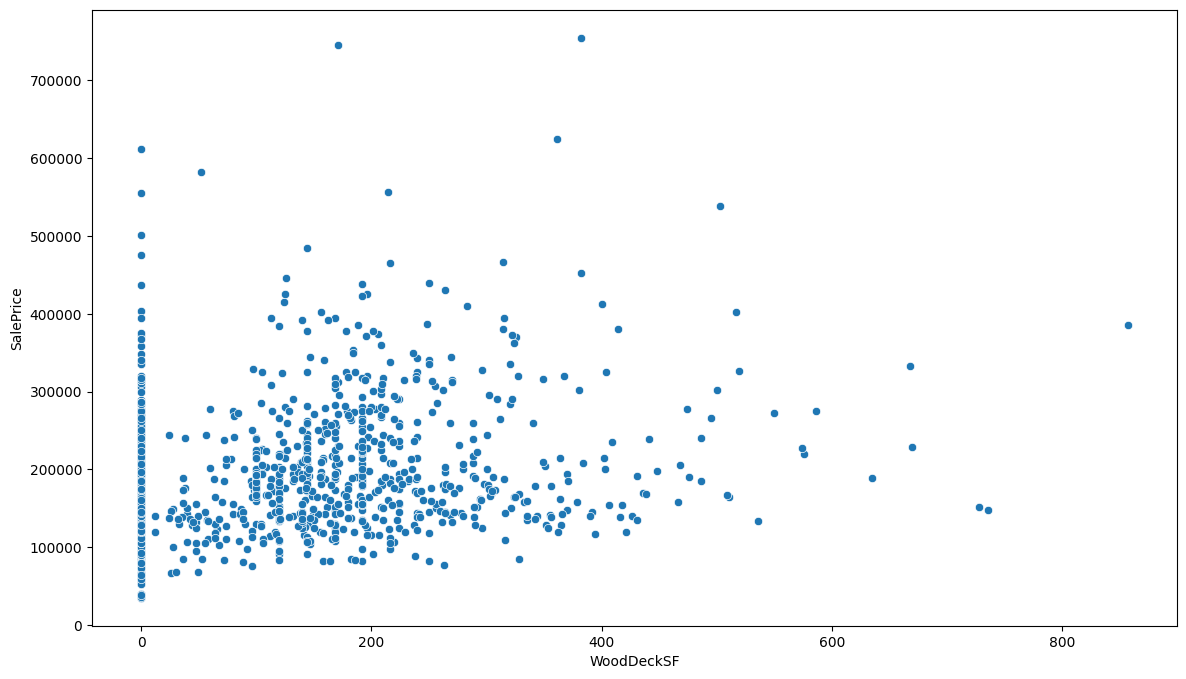

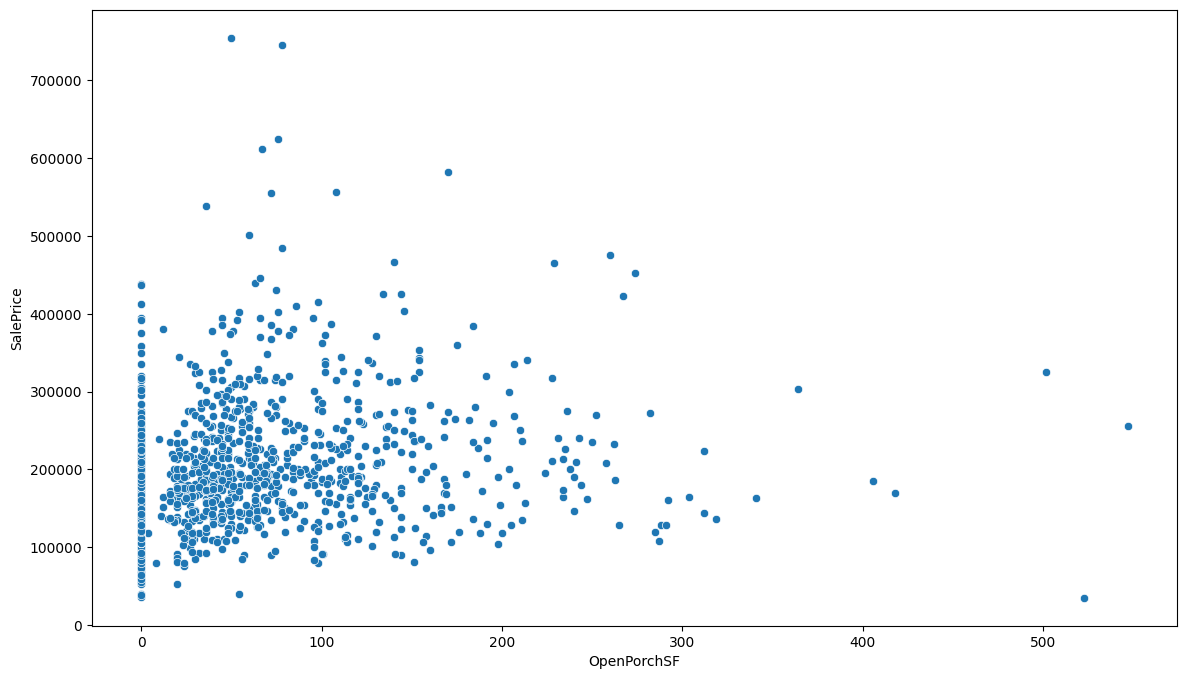

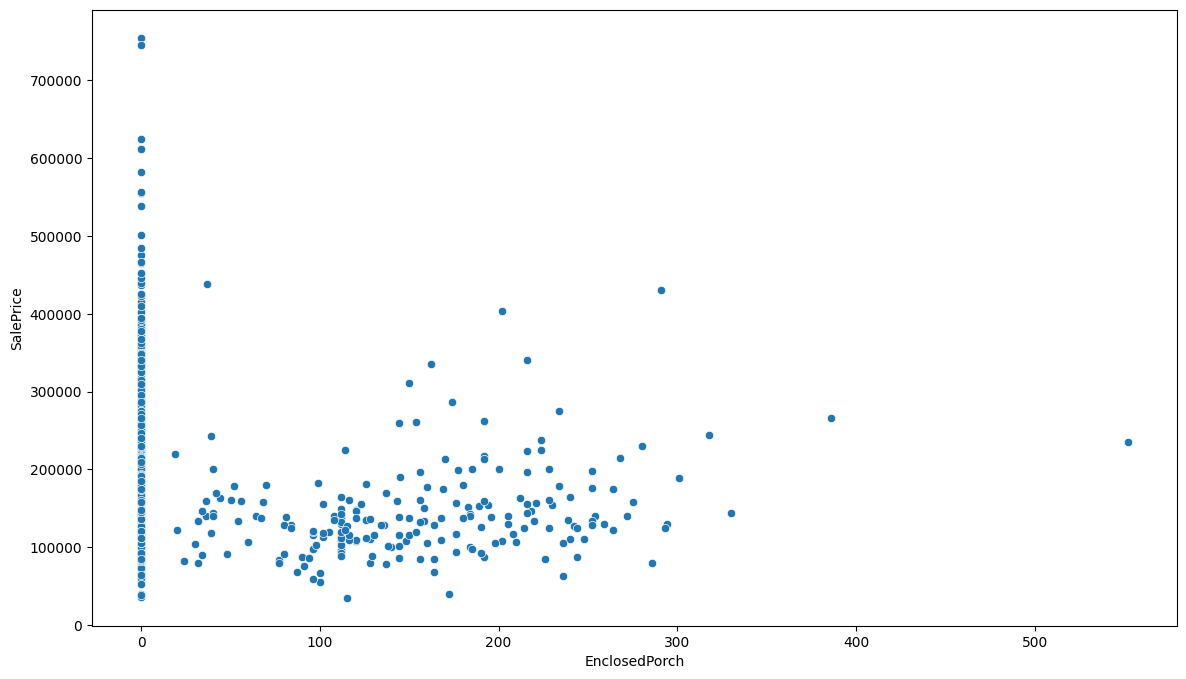

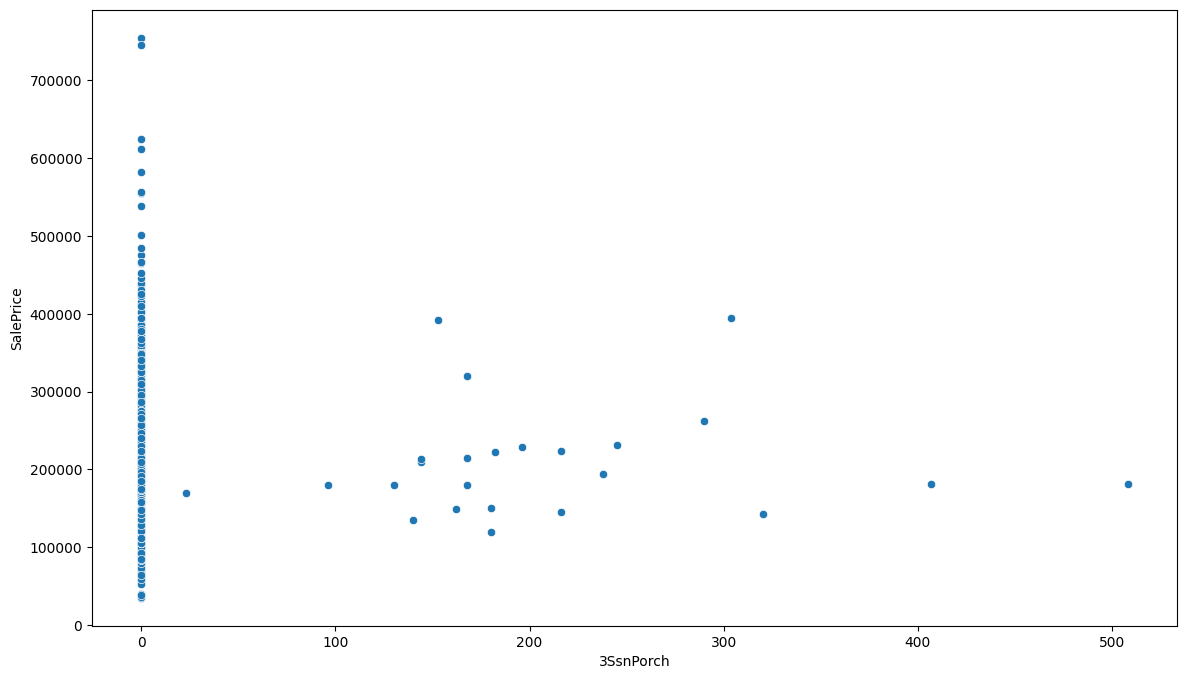

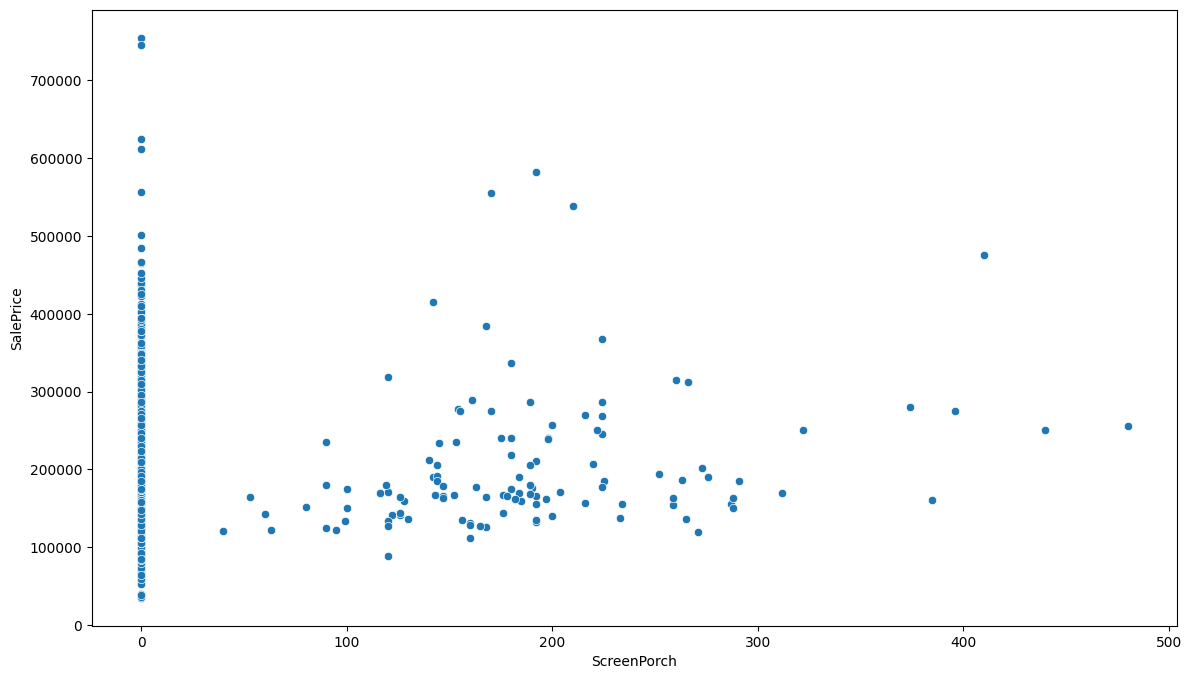

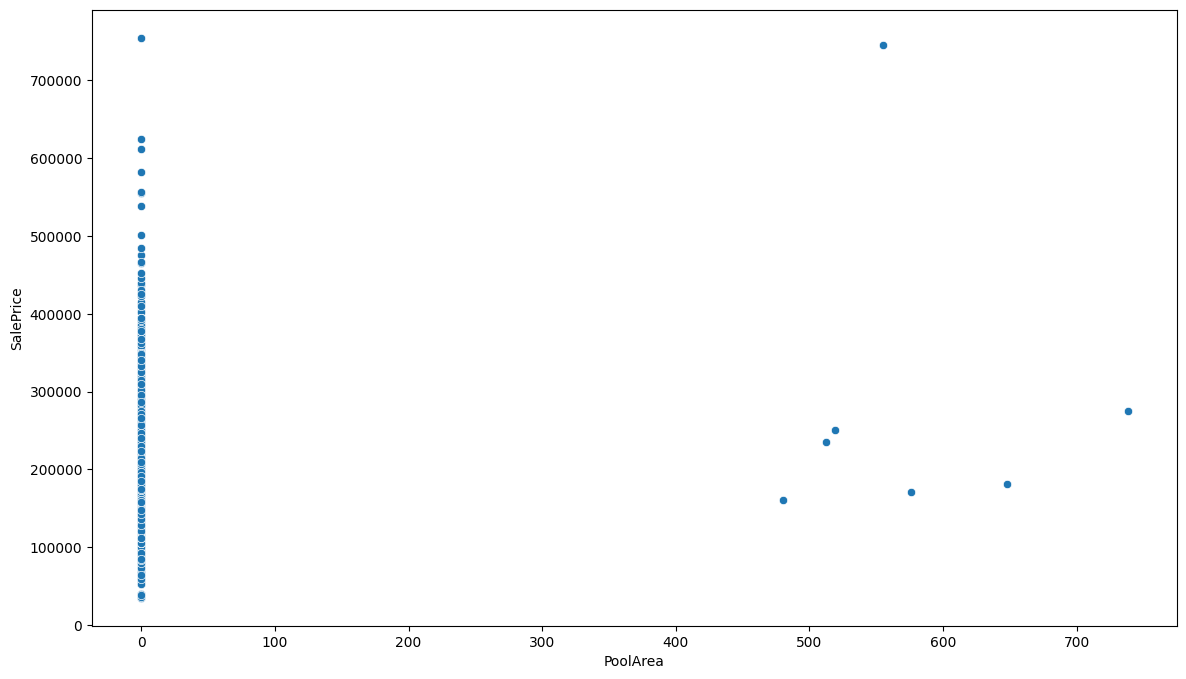

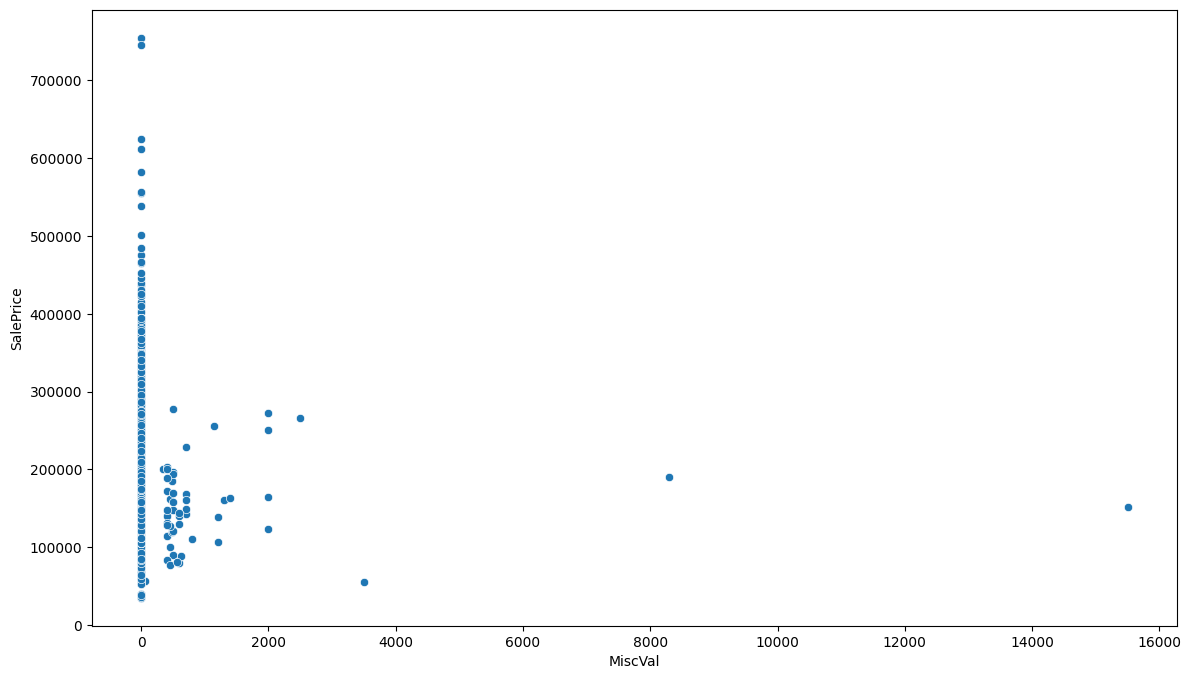

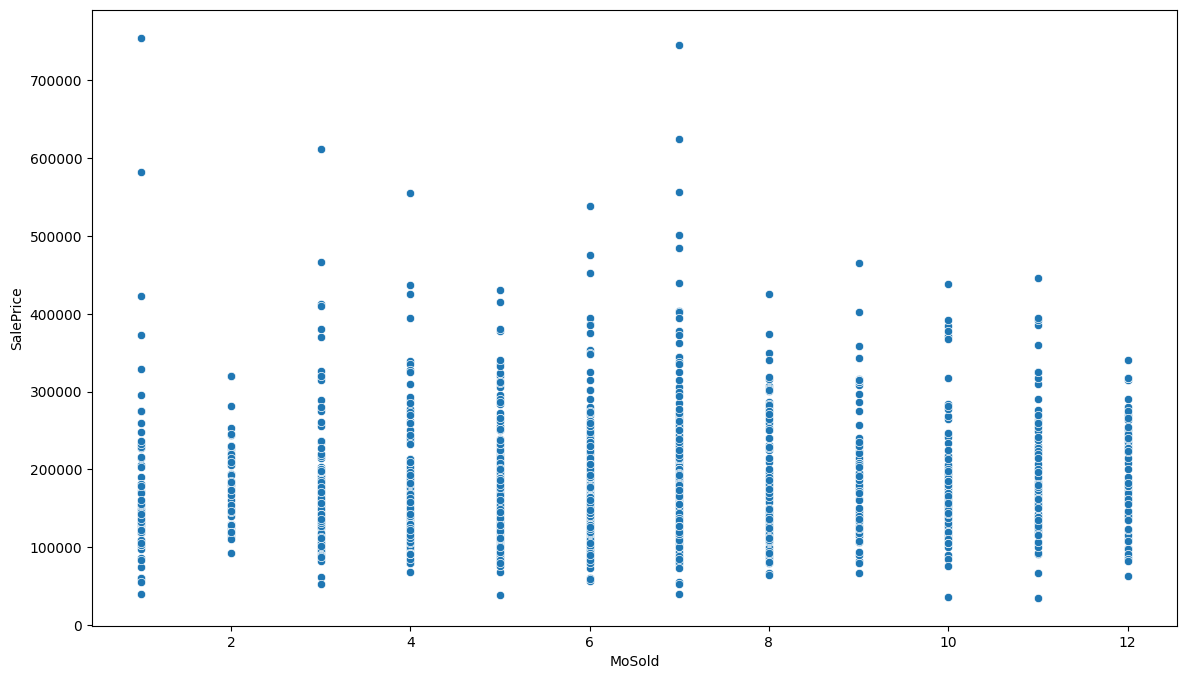

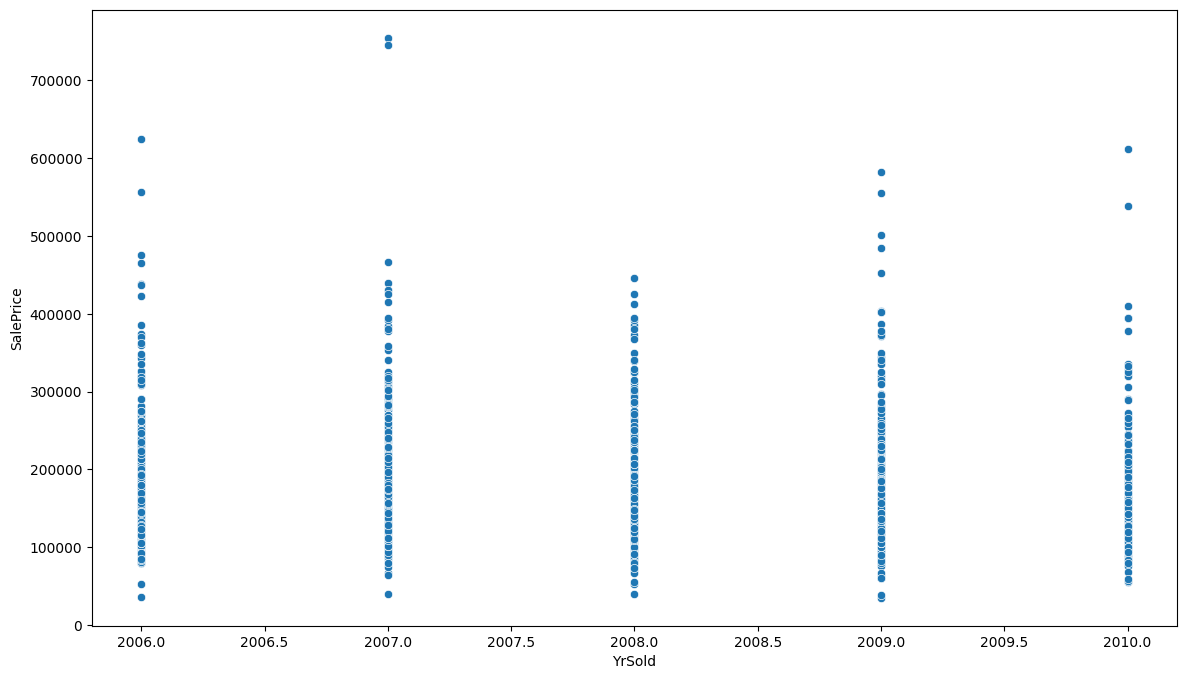

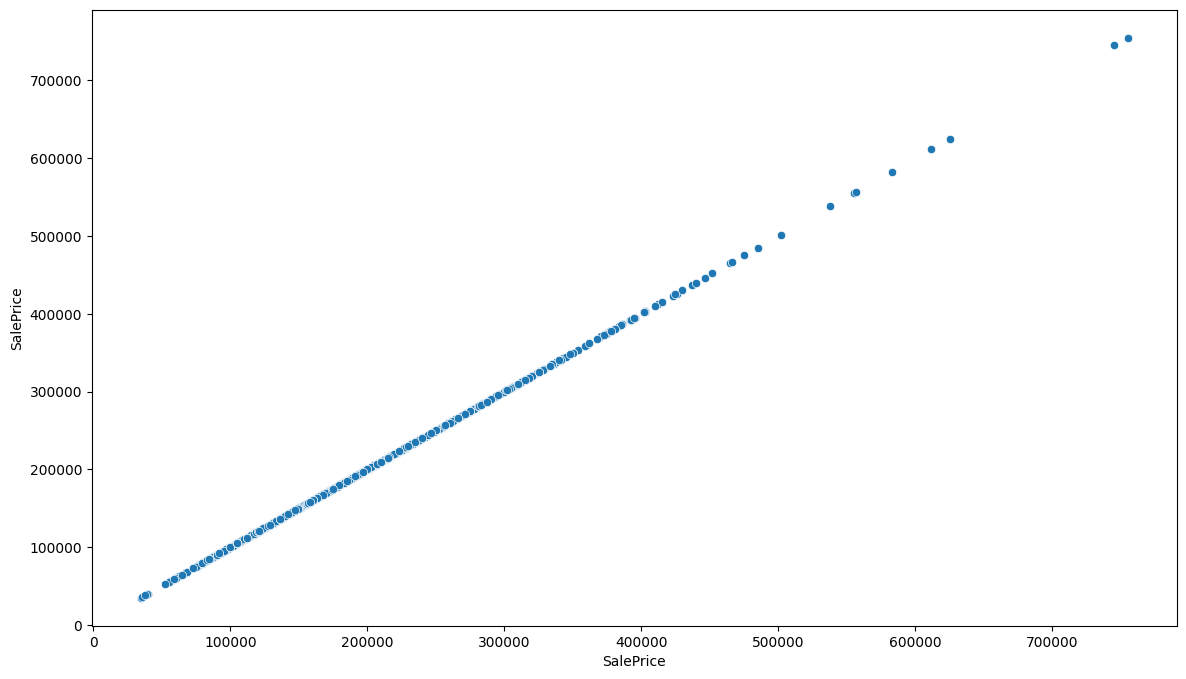

In [11]:
for i in traindf.columns:
    if traindf[i].dtypes in ["int64","float64"]:
        plt.figure(figsize=(14,8))
        sns.scatterplot(data=traindf,x=traindf[i],y=traindf["SalePrice"])
        

In [12]:
traindf['SalePrice'] = pd.qcut(traindf['SalePrice'], 3, labels=["Low", "Mid", "High"])

In [13]:
size_mapping = {
    'Low': 1,    
    'Mid': 2, 
    'High': 3    
}
traindf['SalePrice'] = traindf['SalePrice'].map(size_mapping)


In [14]:
combined = pd.concat([traindf, testdf], sort=False)

In [15]:
combined

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal          3  
1         5   2007        WD         Normal          2  
2         9   2008        WD         Normal          3  
3         2   2006        WD        Abnorml          2  
4        12   2008        WD         Normal          3  
...     ...    ...       ...            ...        ...  
1454      6   2006        WD         Normal        NaN  
1455      4   2006        WD        Abnorml        NaN  
1456      9   2006        WD        Abnorml        NaN  
1457      7   2006        WD         Normal        NaN  
1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [18]:
def numCols(df):
    return df.select_dtypes(include=['int64', 'float64']).columns

In [19]:
numeric_cols_df = numCols(combined)

In [20]:
scaler = StandardScaler()
combined[numeric_cols_df] = scaler.fit_transform(combined[numeric_cols_df])

In [21]:
combined

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley  \
0    -1.731458    0.067331       RL    -0.184481 -0.217879   Pave   NaN   
1    -1.730271   -0.873616       RL     0.458190 -0.072044   Pave   NaN   
2    -1.729084    0.067331       RL    -0.055946  0.137197   Pave   NaN   
3    -1.727897    0.302568       RL    -0.398704 -0.078385   Pave   NaN   
4    -1.726711    0.067331       RL     0.629569  0.518903   Pave   NaN   
...        ...         ...      ...          ...       ...    ...   ...   
1454  1.726711    2.419700       RM    -2.069648 -1.043937   Pave   NaN   
1455  1.727897    2.419700       RM    -2.069648 -1.049263   Pave   NaN   
1456  1.729084   -0.873616       RL     3.885767  1.246808   Pave   NaN   
1457  1.730271    0.655424       RL    -0.313015  0.034605   Pave   NaN   
1458  1.731458    0.067331       RL     0.201122 -0.068620   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
1455      Reg         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   
1457      Reg         Lvl    AllPub  ... -0.06315    NaN  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ... -0.06315    NaN    NaN         NaN   

       MiscVal    MoSold    YrSold  SaleType  SaleCondition  SalePrice  
0    -0.089592 -1.552184  0.157646        WD         Normal          3  
1    -0.089592 -0.446925 -0.602962        WD         Normal          2  
2    -0.089592  1.026753  0.157646        WD         Normal          3  
3    -0.089592 -1.552184 -1.363569        WD        Abnorml          2  
4    -0.089592  2.132012  0.157646        WD         Normal          3  
...        ...       ...       ...       ...            ...        ...  
1454 -0.089592 -0.078505 -1.363569        WD         Normal        NaN  
1455 -0.089592 -0.815344 -1.363569        WD        Abnorml        NaN  
1456 -0.089592  1.026753 -1.363569        WD        Abnorml        NaN  
1457  1.144312  0.289914 -1.363569        WD         Normal        NaN  
1458 -0.089592  1.763592 -1.363569        WD         Normal        NaN  

[2919 rows x 81 columns]

# Variables ordinales (X_train)

In [22]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
finish_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
garage_finish_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
paved_drive_mapping = {'Y': 3, 'P': 2, 'N': 1}
fire_place_mapping = {"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":2,"NA":1}
ordinal_features = {
    'ExterQual': quality_mapping, 'ExterCond': quality_mapping,
    'BsmtQual': quality_mapping, 'BsmtCond': quality_mapping,
    'BsmtFinType1': finish_mapping, 'BsmtFinType2': finish_mapping,
    'HeatingQC': quality_mapping,
    'KitchenQual': quality_mapping,
    'GarageFinish': garage_finish_mapping,
    'GarageQual': quality_mapping, 'GarageCond': quality_mapping,
    'PavedDrive': paved_drive_mapping,
    'FireplaceQu' : fire_place_mapping #nuevo
}

for feature, mapping in ordinal_features.items():
    combined[feature] = combined[feature].map(mapping)
    

In [23]:
combined[['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish']].head()

ExterQual  BsmtQual BsmtExposure  BsmtFinType1  GarageFinish
0          4       4.0           No           6.0           2.0
1          3       4.0           Gd           5.0           2.0
2          4       4.0           Mn           6.0           2.0
3          3       3.0           No           5.0           1.0
4          4       4.0           Av           6.0           2.0

# Variables nominales (X_train)

In [24]:
nominal_vars = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType']
#QUITÉ SALECONDITION 
#QUITÉ ROOFSTYLE (NI )
#QUITÉ NEIGHBORHOOD
combined_encoded = pd.get_dummies(combined, columns=nominal_vars, drop_first=True)

In [25]:
combined_encoded.shape

(2919, 199)

In [26]:
for i in combined_encoded.columns:
    if combined_encoded[i].dtypes == "object":
        print(i)

Alley
RoofStyle
BsmtExposure
PoolQC
Fence
MiscFeature
SaleCondition


#acabo de quitar la calidad de chimenea voy a botar salecondition

In [27]:
combined_encoded.drop(["Alley","PoolQC","Fence","MiscFeature","OverallCond","Id","MiscVal","YrSold","3SsnPorch","LowQualFinSF","SaleCondition","RoofStyle",
                      "BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","BsmtExposure"],axis=1,inplace=True)

In [28]:
combined_encoded.dropna(inplace=True)

In [29]:
y = combined_encoded["SalePrice"]

In [30]:
X = combined_encoded.drop(columns=["SalePrice"])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y

1       2
2       3
3       2
4       3
6       3
       ..
1447    3
1451    3
1455    2
1456    3
1457    3
Name: SalePrice, Length: 584, dtype: category
Categories (3, int64): [1 < 2 < 3]

# Kernel lineal

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [69]:
y_pred = svm_model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [71]:
print('Test accuracy: ', svm_model.score(X_test, y_test))
print('Train accuracy: ', svm_model.score(X_train, y_train))

Test accuracy:  0.8034188034188035
Train accuracy:  0.9507494646680942


In [72]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8034188034188035
Confusion Matrix:
[[16  5  0]
 [ 4 27  7]
 [ 0  7 51]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        21
           2       0.69      0.71      0.70        38
           3       0.88      0.88      0.88        58

    accuracy                           0.80       117
   macro avg       0.79      0.78      0.79       117
weighted avg       0.80      0.80      0.80       117



In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [74]:
param_grid = {
    'C': [1, 2,3, 5],
    'gamma': [0.01, 0.015,0.02],
    'kernel': ['linear', 'rbf']
}

In [75]:
svm_model = SVC(random_state=42)

In [76]:
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 2, 3, 5], 'gamma': [0.01, 0.015, 0.02],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [77]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 3, 'gamma': 0.02, 'kernel': 'rbf'}


In [78]:
best_svm_model = SVC(**best_params, random_state=42)
#** desempaqueta un diccionario

#SVC(C=0.1, gamma=0.1, kernel='linear', random_state=42)
best_svm_model.fit(X_train, y_train)

SVC(C=3, gamma=0.02, random_state=42)

In [79]:
y_pred = best_svm_model.predict(X_test)

In [80]:
print('Test accuracy: ', best_svm_model.score(X_test, y_test))
print('Train accuracy: ', best_svm_model.score(X_train, y_train))

Test accuracy:  0.8547008547008547
Train accuracy:  0.9785867237687366


In [81]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [82]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8547008547008547
Confusion Matrix:
[[15  6  0]
 [ 1 31  6]
 [ 0  4 54]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.71      0.81        21
           2       0.76      0.82      0.78        38
           3       0.90      0.93      0.92        58

    accuracy                           0.85       117
   macro avg       0.86      0.82      0.84       117
weighted avg       0.86      0.85      0.85       117



Text(0.5, 1.0, 'Matriz de confusión de predicción vs. entrenamiento')

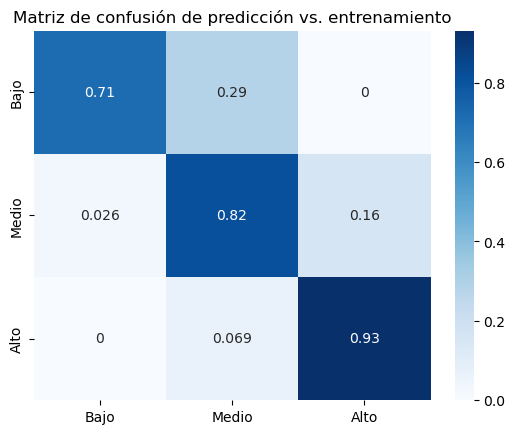

In [83]:
sns.heatmap(confusion_matrix(y_test, np.round(y_pred),normalize="true"), cmap="Blues", annot=True, 
            xticklabels=["Bajo", "Medio","Alto"], yticklabels=["Bajo", "Medio","Alto"])
plt.title("Matriz de confusión de predicción vs. entrenamiento")

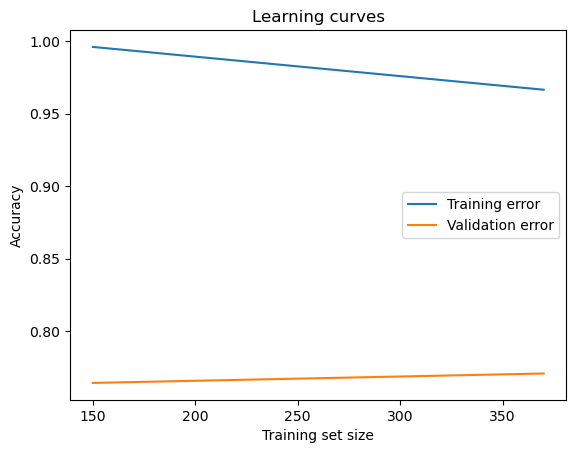

In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = SVC(kernel='linear',random_state=42),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 370],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()


# Kernel RBF

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [87]:
y_pred = svm_model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [89]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7777777777777778
Confusion Matrix:
[[10 11  0]
 [ 0 30  8]
 [ 0  7 51]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.48      0.65        21
           2       0.62      0.79      0.70        38
           3       0.86      0.88      0.87        58

    accuracy                           0.78       117
   macro avg       0.83      0.71      0.74       117
weighted avg       0.81      0.78      0.77       117



In [90]:
print('Test accuracy: ', svm_model.score(X_test, y_test))
print('Train accuracy: ', svm_model.score(X_train, y_train))

Test accuracy:  0.7777777777777778
Train accuracy:  0.8565310492505354


In [91]:
param_grid ={
      'C': [10,11,12], 
    'gamma': [0.005, 0.006, 0.0065]  
}

In [92]:
svc = SVC(kernel='rbf')


In [93]:
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 11, 12], 'gamma': [0.005, 0.006, 0.0065]},
             scoring='accuracy', verbose=1)

In [94]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 12, 'gamma': 0.0065}


In [95]:
best_svm_model = SVC(**best_params)

In [96]:
best_svm_model.fit(X_train, y_train)

SVC(C=12, gamma=0.0065)

In [97]:
print('Test accuracy: ', best_svm_model.score(X_test, y_test))
print('Train accuracy: ', best_svm_model.score(X_train, y_train))

Test accuracy:  0.8803418803418803
Train accuracy:  0.9721627408993576


In [98]:
y_pred = best_svm_model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [100]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8803418803418803
Confusion Matrix:
[[17  4  0]
 [ 1 32  5]
 [ 0  4 54]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.80      0.84      0.82        38
           3       0.92      0.93      0.92        58

    accuracy                           0.88       117
   macro avg       0.89      0.86      0.87       117
weighted avg       0.88      0.88      0.88       117



Text(0.5, 1.0, 'Matriz de confusión de predicción vs. entrenamiento')

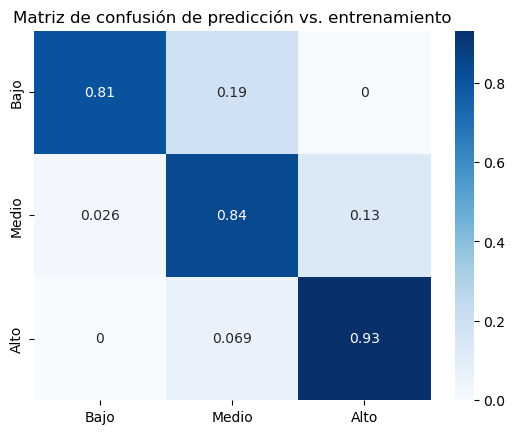

In [101]:
sns.heatmap(confusion_matrix(y_test, np.round(y_pred),normalize="true"), cmap="Blues", annot=True, 
            xticklabels=["Bajo", "Medio","Alto"], yticklabels=["Bajo", "Medio","Alto"])
plt.title("Matriz de confusión de predicción vs. entrenamiento")

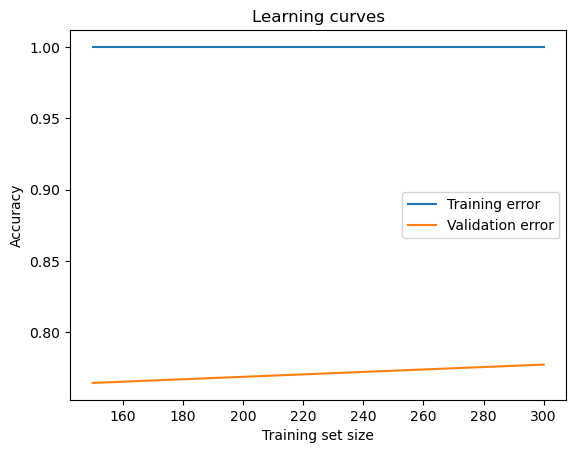

In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = SVC(kernel='rbf', C=5, gamma=0.05),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 300],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()


# Kernel Sigmoide

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
svm_sigmoid = SVC(kernel='sigmoid', gamma=0.01, C=1.0, coef0=0)
svm_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svm_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.31      0.21      0.25        38
           3       0.62      0.97      0.75        58

    accuracy                           0.55       117
   macro avg       0.31      0.39      0.33       117
weighted avg       0.40      0.55      0.45       117



C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
print('Test accuracy: ', svm_sigmoid.score(X_test, y_test))
print('Train accuracy: ', svm_sigmoid.score(X_train, y_train))

Test accuracy:  0.5470085470085471
Train accuracy:  0.5995717344753747


In [107]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [108]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8803418803418803
Confusion Matrix:
[[17  4  0]
 [ 1 32  5]
 [ 0  4 54]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.80      0.84      0.82        38
           3       0.92      0.93      0.92        58

    accuracy                           0.88       117
   macro avg       0.89      0.86      0.87       117
weighted avg       0.88      0.88      0.88       117



In [109]:
param_grid = {
    'C': [90,95,100],  
    'gamma': [0.0005, 0.00055, 0.0006], 
    'coef0': [-0.015, -0.02,-0.025]  
}


In [110]:
svc = SVC(kernel='sigmoid')
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [90, 95, 100], 'coef0': [-0.015, -0.02, -0.025],
                         'gamma': [0.0005, 0.00055, 0.0006]},
             scoring='accuracy', verbose=1)

In [111]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 90, 'coef0': -0.015, 'gamma': 0.0005}


In [112]:
best_svm_model = SVC(**best_params)

In [113]:
best_svm_model.fit(X_train, y_train)

SVC(C=90, coef0=-0.015, gamma=0.0005)

In [114]:
y_pred = best_svm_model.predict(X_test)

In [115]:
print('Test accuracy: ', best_svm_model.score(X_test, y_test))
print('Train accuracy: ', best_svm_model.score(X_train, y_train))

Test accuracy:  0.8461538461538461
Train accuracy:  0.9122055674518201


In [116]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [117]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8461538461538461
Confusion Matrix:
[[15  6  0]
 [ 1 31  6]
 [ 0  5 53]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.71      0.81        21
           2       0.74      0.82      0.78        38
           3       0.90      0.91      0.91        58

    accuracy                           0.85       117
   macro avg       0.86      0.81      0.83       117
weighted avg       0.85      0.85      0.85       117



Text(0.5, 1.0, 'Matriz de confusión de predicción vs. entrenamiento')

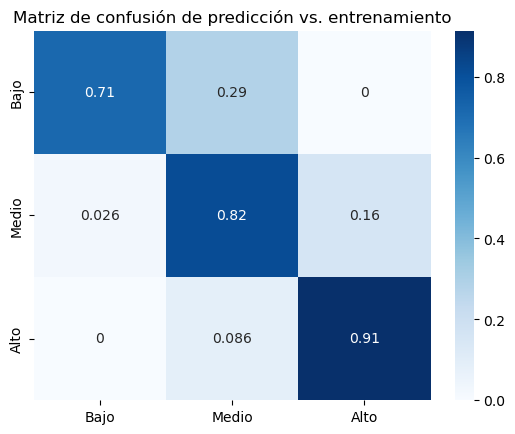

In [118]:
sns.heatmap(confusion_matrix(y_test, np.round(y_pred),normalize="true"), cmap="Blues", annot=True, 
            xticklabels=["Bajo", "Medio","Alto"], yticklabels=["Bajo", "Medio","Alto"])
plt.title("Matriz de confusión de predicción vs. entrenamiento")

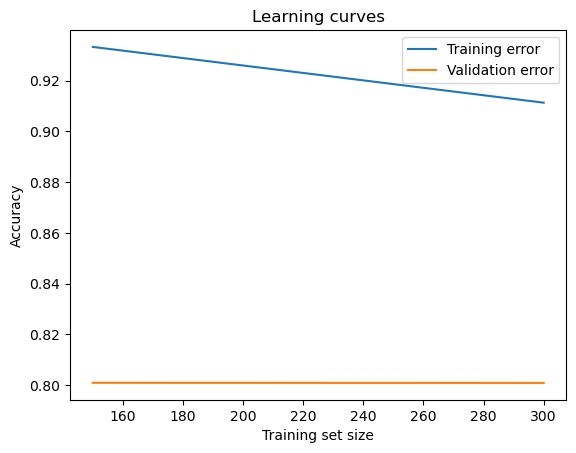

In [119]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = SVC(kernel='sigmoid', C= 90, coef0=-0.015, gamma= 0.0006),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 300],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()


# Regresión logística

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [121]:
predicted_proba = model.predict_proba(X_test)

positive_proba = predicted_proba[:, 1]
positive_proba

array([6.34953167e-01, 7.63061001e-01, 5.02493491e-01, 6.97625083e-01,
       6.46824332e-01, 5.97353130e-01, 1.90039116e-01, 1.10234683e-01,
       3.25293982e-02, 9.27236250e-01, 8.97049957e-01, 5.35687277e-01,
       2.70414143e-01, 3.42255960e-01, 2.12541680e-02, 8.60347493e-01,
       5.10465435e-01, 4.07092837e-01, 7.81552827e-01, 5.87150342e-01,
       1.34649916e-02, 4.89397010e-01, 2.69276275e-01, 1.48014990e-01,
       1.53316611e-01, 8.50432970e-01, 8.45909352e-02, 3.74358041e-02,
       1.46894177e-01, 6.48080969e-02, 1.93714224e-01, 1.31640329e-01,
       1.26933061e-02, 3.99990694e-01, 1.21926425e-03, 5.29357103e-01,
       1.02947839e-01, 1.48119854e-02, 9.78551881e-02, 1.83575181e-01,
       1.63291378e-02, 6.47758958e-03, 9.19310293e-02, 3.51563228e-01,
       5.31971876e-01, 5.75890775e-01, 5.22425579e-01, 6.97797144e-02,
       7.49578520e-02, 5.36854271e-01, 5.70707040e-01, 2.04128580e-01,
       3.08467366e-02, 7.90269756e-04, 5.81554470e-03, 1.28379096e-01,
      

In [122]:
print('Weight Coefficient : ', model.coef_)
print('Bias : ', model.intercept_)

Weight Coefficient :  [[-1.85712271e-02 -2.00487870e-01 -1.66740970e-01 -3.34752048e-01
  -5.35649796e-02 -1.98587256e-01 -1.39219086e-01 -1.54788916e-01
   8.38838179e-02 -7.90226014e-02 -1.87605793e-01 -1.12093707e-01
  -1.14506873e-01 -2.10585414e-01 -2.29960884e-01 -3.08909356e-01
  -1.71712198e-01 -3.57556178e-01 -3.77345279e-02  5.06927239e-02
  -2.37066113e-01 -2.68929109e-01  1.06001895e-01  1.96058376e-01
  -3.07877320e-01 -2.44212168e-01 -1.47603581e-01 -8.18018563e-02
  -4.17316572e-02 -1.20651016e-01 -3.74843631e-01 -7.76284931e-02
  -6.13543835e-02  1.78847432e-02  7.07350159e-02 -7.96628355e-04
  -2.16601521e-01 -7.06528405e-02 -7.68930951e-02 -5.15122432e-02
   1.18727823e-02 -1.46599804e-02  0.00000000e+00 -1.84127469e-01
   1.38809785e-01  7.98715496e-04 -3.72724770e-03 -1.37376211e-03
   2.48667519e-01  6.55741382e-02 -2.63829934e-02 -4.18119393e-02
   0.00000000e+00 -7.43817360e-03 -6.33385491e-02 -1.69324650e-07
   2.15801785e-02 -6.17446983e-02  8.94570212e-02  4.0

In [123]:
print('Test accuracy: ', model.score(X_test, y_test))
print('Train accuracy: ', model.score(X_train, y_train))

Test accuracy:  0.7692307692307693
Train accuracy:  0.8822269807280514


In [124]:
X = combined_encoded.copy()
X_train, X_test= train_test_split(X, test_size=0.3, random_state=0)
X.drop(columns="SalePrice", inplace=True)
y_train = X_train.SalePrice
y_test = X_test.SalePrice
X_train.drop(columns=["SalePrice"], inplace=True)
X_test.drop(columns="SalePrice", inplace=True)

In [125]:
lr = LogisticRegression(max_iter=5000, random_state=0)
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)

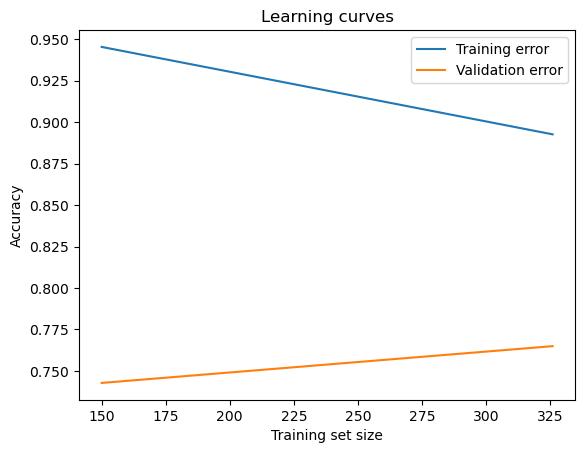

In [128]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LogisticRegression(C = 0.1, max_iter = 500),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 326],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()


In [131]:
from sklearn.model_selection import train_test_split

X = combined_encoded.copy()
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)
X.drop(columns="SalePrice", inplace=True)
y_train = X_train.SalePrice
y_test = X_test.SalePrice
X_train.drop(columns=["SalePrice"], inplace=True)
X_test.drop(columns=["SalePrice"], inplace=True)

lr = LogisticRegression(max_iter=5000, random_state=0)
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)

# Print accuracy
print('Test accuracy: ', lr.score(X_test, y_test))
print('Train accuracy: ', lr.score(X_train, y_train))


Test accuracy:  0.7670454545454546
Train accuracy:  0.9338235294117647


Text(0.5, 1.0, 'Matriz de confusión de datos de entrenamiento')

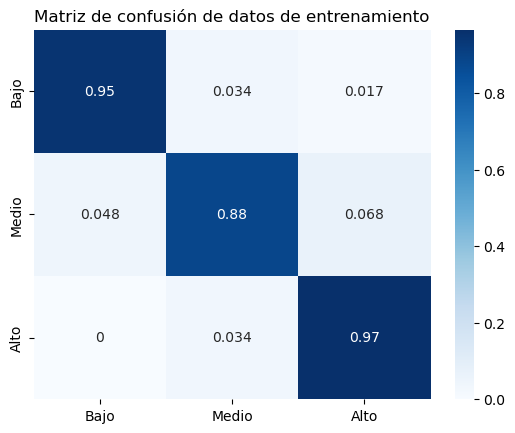

In [132]:
sns.heatmap(confusion_matrix(y_train, np.round(y_pred_train), normalize="true"), cmap="Blues", annot=True, 
            xticklabels=["Bajo", "Medio","Alto"], yticklabels=["Bajo", "Medio","Alto"])
plt.title("Matriz de confusión de datos de entrenamiento")

## SVM Polinomial

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Modelo SVM con kernel polinomial
svm_poly_model = SVC(kernel='poly', degree=3, C=1, gamma='auto', random_state=42)
svm_poly_model.fit(X_train, y_train)
y_pred_poly = svm_poly_model.predict(X_test)


In [49]:
print('Test accuracy: ', svm_poly_model.score(X_test, y_test))
print('Train accuracy: ', svm_poly_model.score(X_train, y_train))

Test accuracy:  0.811965811965812
Train accuracy:  0.880085653104925


In [36]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
class_report_poly = classification_report(y_test, y_pred_poly)


In [37]:
print("Accuracy Polinomial:", accuracy_poly)
print("Confusion Matrix Polinomial:")
print(conf_matrix_poly)
print("Classification Report Polinomial:")
print(class_report_poly)


Accuracy Polinomial: 0.811965811965812
Confusion Matrix Polinomial:
[[12  9  0]
 [ 0 31  7]
 [ 0  6 52]]
Classification Report Polinomial:
              precision    recall  f1-score   support

           1       1.00      0.57      0.73        21
           2       0.67      0.82      0.74        38
           3       0.88      0.90      0.89        58

    accuracy                           0.81       117
   macro avg       0.85      0.76      0.78       117
weighted avg       0.84      0.81      0.81       117



In [38]:
param_grid_poly = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


In [39]:
grid_search_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5, scoring='accuracy', verbose=1)
grid_search_poly.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=1)

In [52]:
best_params_poly = grid_search_poly.best_params_
print("Mejores hiperparámetros para polinomial:", best_params_poly)


Mejores hiperparámetros para polinomial: {'C': 10, 'degree': 3, 'gamma': 'auto'}


In [41]:
best_svm_poly = SVC(**best_params_poly)
best_svm_poly.fit(X_train, y_train)
y_pred_best_poly = best_svm_poly.predict(X_test)


In [42]:
accuracy_best_poly = accuracy_score(y_test, y_pred_best_poly)
conf_matrix_best_poly = confusion_matrix(y_test, y_pred_best_poly)
class_report_best_poly = classification_report(y_test, y_pred_best_poly)


In [43]:
print("Mejor Precisión Polinomial:", accuracy_best_poly)
print("Mejor Matriz de Confusión Polinomial:")
print(conf_matrix_best_poly)
print("Mejor Informe de Clasificación Polinomial:")
print(class_report_best_poly)


Mejor Precisión Polinomial: 0.8632478632478633
Mejor Matriz de Confusión Polinomial:
[[16  5  0]
 [ 1 31  6]
 [ 0  4 54]]
Mejor Informe de Clasificación Polinomial:
              precision    recall  f1-score   support

           1       0.94      0.76      0.84        21
           2       0.78      0.82      0.79        38
           3       0.90      0.93      0.92        58

    accuracy                           0.86       117
   macro avg       0.87      0.84      0.85       117
weighted avg       0.87      0.86      0.86       117



Text(0.5, 1.0, 'Matriz de Confusión Mejor Modelo Polinomial')

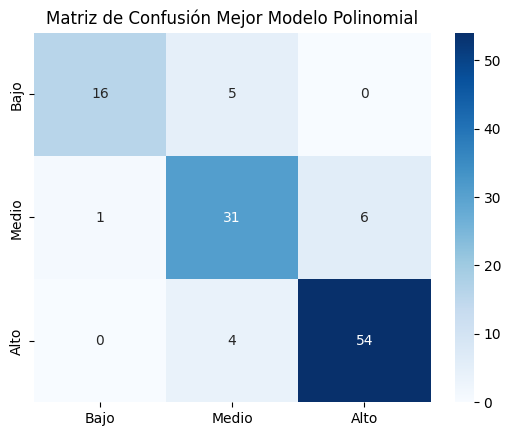

In [54]:
# Matriz de confusión visual
sns.heatmap(conf_matrix_best_poly, cmap="Blues", annot=True, fmt="d", 
            xticklabels=["Bajo", "Medio","Alto"], yticklabels=["Bajo", "Medio","Alto"])
plt.title("Matriz de Confusión Mejor Modelo Polinomial")

In [46]:
train_sizes_poly, train_scores_poly, val_scores_poly = learning_curve(
    estimator = best_svm_poly,
    X = X_train,
    y = y_train,
    train_sizes = [1, 100, 200, 300],
    cv = 5,
    scoring = 'accuracy'
)


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jenni\AppData\

In [47]:
train_scores_mean_poly = np.mean(train_scores_poly, axis=1)
val_scores_mean_poly = np.mean(val_scores_poly, axis=1)

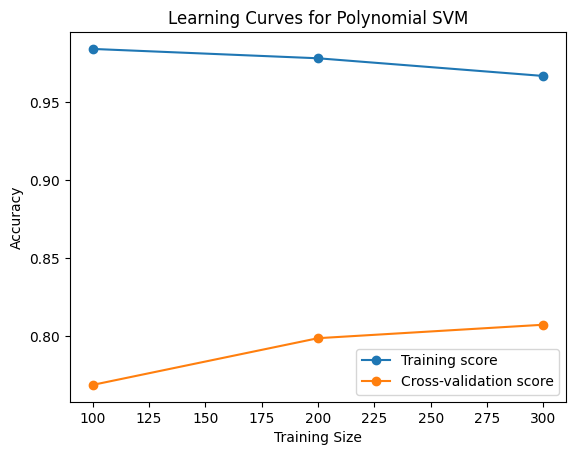

In [48]:
plt.figure()
plt.plot(train_sizes_poly, train_scores_mean_poly, 'o-', label="Training score")
plt.plot(train_sizes_poly, val_scores_mean_poly, 'o-', label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves for Polynomial SVM")
plt.legend(loc="best")